In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Wczytanie 
df = pd.read_csv("kidney_disease.csv")
df.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [3]:
df.drop(columns=['id'], inplace=True) #Usuwam kolumne id ponieważ nie wnosi ona żadnych istotnych informacji
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [4]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
#Szybki podgląd na typy kolumn, jak widać niektóre z nich są zapisane w postaci object
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
#Wypisanie unikalnych wartości dla kolumn zapisanych w typie object 
def showUnique(x):
    for c in x.columns:
        if x[c].dtype == "object":
            print("Kolumna " + str(c) + ":\t" + str(df[c].unique()))
showUnique(df)

Kolumna rbc:	[nan 'normal' 'abnormal']
Kolumna pc:	['normal' 'abnormal' nan]
Kolumna pcc:	['notpresent' 'present' nan]
Kolumna ba:	['notpresent' 'present' nan]
Kolumna pcv:	['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Kolumna wc:	['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900'

In [7]:
#Jak można zauważyć większość kolumn to kolumny binarne dlatego wystarczy je zamienić tak aby posiadały tylko wartości 0 lub 1
#Natomiast kolumny pcv, wc i rc muszą zostąc zamienione na typ float
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce') #coerce zamienai wartosci takie jak np\t? na nan aby uniknąć problemów
df['pcv'].dtype

dtype('float64')

In [8]:
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df['rc'].dtype

dtype('float64')

In [9]:
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['wc'].dtype

dtype('float64')

In [10]:
#Kolumny do zamiany na typ float zniknęły, natomiast pozostaly jeszcze kolumny które trzeba przekonwertować do postaci binarnej
showUnique(df)

Kolumna rbc:	[nan 'normal' 'abnormal']
Kolumna pc:	['normal' 'abnormal' nan]
Kolumna pcc:	['notpresent' 'present' nan]
Kolumna ba:	['notpresent' 'present' nan]
Kolumna htn:	['yes' 'no' nan]
Kolumna dm:	['yes' 'no' ' yes' '\tno' '\tyes' nan]
Kolumna cad:	['no' 'yes' '\tno' nan]
Kolumna appet:	['good' 'poor' nan]
Kolumna pe:	['no' 'yes' nan]
Kolumna ane:	['no' 'yes' nan]
Kolumna classification:	['ckd' 'ckd\t' 'notckd']


In [11]:
df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
df.replace({'notpresent': 0, 'present': 1}, inplace=True)
df.replace({'no': 0, 'yes': 1,'\tno': 0, '\tyes': 1, ' yes':1}, inplace=True)
df.replace({'poor': 0, 'good': 1}, inplace=True)
df.replace({'notckd': 0, 'ckd': 1, 'ckd\t': 1}, inplace=True)

C:\Users\Daru\AppData\Local\Temp\ipykernel_14752\3625266964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_14752\3625266964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'notpresent': 0, 'present': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_14752\3625266964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [12]:
showUnique(df) #Funkcja nic nie zwraca to znaczy, że nie ma juz zadnych kolumn z wartościami o typie object

In [13]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [14]:
df.sample(10) #Wszystko wygląda raczej ok, natomiast nadal są wartości null

age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv  \
142  72.0   90.0    NaN  NaN  NaN  NaN  NaN  0.0  0.0   84.0  ...   NaN   
163  46.0   80.0  1.010  0.0  0.0  NaN  0.0  0.0  0.0  160.0  ...  27.0   
76   48.0   80.0  1.005  4.0  0.0  1.0  1.0  0.0  1.0  133.0  ...  36.0   
244  64.0   90.0  1.015  3.0  2.0  NaN  1.0  1.0  0.0  463.0  ...  40.0   
332  34.0   70.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0    NaN  ...  44.0   
221  66.0   70.0  1.020  1.0  0.0  0.0  NaN  0.0  0.0  248.0  ...   NaN   
245  48.0  100.0    NaN  NaN  NaN  NaN  NaN  0.0  0.0  103.0  ...  19.0   
350  65.0   70.0  1.025  0.0  0.0  NaN  NaN  0.0  0.0   85.0  ...  43.0   
284  33.0   80.0  1.025  0.0  0.0  0.0  0.0  0.0  0.0  100.0  ...  52.0   
115  47.0   80.0  1.010  0.0  0.0  NaN  1.0  0.0  0.0    NaN  ...  44.0   

          wc   rc  htn   dm  cad  appet   pe  ane  classification  
142      NaN  NaN  0.0  1.0  0.0    1.0  0.0  0.0               1  
163   8100.0  3.2  1.0  0.0  0.0    0.0  0.0  1.0               1  
76    6200.0  4.0  0.0  1.0  0.0    1.0  1.0  0.0               1  
244   9800.0  4.6  1.0  1.0  0.0    1.0  0.0  1.0               1  
332  10500.0  6.1  0.0  0.0  0.0    1.0  0.0  0.0               0  
221      NaN  NaN  1.0  1.0  0.0    1.0  0.0  0.0               1  
245   7200.0  2.6  1.0  0.0  1.0    0.0  0.0  0.0               1  
350   9600.0  4.5  0.0  0.0  0.0    1.0  0.0  0.0               0  
284   6700.0  6.0  0.0  0.0  0.0    1.0  0.0  0.0               0  
115   5600.0  4.3  0.0  0.0  0.0    1.0  0.0  1.0               1  

[10 rows x 25 columns]

In [15]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
#Funkcja zamienia NaN na srednia w danej kolumnie tylko gdy nie jest to kolumna zawierająca wartości binarne
def changeNanToAvg(df):
    for column in df.columns:
        if df[column].dtype != 'object':  
            if not all(value in (0, 1) for value in df[column].dropna()):  # Sprawdzanie, czy wartości nie są tylko 0 lub 1
                mean_value = df[column].mean()  # Średnia dla kolumny
                df[column] = df[column].fillna(mean_value)
changeNanToAvg(df)

In [17]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
pcc                 4
ba                  4
cad                 2
dm                  2
htn                 2
ane                 1
pe                  1
appet               1
age                 0
pcv                 0
rc                  0
wc                  0
sod                 0
hemo                0
pot                 0
bp                  0
sc                  0
bu                  0
bgr                 0
su                  0
al                  0
sg                  0
classification      0
dtype: int64

In [18]:
df['rbc'].value_counts()

rbc
0.0    201
1.0     47
Name: count, dtype: int64

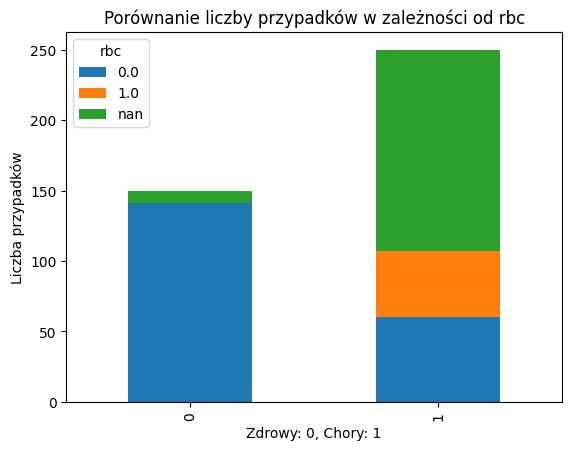

In [19]:
#mozna sie tutaj pokusic o propozycje jakiego uzupelnienia tych wartosci null
ct = pd.crosstab(df['classification'], df['rbc'], dropna=False) 
ct.plot(kind='bar', stacked=True)
plt.title('Porównanie liczby przypadków w zależności od rbc')
plt.xlabel('Zdrowy: 0, Chory: 1')
plt.ylabel('Liczba przypadków')
plt.show()

In [20]:
#Ale nei wiem dlatego robie dropa tej kolumny 
df.drop(columns=['rbc'], inplace=True)

In [21]:
#Poniewaz reszta kolumn ma małą ilość wartości Null usuwam wiersze gdzie znajdja sie te wartosci (z 400 wierszy usunięte zostaje około 70)
df = df.dropna()
df['classification'].value_counts()

classification
1    194
0    135
Name: count, dtype: int64

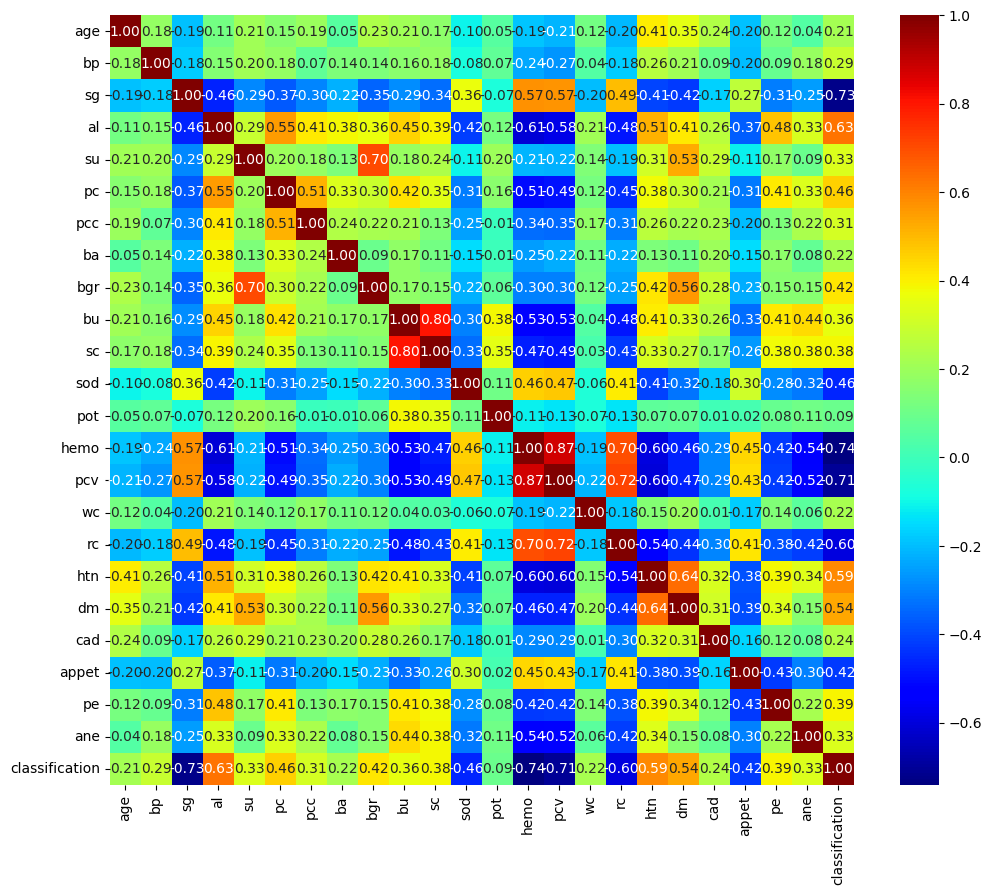

In [22]:
#Korelacje
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="jet",fmt='.2f')
plt.show()

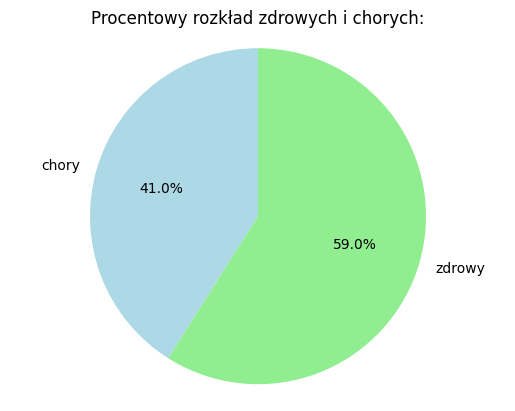

In [23]:
ill = (df['classification'] == 0).sum()
healthy = (df['classification'] == 1).sum()
ill_percentage = (ill / len(df['classification'])) * 100
healthy_percentage = (healthy / len(df['classification'])) * 100
values = [ill, healthy]
plt.pie(values, labels=['chory', 'zdrowy'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy rozkład zdrowych i chorych:')
plt.axis('equal') 
plt.show()

In [24]:
#Podstawowe funkcje do tasowania zbiorów, normalizacji i standaryzacji, a także rysowania macierzy pomyłek
import random
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

class DataProc:
    def Shuffle(x):
        for i in range(len(x)):
            j = random.randint(0,len(x)-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    def NormalizeMinMax(x): #Normalizacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            x_copy[c] = (x_copy[c] - x_copy[c].min()) / (x_copy[c].max() - x_copy[c].min())
        return x_copy
    def StandardizeZScore(x): #Standaryzacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            mean = x_copy[c].mean()
            std = x_copy[c].std()
            x_copy[c] = (x_copy[c] - mean) / std
        return x_copy
    def drawConfusionMatrix(y_true, y_pred): #Confusion Matrix 
        conf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=set(y_true), yticklabels=set(y_true), cbar=False)
        plt.xlabel('Przewidywane')
        plt.ylabel('Aktualne')
        plt.title('Macierz pomyłek dla danych testowych')
        plt.show()

In [25]:
#Głowna funkcja do obslugi KNN z roznymi metrykami i cross_val, k jest na sztywno ustawione w zakresie 1 do 5
def evaluate_knn_with_metric(df, metric="euclidean", cv=False, weight=False):
    df_copy = df.copy()
    DataProc.Shuffle(df_copy)
    y = df_copy.pop('classification')
    X = df_copy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    print("Dla metryki: " + metric)
    for k in range(1, 6):
        if weight == False:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn_lib.fit(X_train, y_train)
        y_pred = knn_lib.predict(X_test)
        res = knn_lib.score(X_test, y_test)
        print("Dla k =", k, "dokładność wynosi:", res)
        DataProc.drawConfusionMatrix(y_test, y_pred)
    if cv:
        scores = []
        k_values = [i for i in range(1,31)]
        for k in k_values:
            if weight == False:
                knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
            else:
                knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
            score = cross_val_score(knn_lib, X, y, cv=100)
            scores.append(np.mean(score))
        #Rysowanie wykresu
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(1, 31), y=scores, marker='o')
        plt.xlabel("K Values")
        plt.ylabel("Accuracy Score")
        plt.title("Accuracy Score vs. K Values ({} metric)".format(metric))
        plt.show()

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.7575757575757576


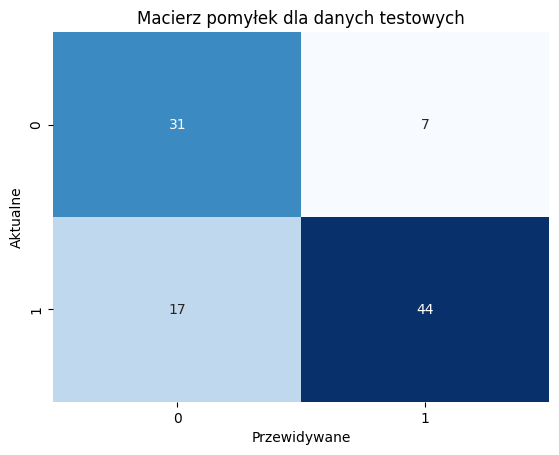

Dla k = 2 dokładność wynosi: 0.6767676767676768


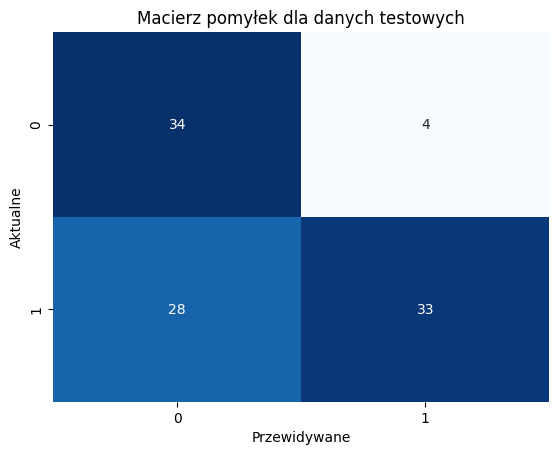

Dla k = 3 dokładność wynosi: 0.7272727272727273


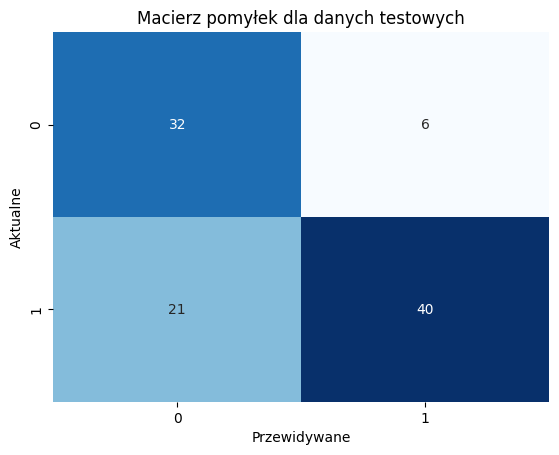

Dla k = 4 dokładność wynosi: 0.7272727272727273


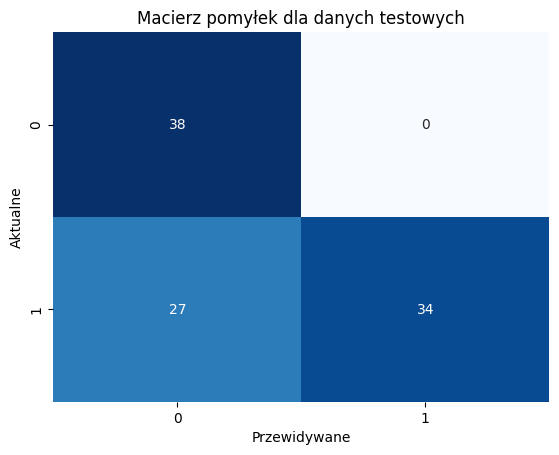

Dla k = 5 dokładność wynosi: 0.6868686868686869


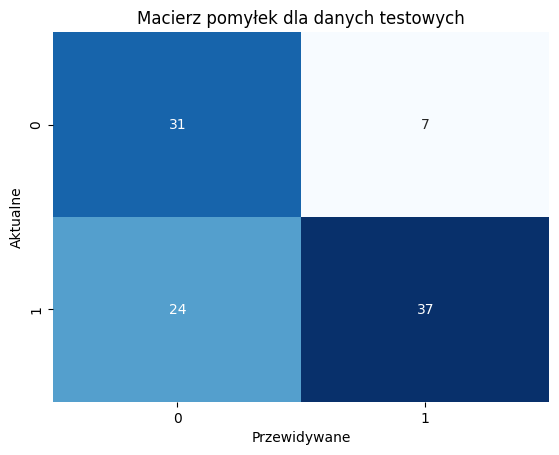

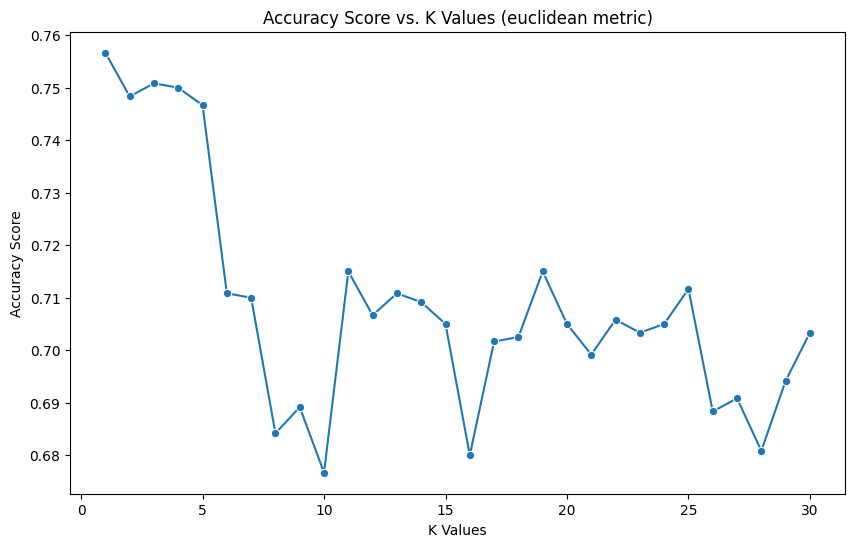

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.7373737373737373


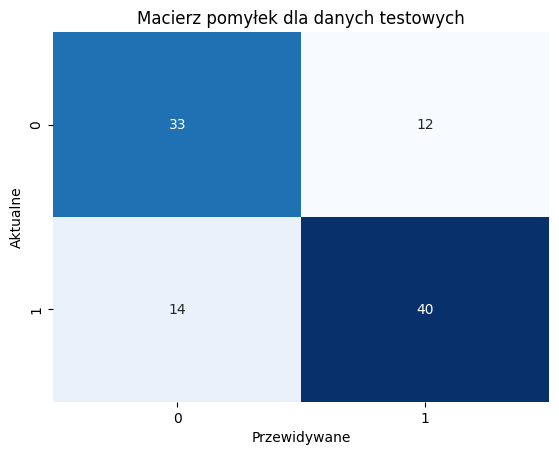

Dla k = 2 dokładność wynosi: 0.7575757575757576


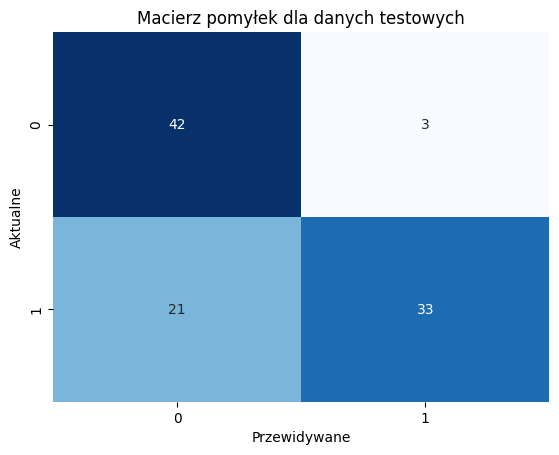

Dla k = 3 dokładność wynosi: 0.7373737373737373


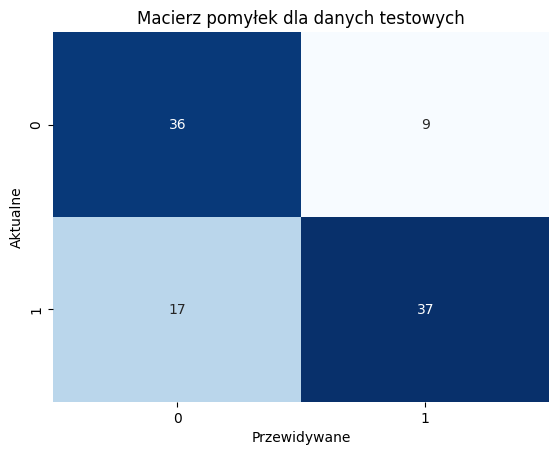

Dla k = 4 dokładność wynosi: 0.7777777777777778


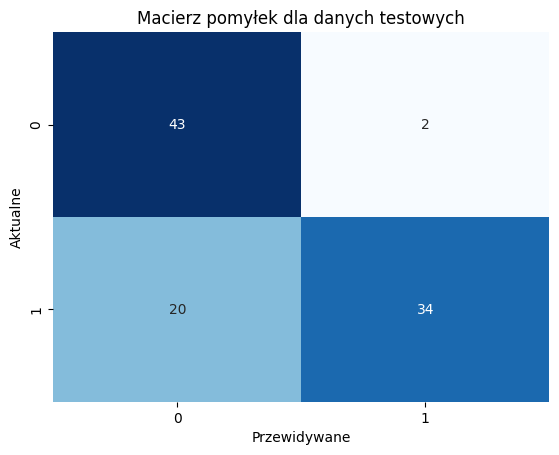

Dla k = 5 dokładność wynosi: 0.7575757575757576


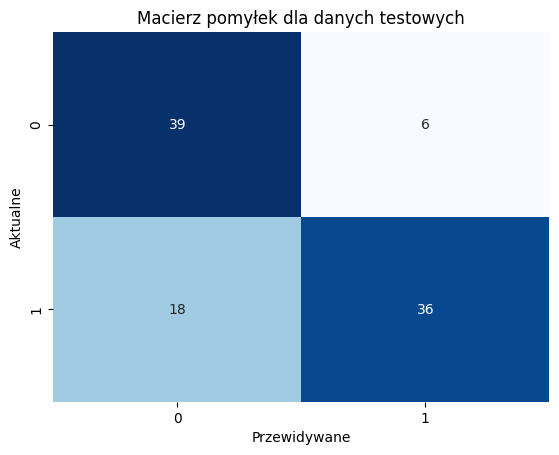

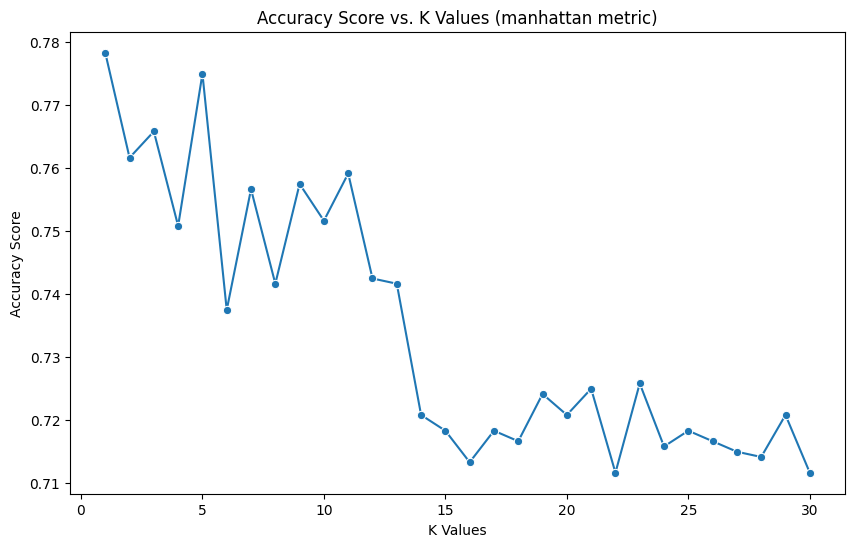

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.7474747474747475


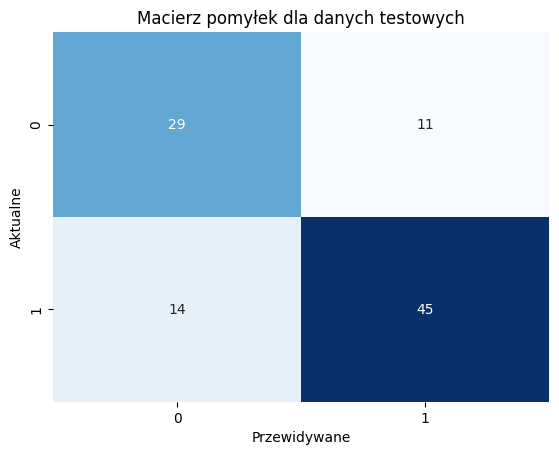

Dla k = 2 dokładność wynosi: 0.7373737373737373


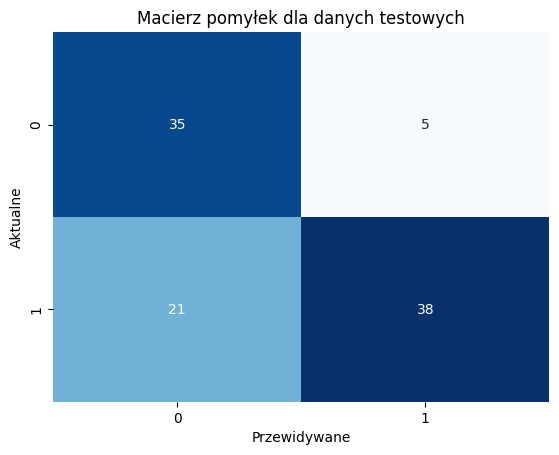

Dla k = 3 dokładność wynosi: 0.7272727272727273


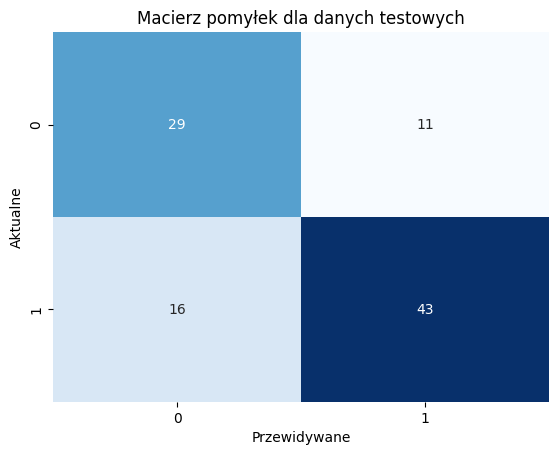

Dla k = 4 dokładność wynosi: 0.7272727272727273


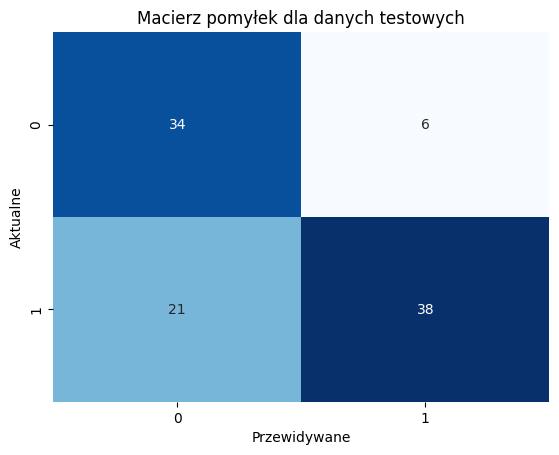

Dla k = 5 dokładność wynosi: 0.6868686868686869


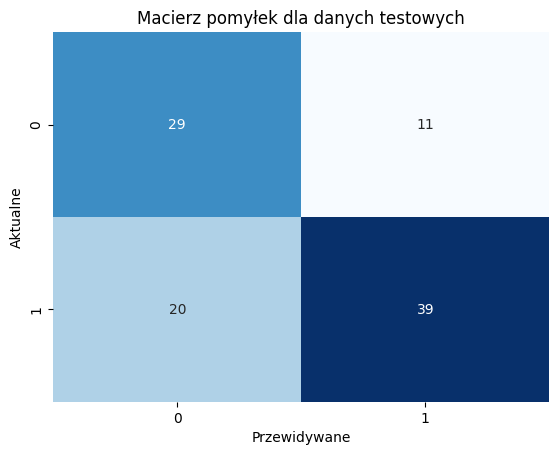

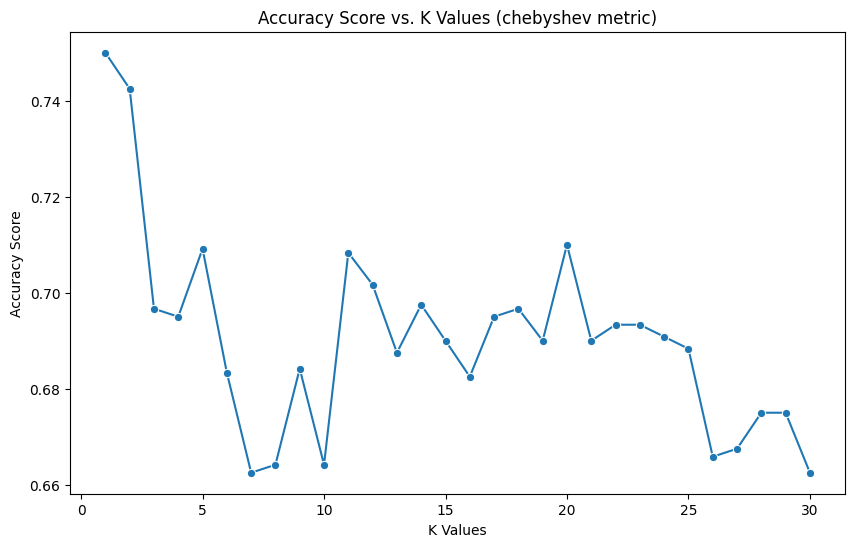

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 0.8787878787878788


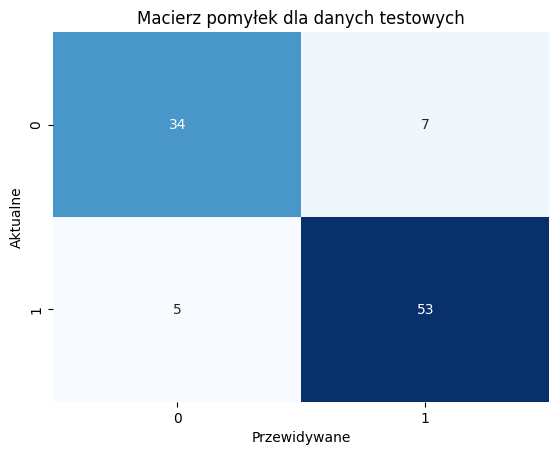

Dla k = 2 dokładność wynosi: 0.8888888888888888


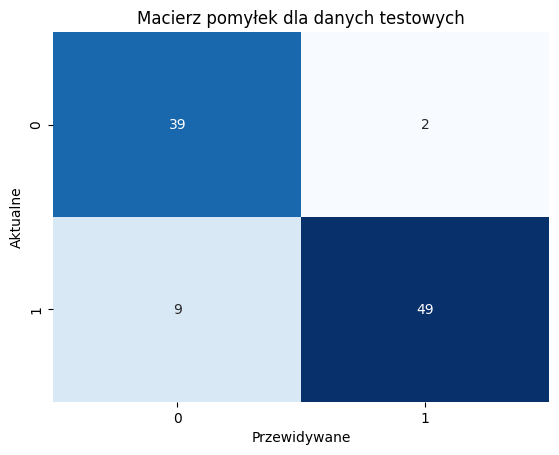

Dla k = 3 dokładność wynosi: 0.8787878787878788


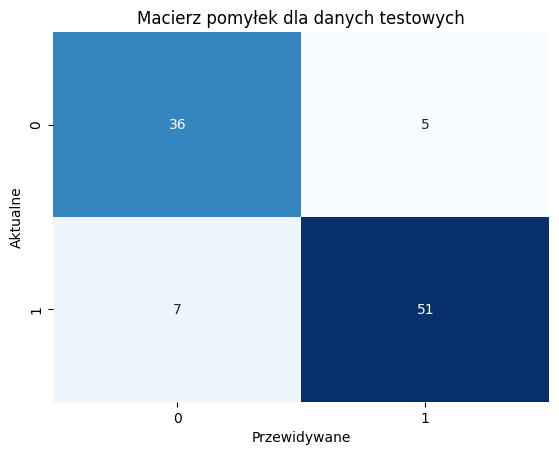

Dla k = 4 dokładność wynosi: 0.8686868686868687


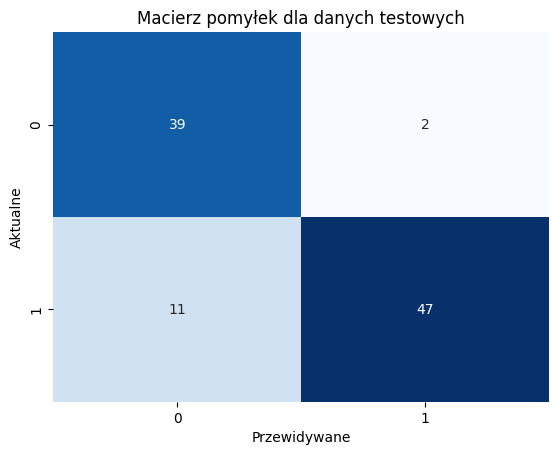

Dla k = 5 dokładność wynosi: 0.8787878787878788


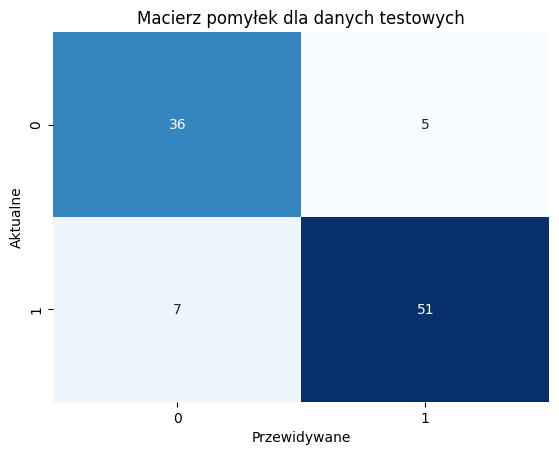

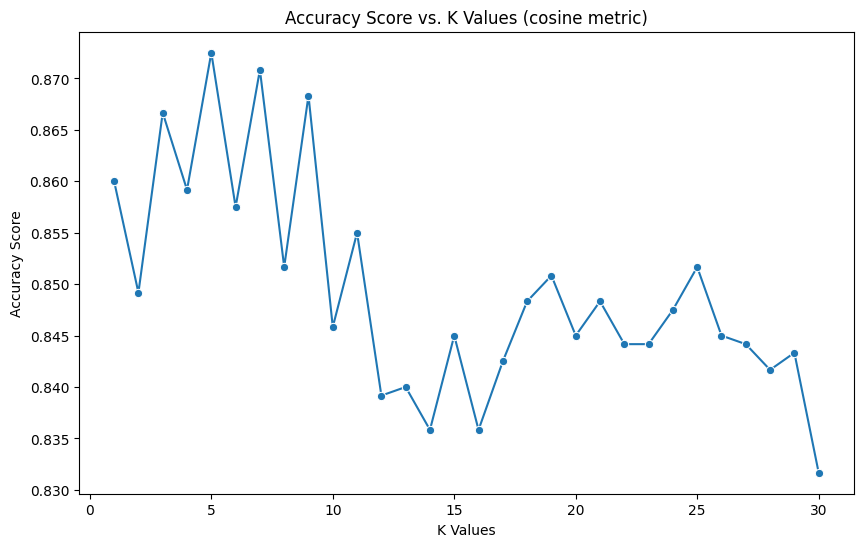

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9191919191919192


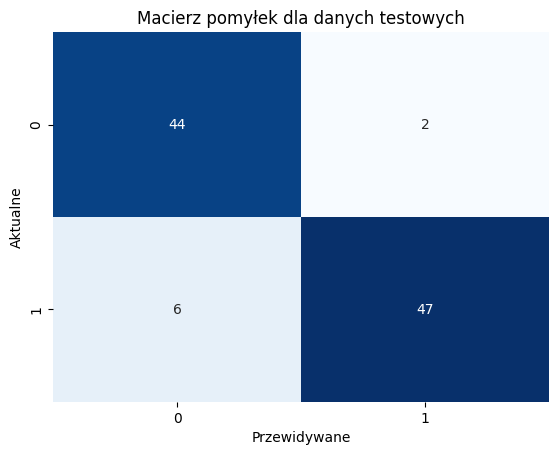

Dla k = 2 dokładność wynosi: 0.9191919191919192


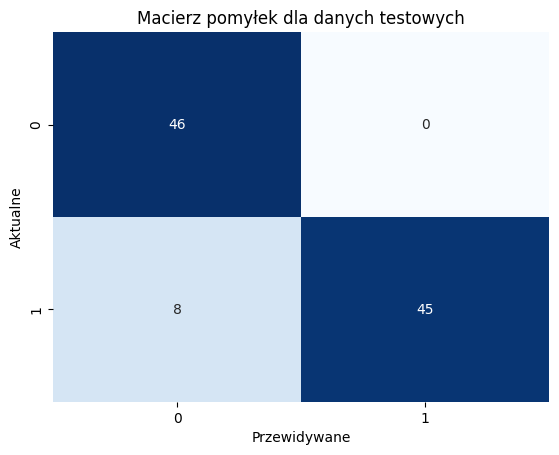

Dla k = 3 dokładność wynosi: 0.9090909090909091


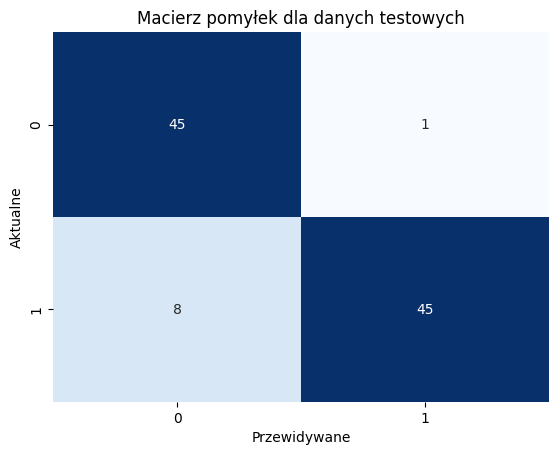

Dla k = 4 dokładność wynosi: 0.9191919191919192


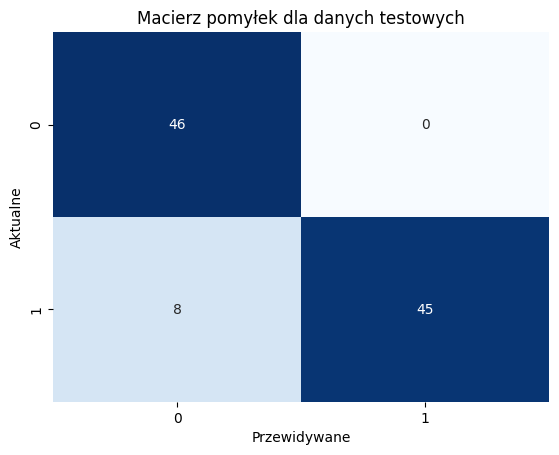

Dla k = 5 dokładność wynosi: 0.9292929292929293


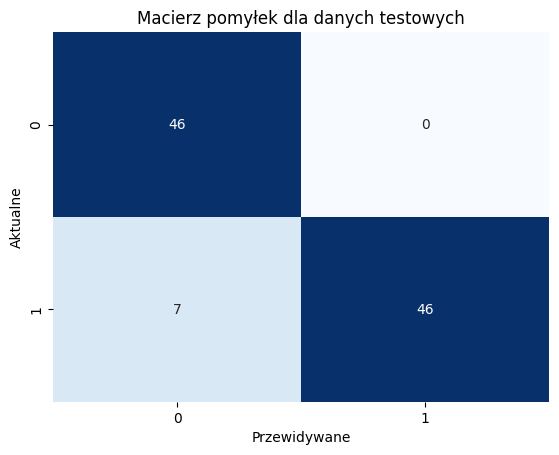

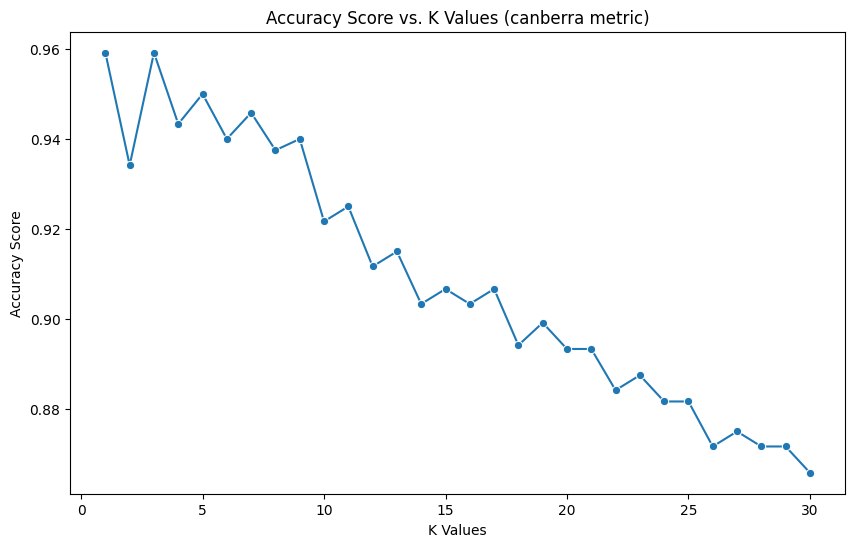

Czas wykonania testu: 87.92569518089294 sekundy


In [74]:
#Dane nieznormalizowane testy dla roznych metryk k jest w zakresie od 1 do 5 
import time
start_time = time.time()
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df, metric="euclidean", cv=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df, metric="manhattan", cv=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df, metric="chebyshev", cv=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df, metric="cosine", cv=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df, metric="canberra", cv=True)
end_time = time.time()
elapsed_time = end_time - start_time
print("Czas wykonania testu:", elapsed_time, "sekundy")

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 1.0


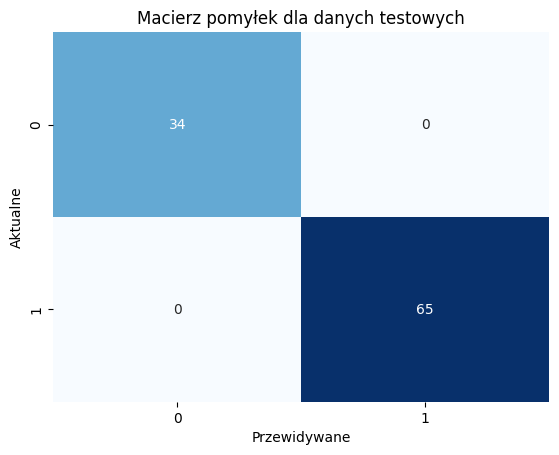

Dla k = 2 dokładność wynosi: 0.9696969696969697


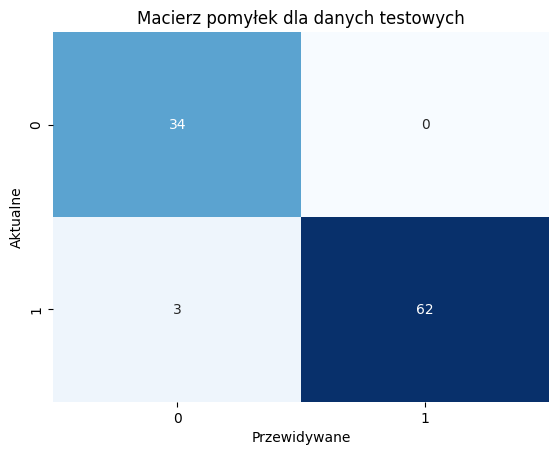

Dla k = 3 dokładność wynosi: 0.9696969696969697


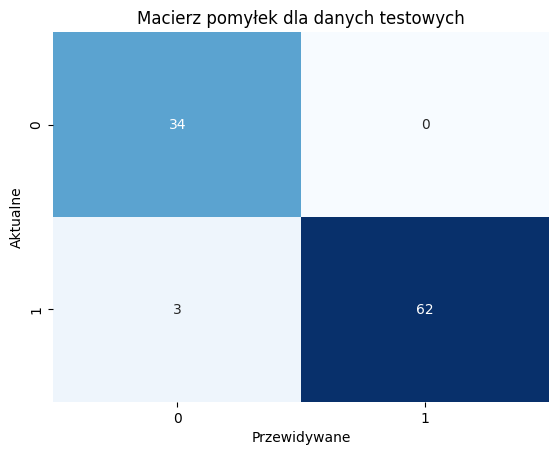

Dla k = 4 dokładność wynosi: 0.9696969696969697


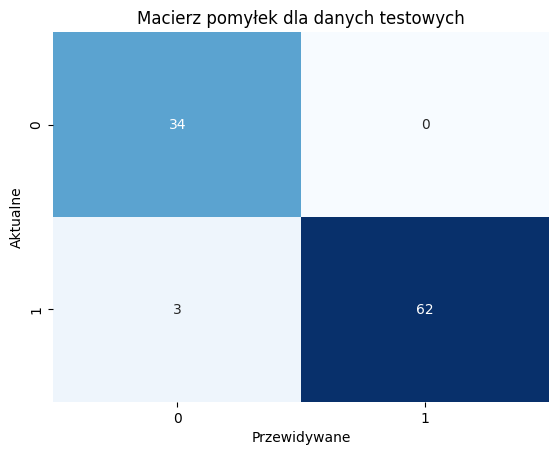

Dla k = 5 dokładność wynosi: 0.98989898989899


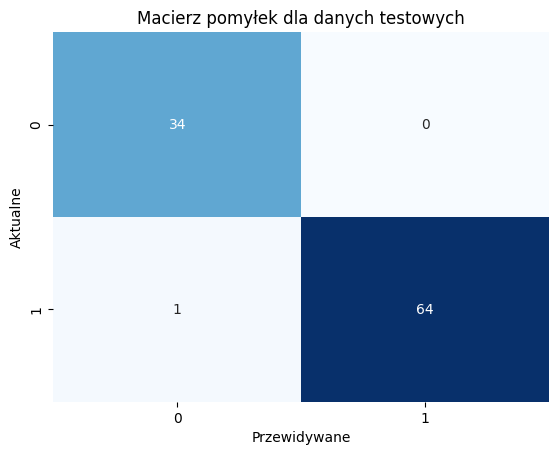

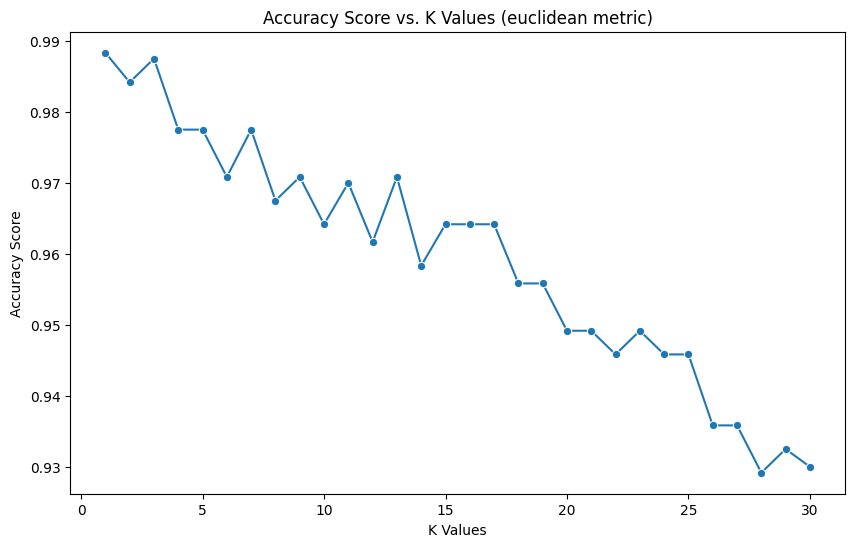

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.98989898989899


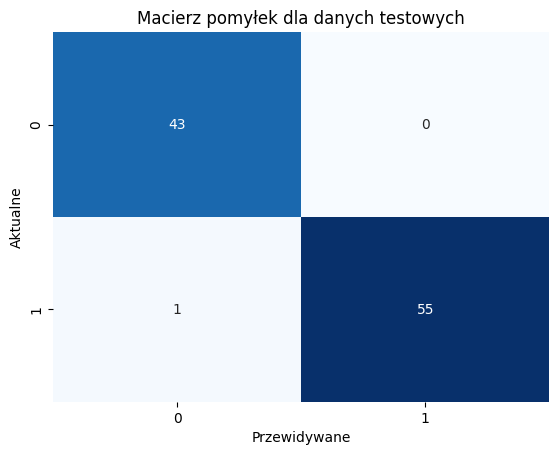

Dla k = 2 dokładność wynosi: 0.9797979797979798


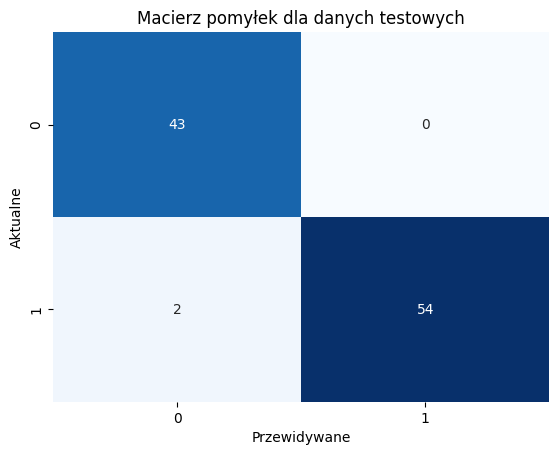

Dla k = 3 dokładność wynosi: 0.9797979797979798


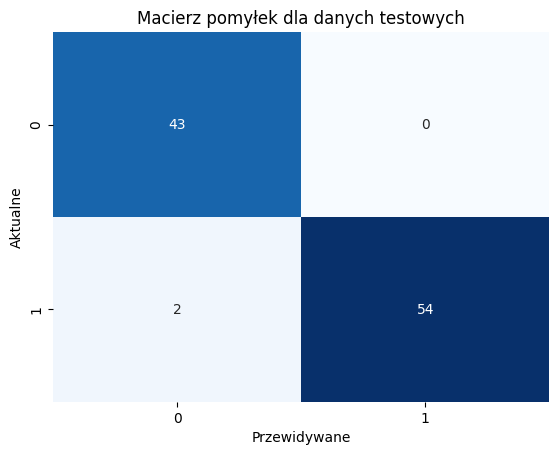

Dla k = 4 dokładność wynosi: 0.9595959595959596


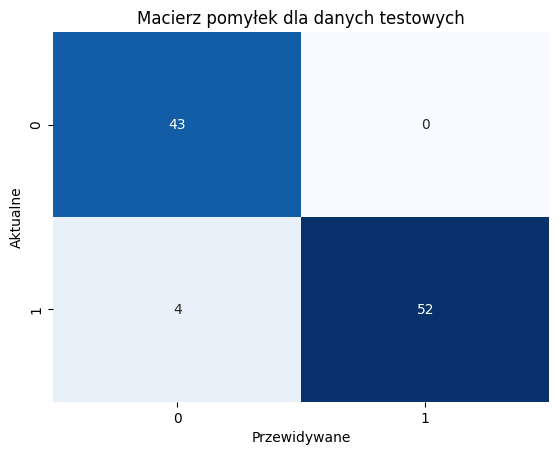

Dla k = 5 dokładność wynosi: 0.9696969696969697


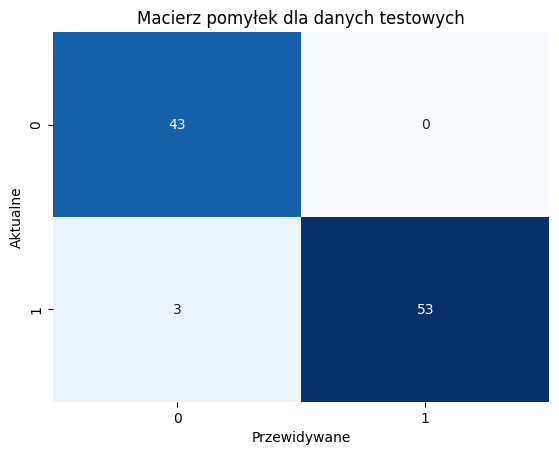

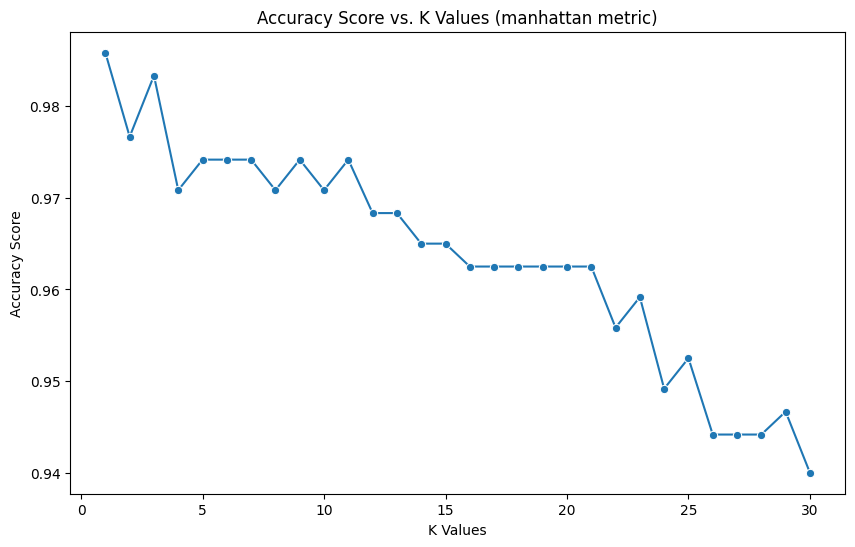

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.7777777777777778


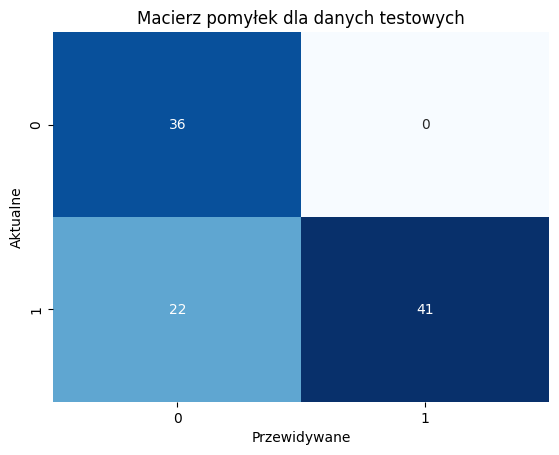

Dla k = 2 dokładność wynosi: 0.6363636363636364


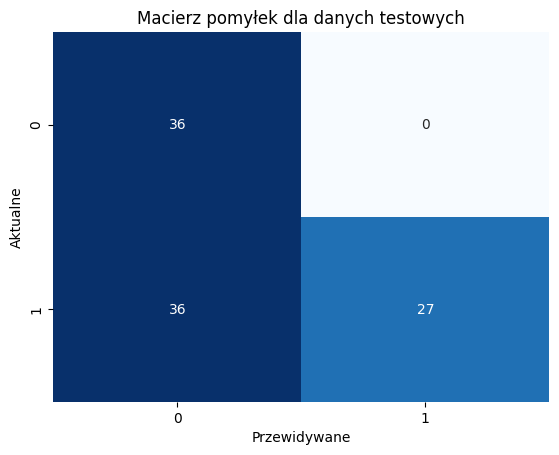

Dla k = 3 dokładność wynosi: 0.7777777777777778


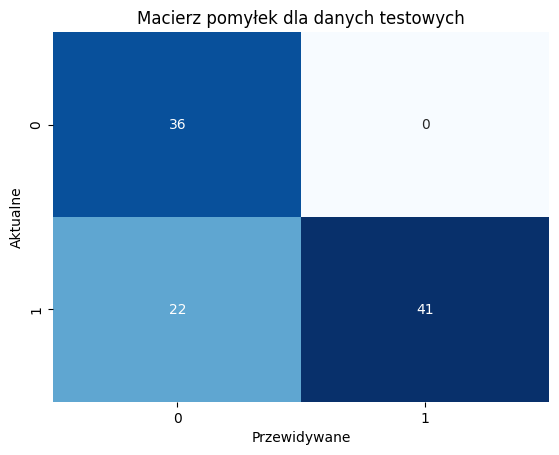

Dla k = 4 dokładność wynosi: 0.5959595959595959


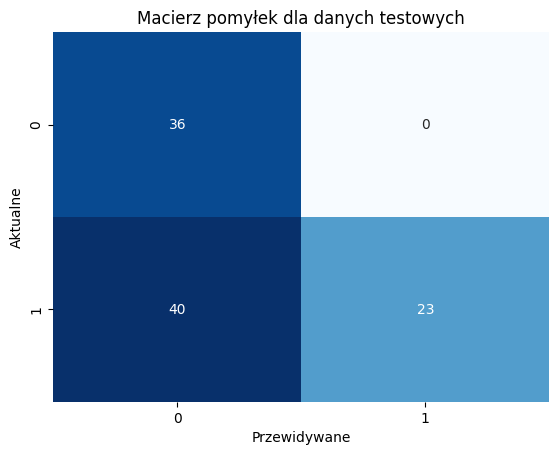

Dla k = 5 dokładność wynosi: 0.6464646464646465


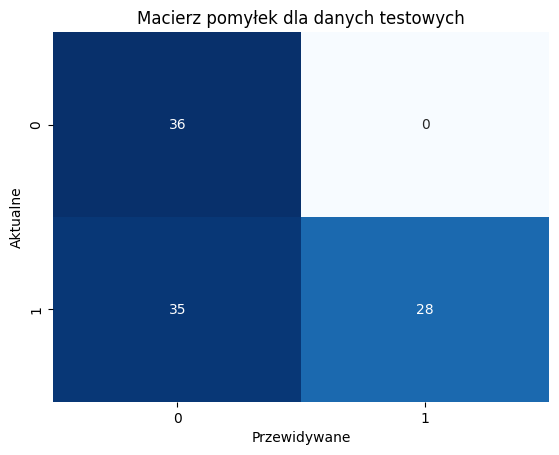

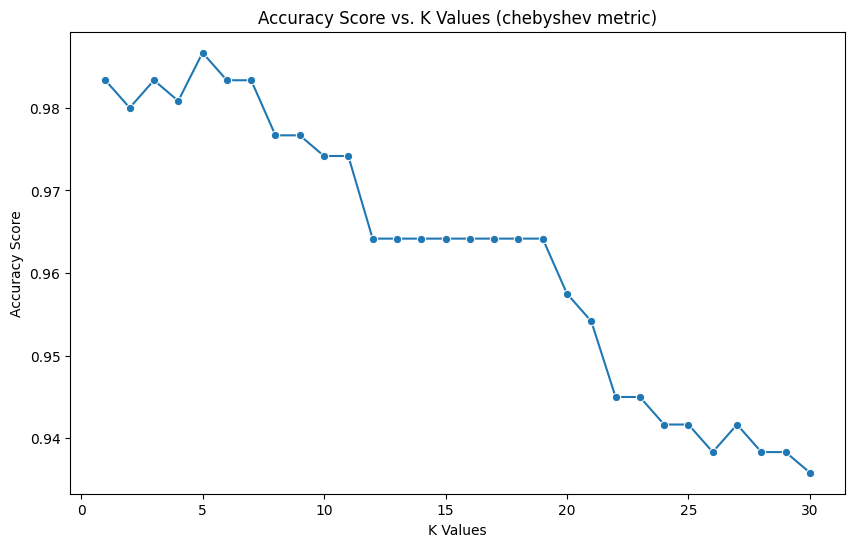

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 0.9797979797979798


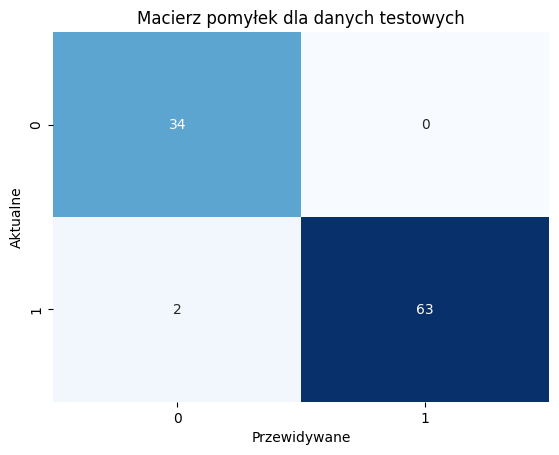

Dla k = 2 dokładność wynosi: 0.9595959595959596


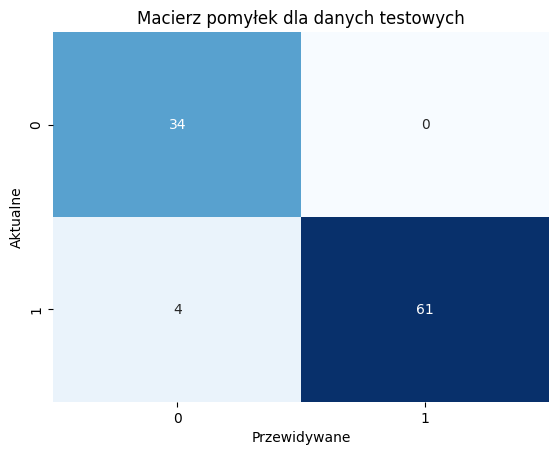

Dla k = 3 dokładność wynosi: 0.9595959595959596


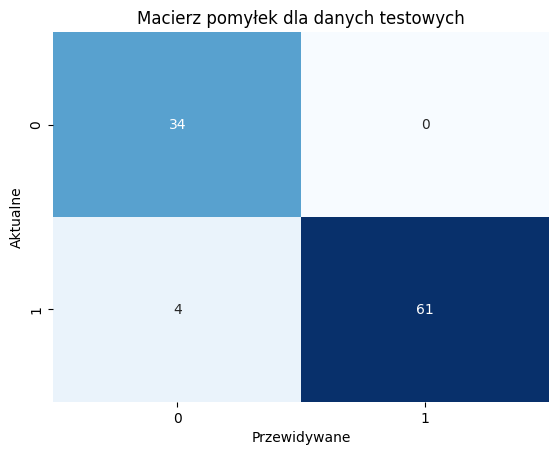

Dla k = 4 dokładność wynosi: 0.9494949494949495


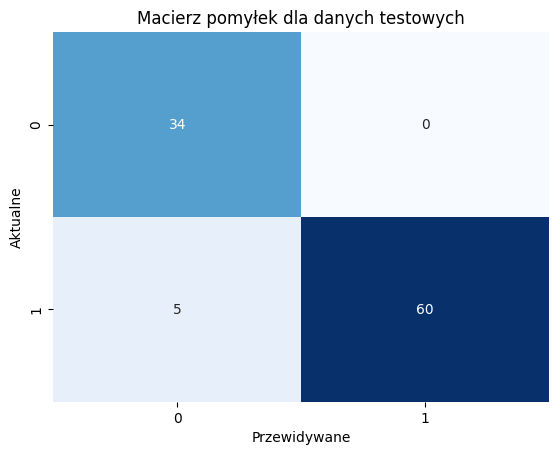

Dla k = 5 dokładność wynosi: 0.9494949494949495


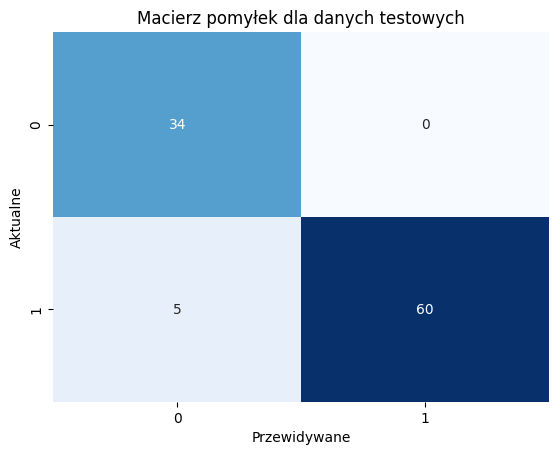

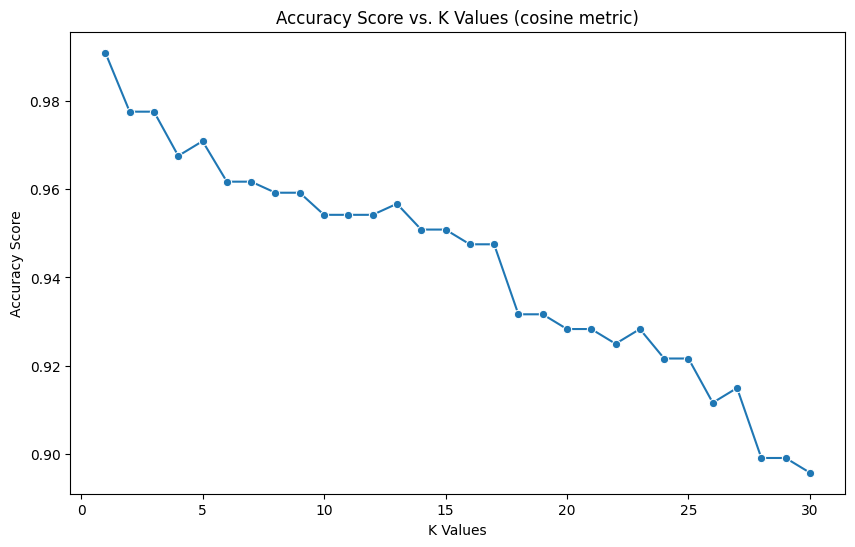

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9696969696969697


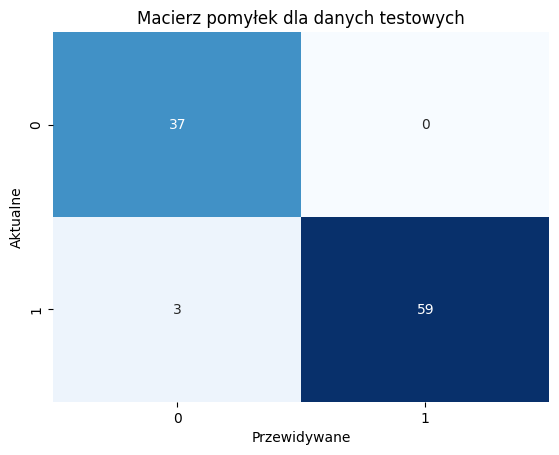

Dla k = 2 dokładność wynosi: 0.9696969696969697


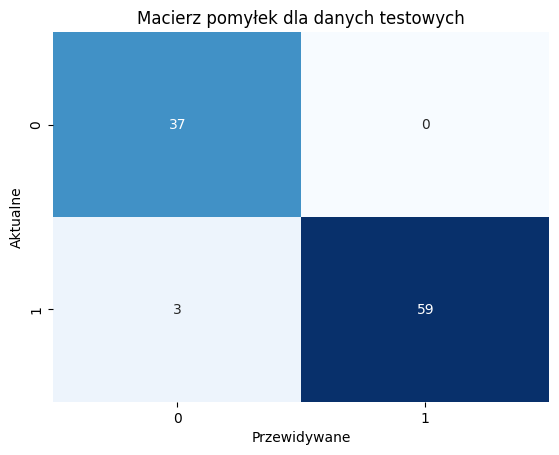

Dla k = 3 dokładność wynosi: 0.9696969696969697


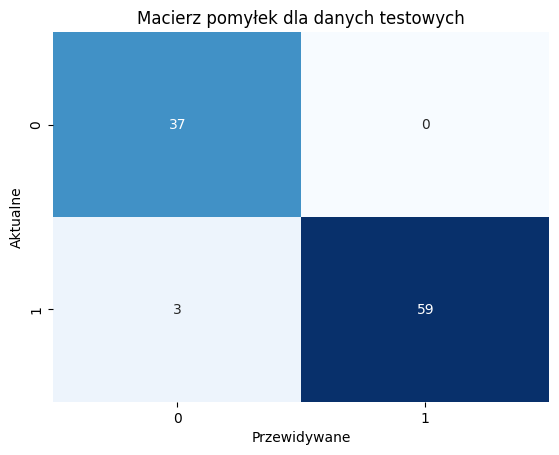

Dla k = 4 dokładność wynosi: 0.9292929292929293


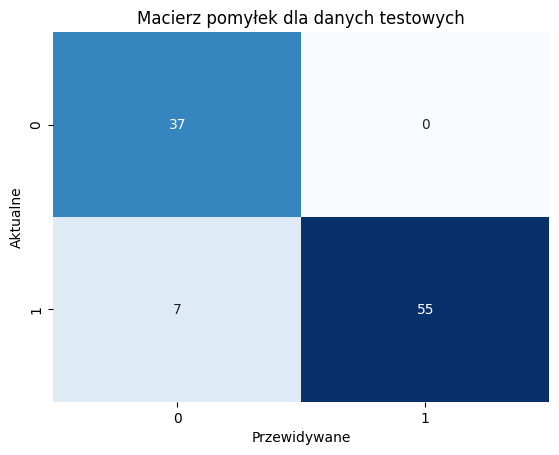

Dla k = 5 dokładność wynosi: 0.9393939393939394


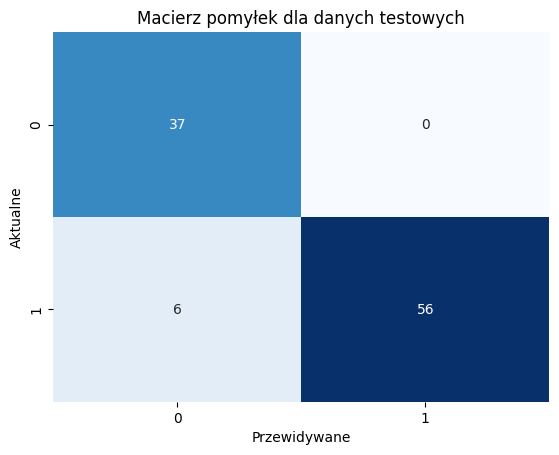

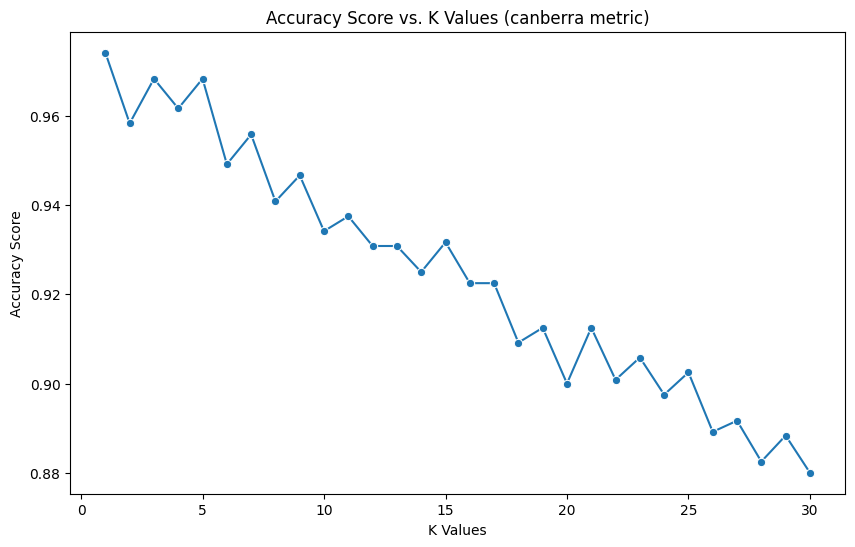

In [27]:
#Dane znormalizowane min-max dla roznych metryk
df_norm = DataProc.NormalizeMinMax(df.copy())
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df_norm, metric="euclidean", cv=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df_norm, metric="manhattan", cv=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df_norm, metric="chebyshev", cv=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df_norm, metric="cosine", cv=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df_norm, metric="canberra", cv=True)

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.98989898989899


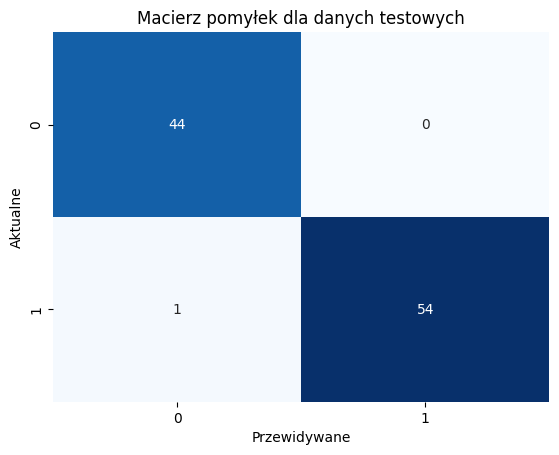

Dla k = 2 dokładność wynosi: 0.9494949494949495


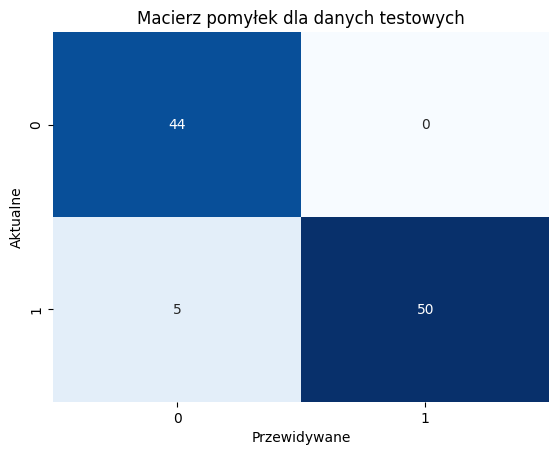

Dla k = 3 dokładność wynosi: 0.9797979797979798


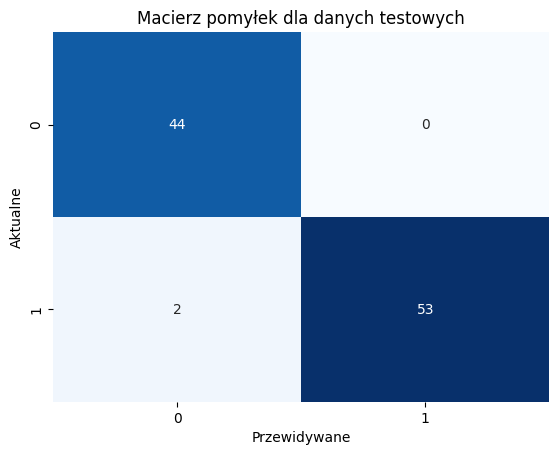

Dla k = 4 dokładność wynosi: 0.9393939393939394


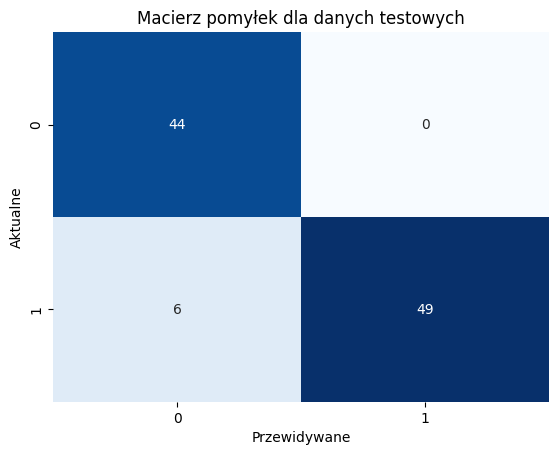

Dla k = 5 dokładność wynosi: 0.9696969696969697


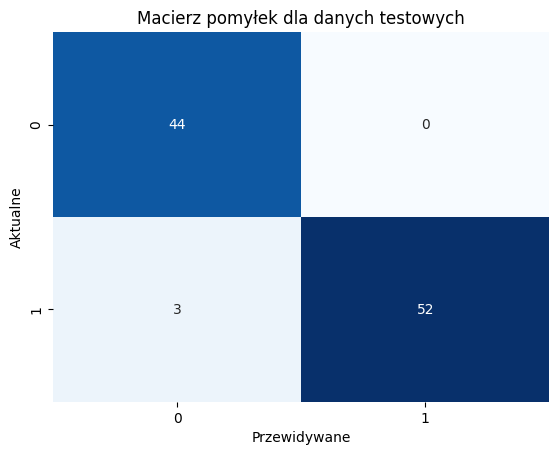

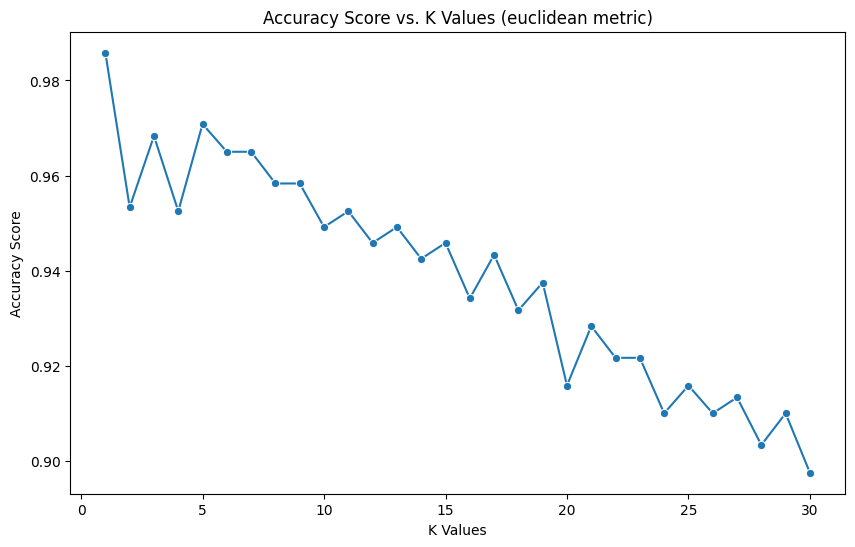

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.9696969696969697


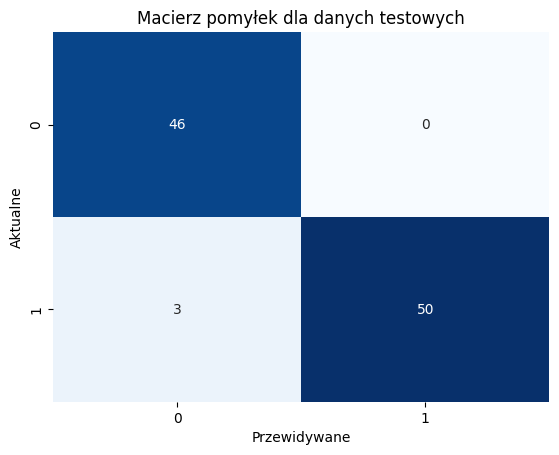

Dla k = 2 dokładność wynosi: 0.9595959595959596


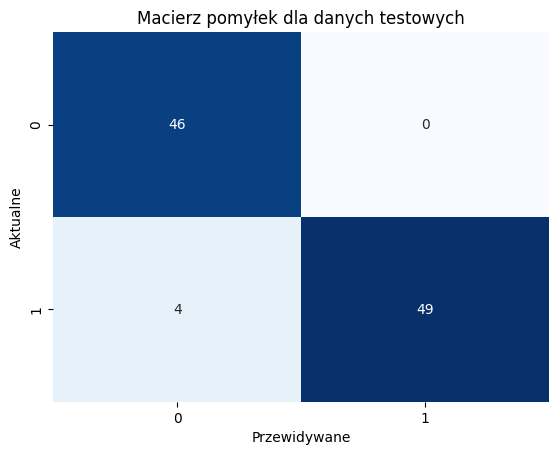

Dla k = 3 dokładność wynosi: 0.9797979797979798


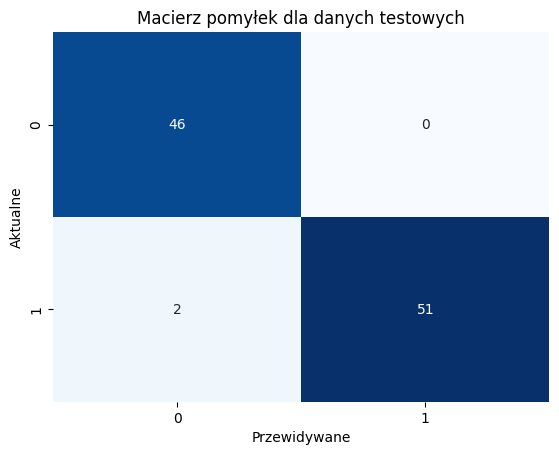

Dla k = 4 dokładność wynosi: 0.9696969696969697


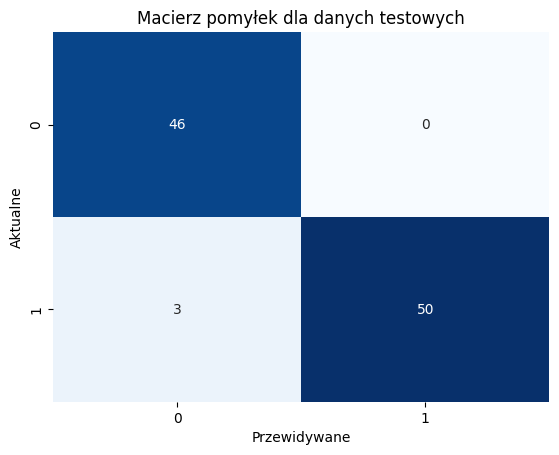

Dla k = 5 dokładność wynosi: 0.9696969696969697


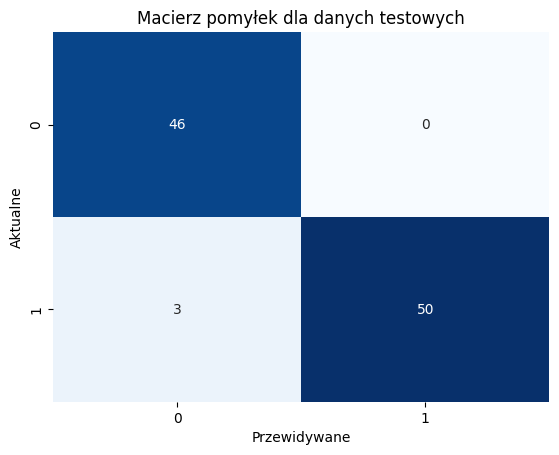

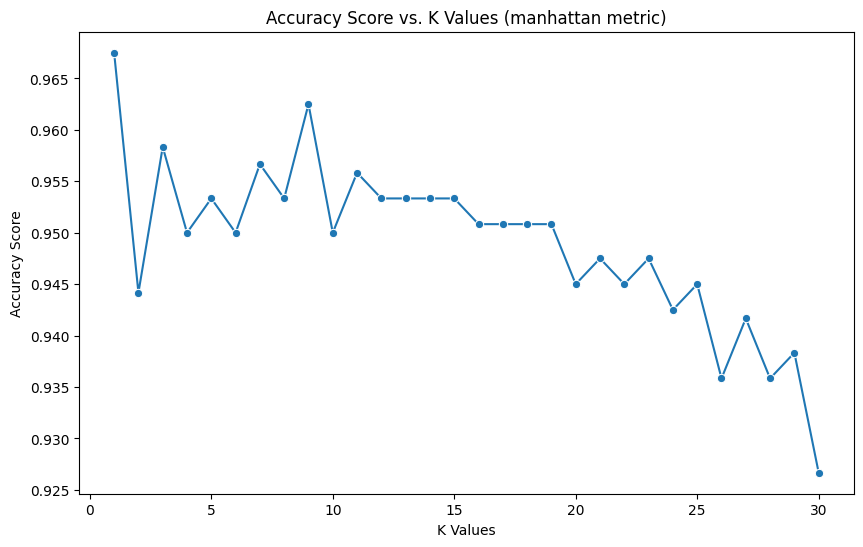

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.9797979797979798


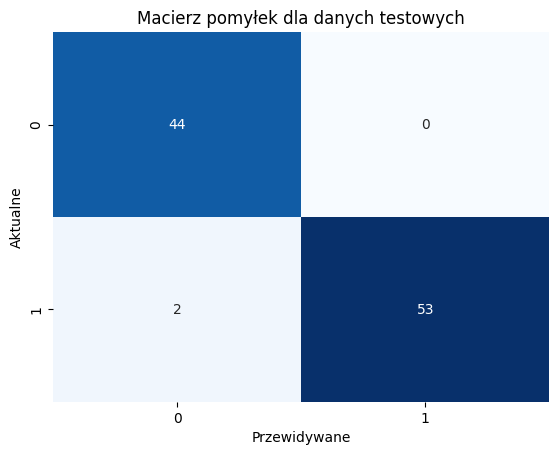

Dla k = 2 dokładność wynosi: 0.9595959595959596


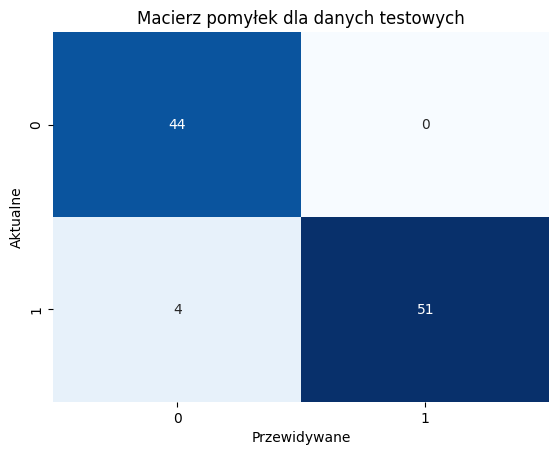

Dla k = 3 dokładność wynosi: 0.9696969696969697


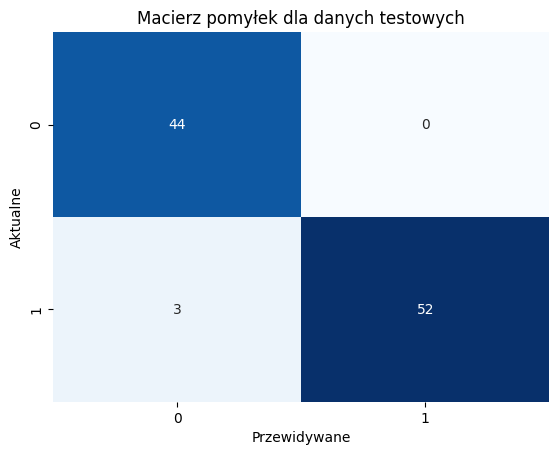

Dla k = 4 dokładność wynosi: 0.9494949494949495


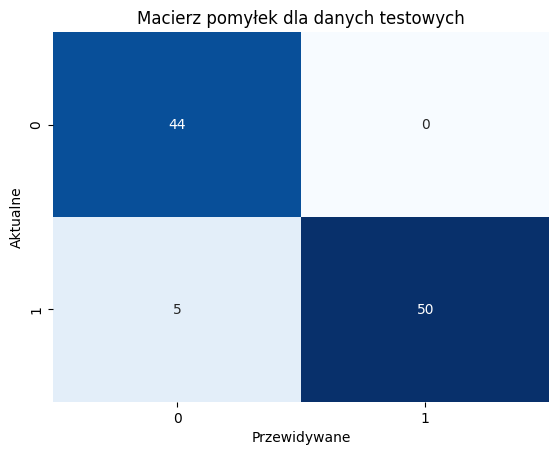

Dla k = 5 dokładność wynosi: 0.9494949494949495


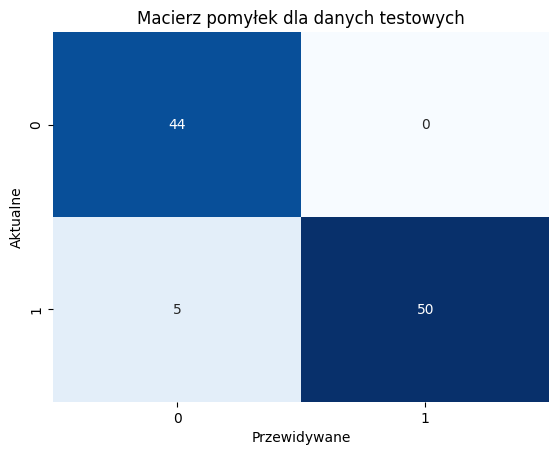

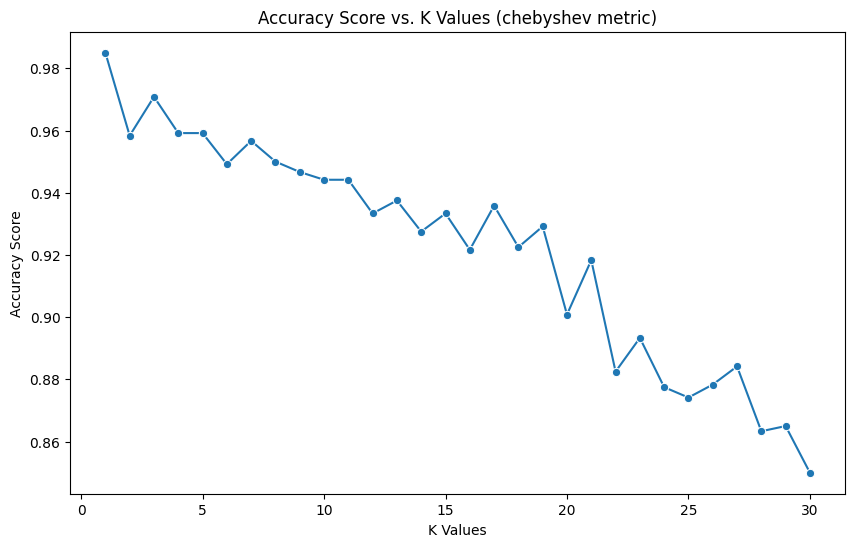

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 1.0


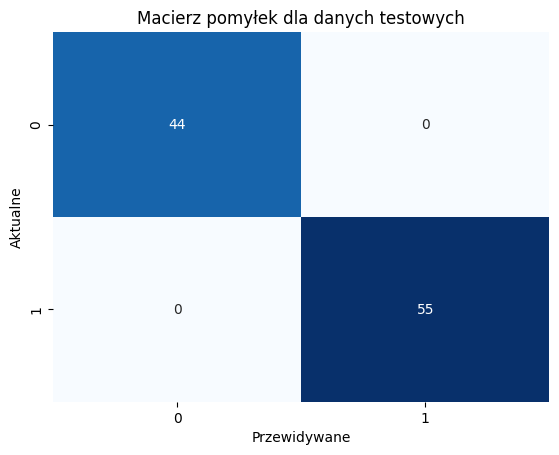

Dla k = 2 dokładność wynosi: 0.9797979797979798


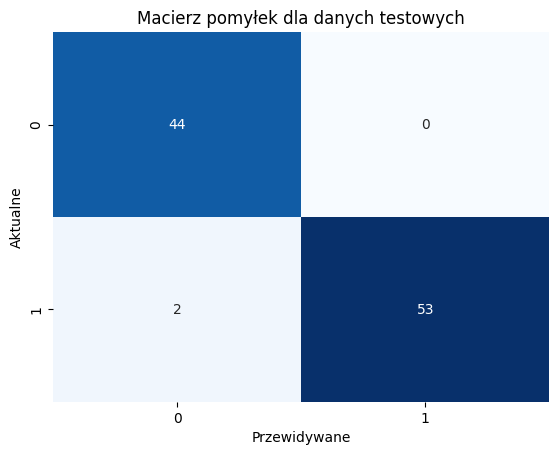

Dla k = 3 dokładność wynosi: 0.9797979797979798


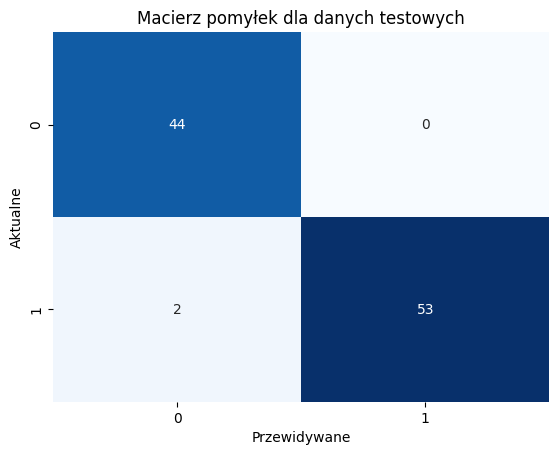

Dla k = 4 dokładność wynosi: 0.9797979797979798


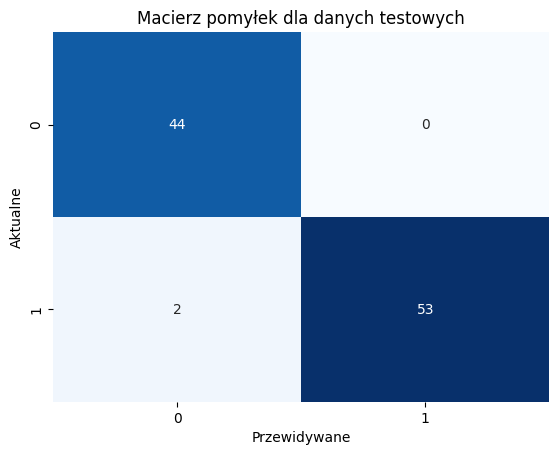

Dla k = 5 dokładność wynosi: 0.98989898989899


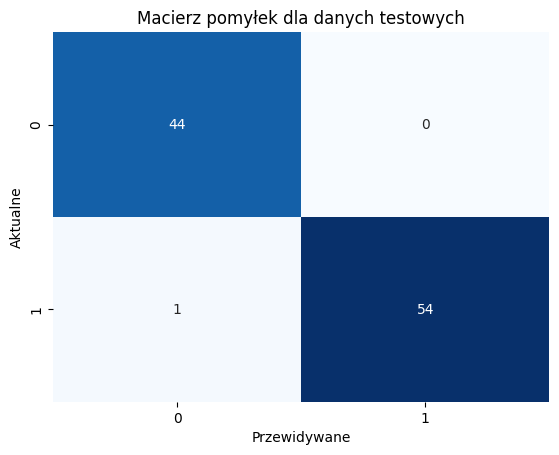

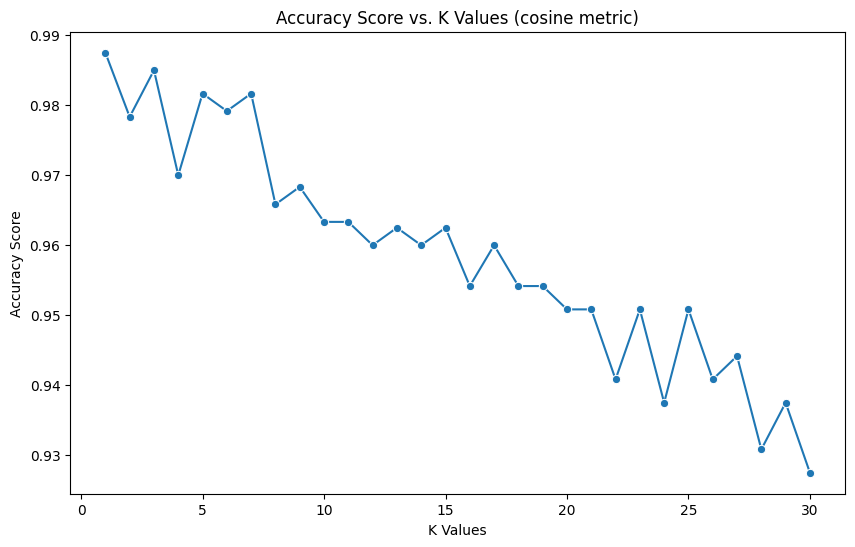

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9696969696969697


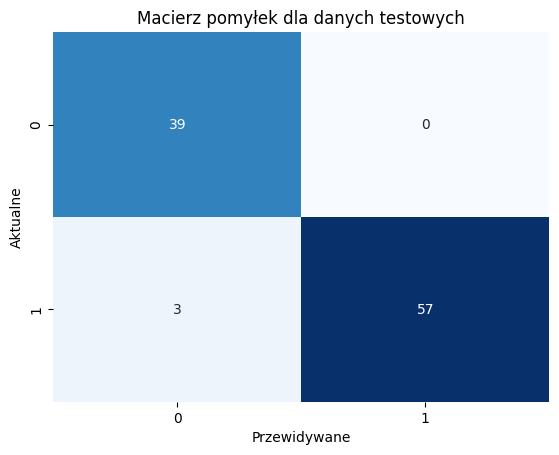

Dla k = 2 dokładność wynosi: 0.9393939393939394


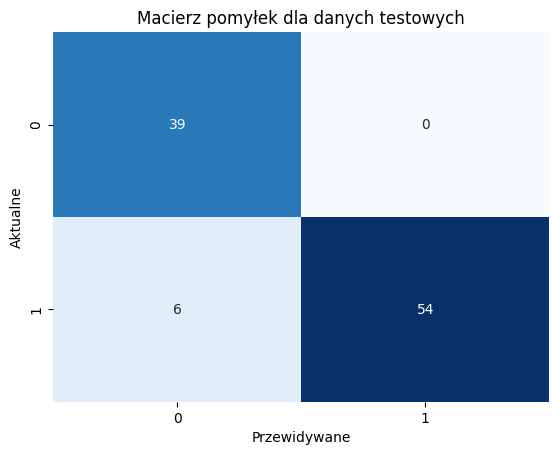

Dla k = 3 dokładność wynosi: 0.9595959595959596


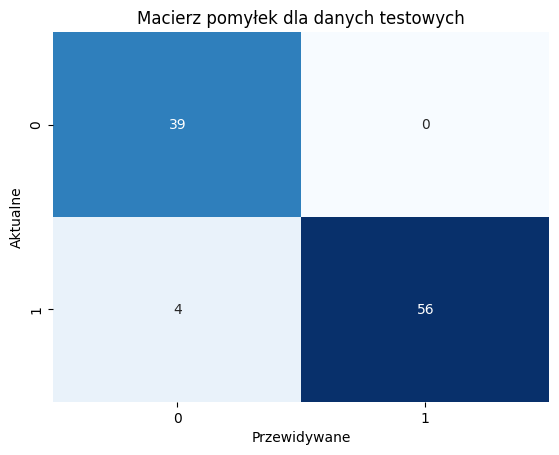

Dla k = 4 dokładność wynosi: 0.9494949494949495


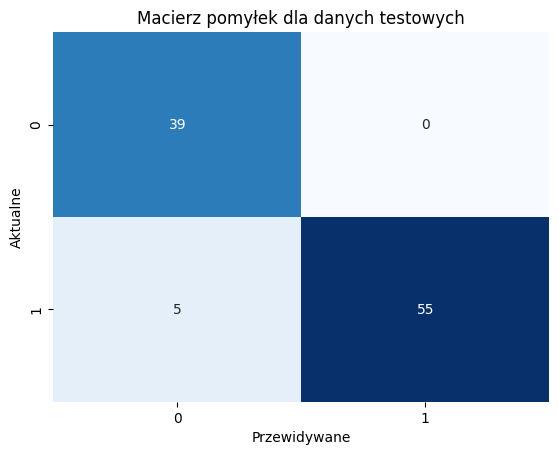

Dla k = 5 dokładność wynosi: 0.9595959595959596


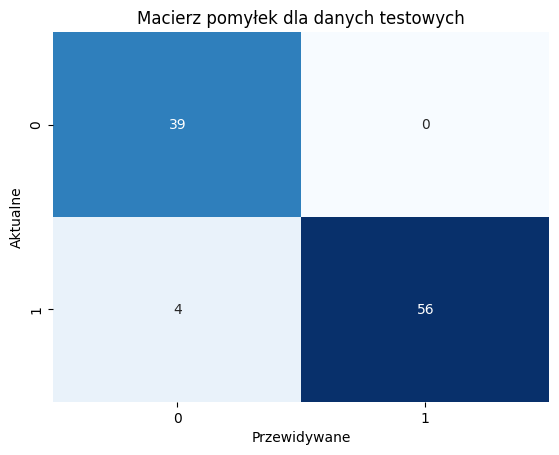

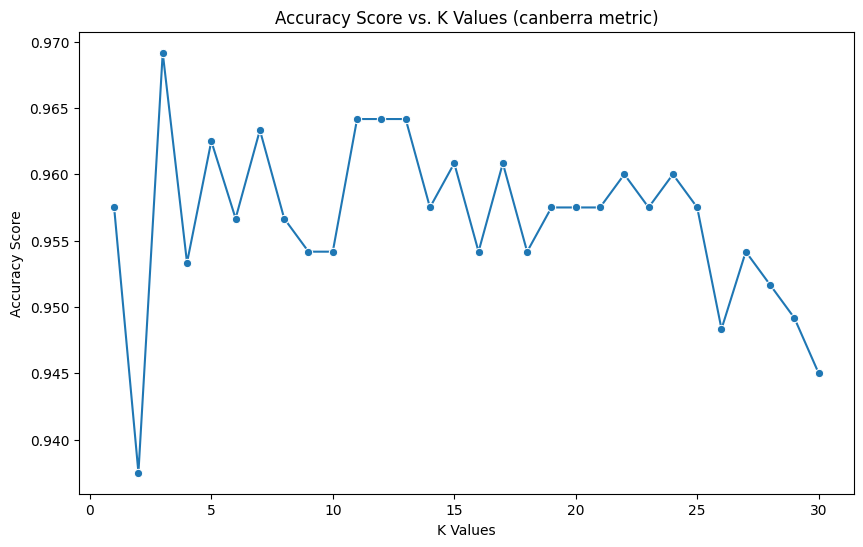

In [28]:
#Dane ustandaryzowane (Z-score normalization) dla roznych metryk
df_stand = DataProc.StandardizeZScore(df.copy())
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df_stand, metric="euclidean", cv=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df_stand, metric="manhattan", cv=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df_stand, metric="chebyshev", cv=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df_stand, metric="cosine", cv=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df_stand, metric="canberra", cv=True)

In [34]:
#Przy okazji sprawdzam czy standaryzacja dziala ok, jak widac tak bo średnia jest dla kazdej kolumny bliska 0, a odchylenie 1
df_stand.describe()

age            bp            sg            al          su  \
count  329.000000  3.290000e+02  3.290000e+02  3.290000e+02  329.000000   
mean     0.000000  3.671497e-16 -8.077294e-15 -8.638817e-17    0.000000   
std      1.000000  1.000000e+00  1.000000e+00  1.000000e+00    1.000000   
min     -2.807669 -1.959214e+00 -2.171484e+00 -7.567025e-01   -0.400404   
25%     -0.542705 -4.738004e-01 -1.297519e+00 -7.567025e-01   -0.400404   
50%      0.096131  2.689062e-01  4.504114e-01 -7.567025e-01   -0.400404   
75%      0.734968  2.689062e-01  4.504114e-01  7.032271e-01   -0.400404   
max      2.303020  7.695972e+00  1.324377e+00  2.893122e+00    4.311052   

                 pc         pcc            ba           bgr            bu  \
count  3.290000e+02  329.000000  3.290000e+02  3.290000e+02  3.290000e+02   
mean   2.159704e-17    0.000000 -3.239557e-17 -2.591645e-16 -1.079852e-16   
std    1.000000e+00    1.000000  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.472497e-01   -0.376734 -2.607193e-01 -1.680011e+00 -1.093598e+00   
25%   -5.472497e-01   -0.376734 -2.607193e-01 -6.114122e-01 -5.904614e-01   
50%   -5.472497e-01   -0.376734 -2.607193e-01 -2.774750e-01 -2.618824e-01   
75%   -5.472497e-01   -0.376734 -2.607193e-01  3.520021e-03  5.490320e-02   
max    1.821765e+00    2.646326  3.823884e+00  4.571293e+00  6.905248e+00   

       ...           pcv            wc            rc           htn  \
count  ...  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean   ...  2.591645e-16  4.103438e-16  1.295823e-16 -4.319409e-17   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.693358e+00 -2.316449e+00 -3.134329e+00 -7.028148e-01   
25%    ... -6.361442e-01 -5.983433e-01 -2.706337e-01 -7.028148e-01   
50%    ... -3.882603e-02  1.545346e-03 -2.312098e-02 -7.028148e-01   
75%    ...  7.090297e-01  3.727598e-01  5.646109e-01  1.418525e+00   
max    ...  1.809627e+00  6.722280e+00  3.905589e+00  1.418525e+00   

                 dm           cad         appet            pe           ane  \
count  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean   1.295823e-16  5.399261e-17 -1.727763e-16  2.159704e-17 -2.159704e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -6.409094e-01 -2.924855e-01 -1.974478e+00 -4.715616e-01 -3.974533e-01   
25%   -6.409094e-01 -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
50%   -6.409094e-01 -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
75%    1.555540e+00 -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
max    1.555540e+00  3.408581e+00  5.049237e-01  2.114168e+00  2.508372e+00   

       classification  
count      329.000000  
mean         0.589666  
std          0.492644  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 24 columns]

In [35]:
#Dla normalizacji podobnie tylko tym razem wartosci min max są w przedziale 0 do 1
df_norm.describe()

age          bp          sg          al          su          pc  \
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000   
mean     0.549372    0.202918    0.621159    0.207326    0.084985    0.231003   
std      0.195668    0.103571    0.286053    0.273986    0.212249    0.422116   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.443182    0.153846    0.250000    0.000000    0.000000    0.000000   
50%      0.568182    0.230769    0.750000    0.000000    0.000000    0.000000   
75%      0.693182    0.230769    0.750000    0.400000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              pcc          ba         bgr          bu  ...         pcv  \
count  329.000000  329.000000  329.000000  329.000000  ...  329.000000   
mean     0.124620    0.063830    0.268746    0.136719  ...    0.671155   
std      0.330791    0.244822    0.159967    0.125018  ...    0.181720   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.170940    0.062901  ...    0.555556   
50%      0.000000    0.000000    0.224359    0.103979  ...    0.664100   
75%      0.000000    0.000000    0.269309    0.143583  ...    0.800000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

               wc          rc         htn          dm         cad       appet  \
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000   
mean     0.256280    0.445222    0.331307    0.291793    0.079027    0.796353   
std      0.110635    0.142047    0.471400    0.455280    0.270192    0.403323   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.190083    0.406780    0.000000    0.000000    0.000000    1.000000   
50%      0.256451    0.441938    0.000000    0.000000    0.000000    1.000000   
75%      0.297521    0.525424    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               pe         ane  classification  
count  329.000000  329.000000      329.000000  
mean     0.182371    0.136778        0.589666  
std      0.386738    0.344136        0.492644  
min      0.000000    0.000000        0.000000  
25%      0.000000    0.000000        0.000000  
50%      0.000000    0.000000        1.000000  
75%      0.000000    0.000000        1.000000  
max      1.000000    1.000000        1.000000  

[8 rows x 24 columns]

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.7474747474747475


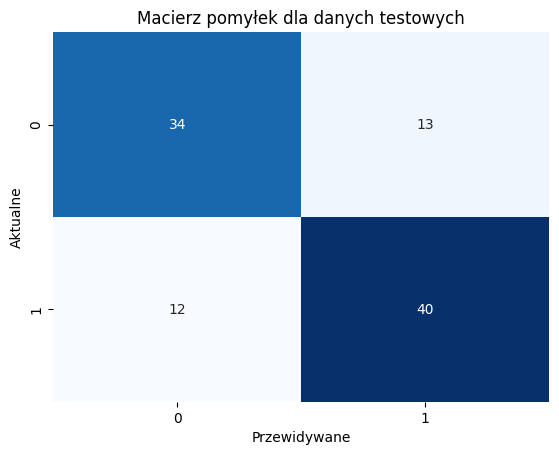

Dla k = 2 dokładność wynosi: 0.7474747474747475


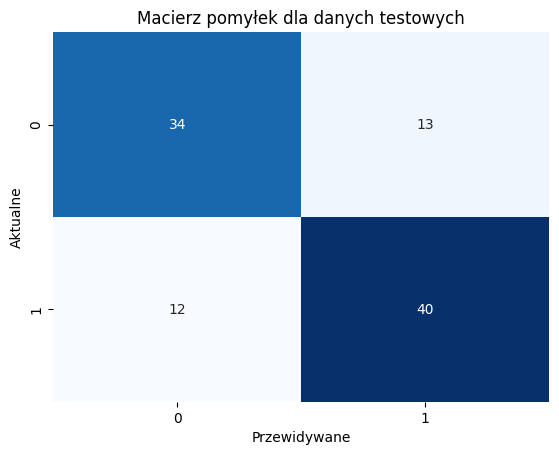

Dla k = 3 dokładność wynosi: 0.7171717171717171


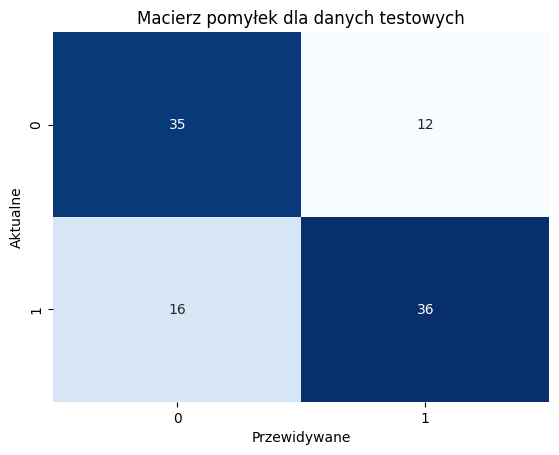

Dla k = 4 dokładność wynosi: 0.7171717171717171


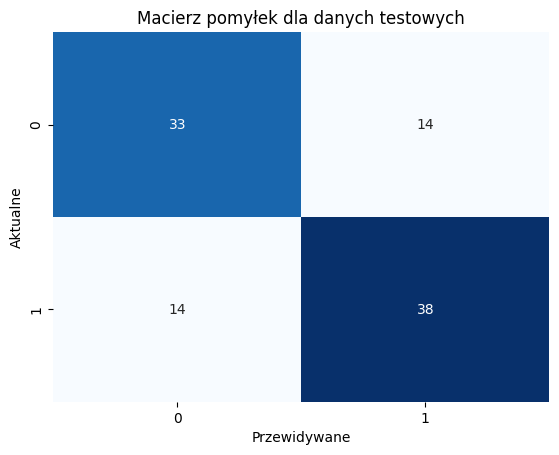

Dla k = 5 dokładność wynosi: 0.7474747474747475


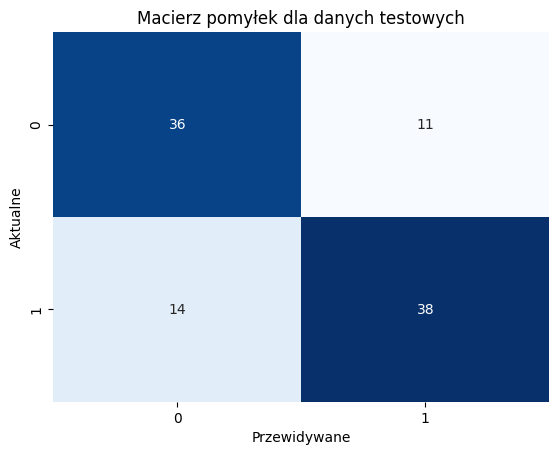

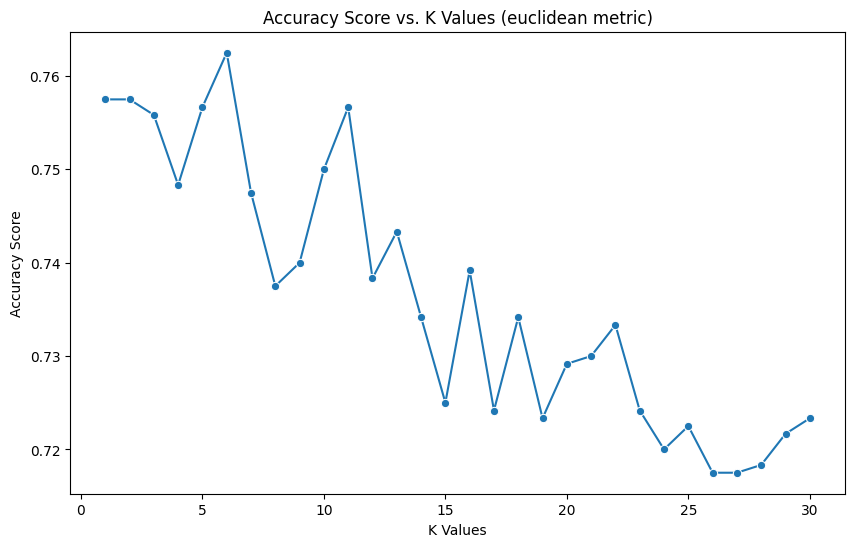

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.7777777777777778


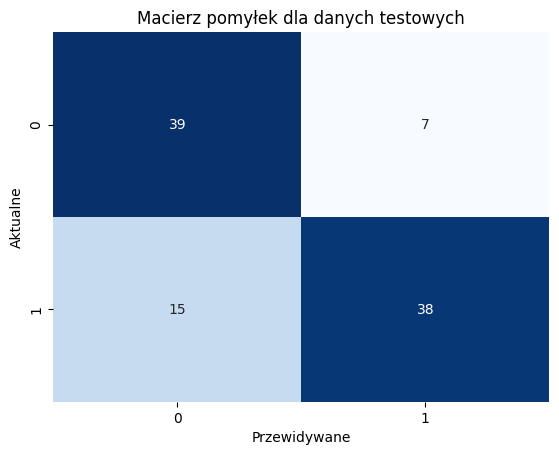

Dla k = 2 dokładność wynosi: 0.7777777777777778


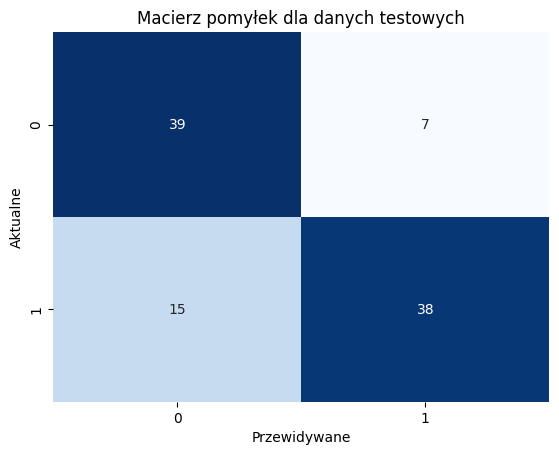

Dla k = 3 dokładność wynosi: 0.7777777777777778


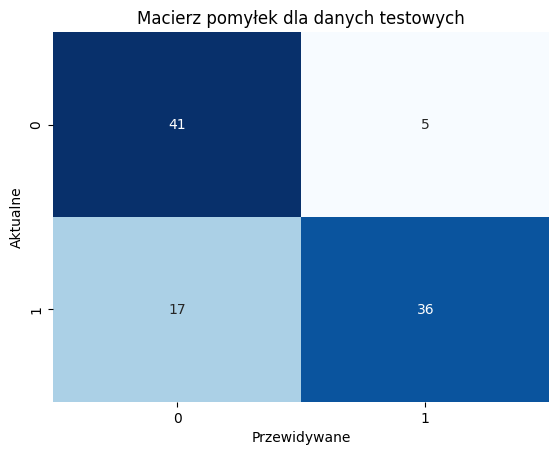

Dla k = 4 dokładność wynosi: 0.7676767676767676


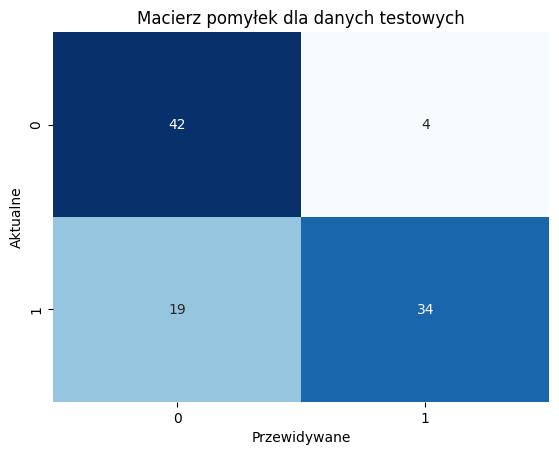

Dla k = 5 dokładność wynosi: 0.797979797979798


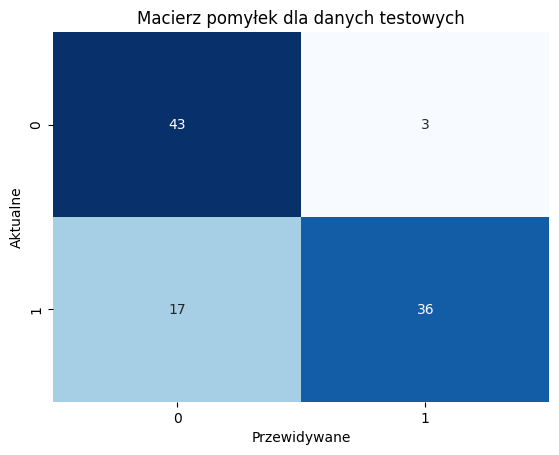

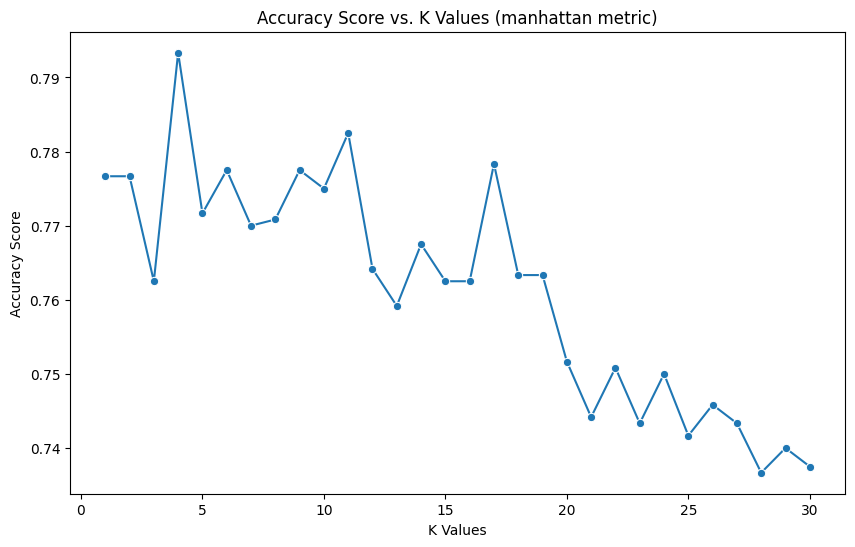

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.7777777777777778


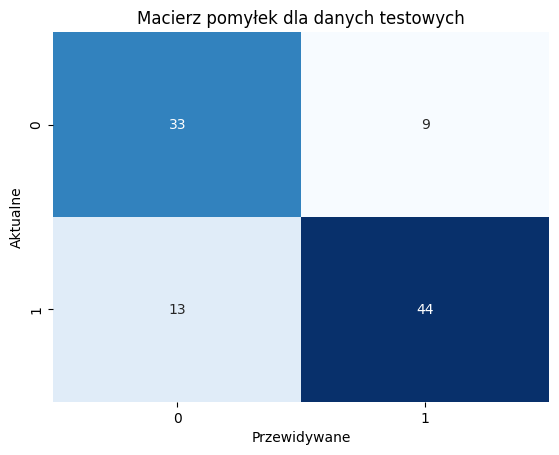

Dla k = 2 dokładność wynosi: 0.7777777777777778


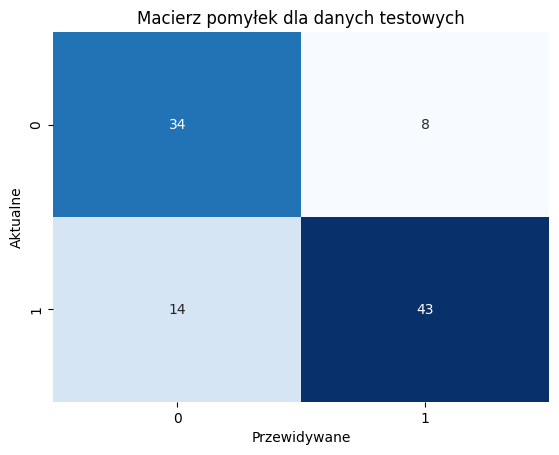

Dla k = 3 dokładność wynosi: 0.7575757575757576


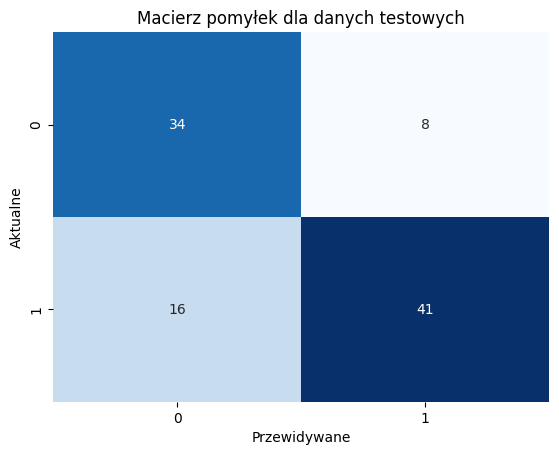

Dla k = 4 dokładność wynosi: 0.7373737373737373


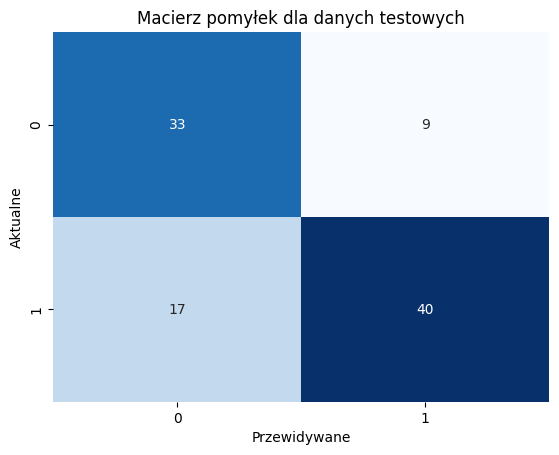

Dla k = 5 dokładność wynosi: 0.7070707070707071


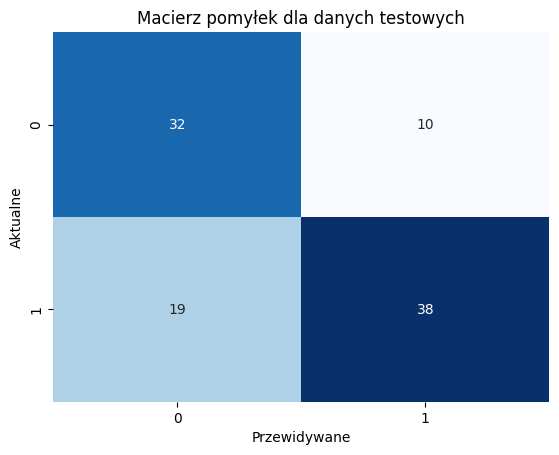

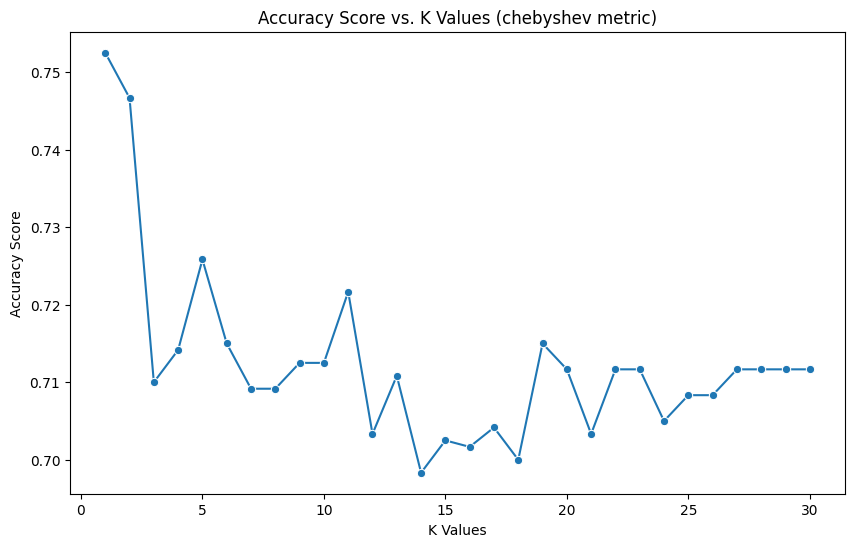

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 0.898989898989899


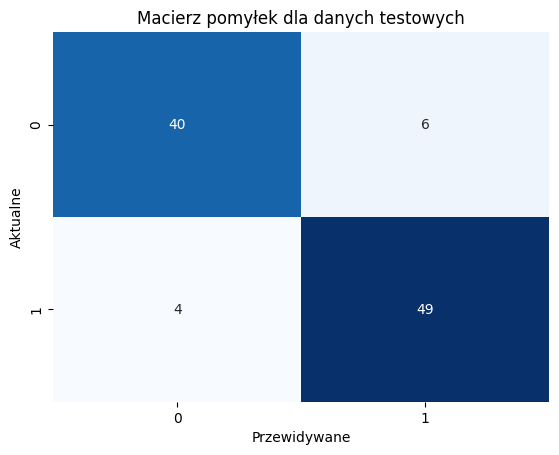

Dla k = 2 dokładność wynosi: 0.898989898989899


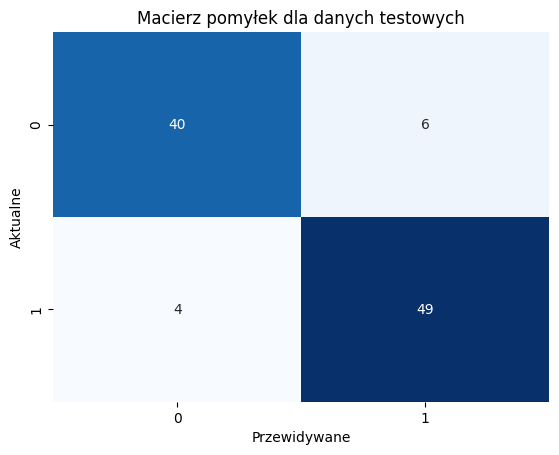

Dla k = 3 dokładność wynosi: 0.8888888888888888


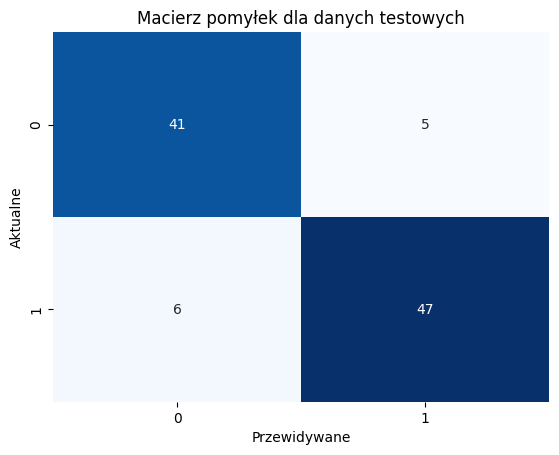

Dla k = 4 dokładność wynosi: 0.9090909090909091


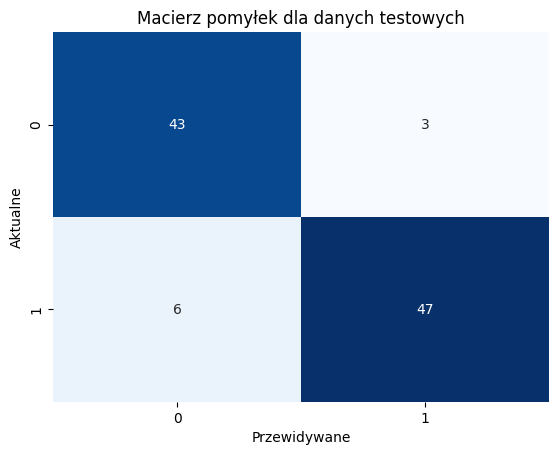

Dla k = 5 dokładność wynosi: 0.8686868686868687


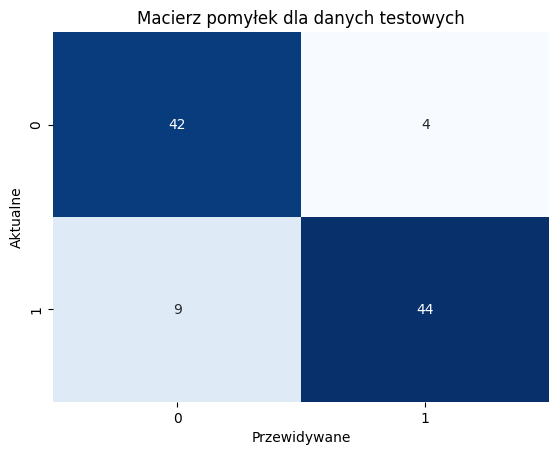

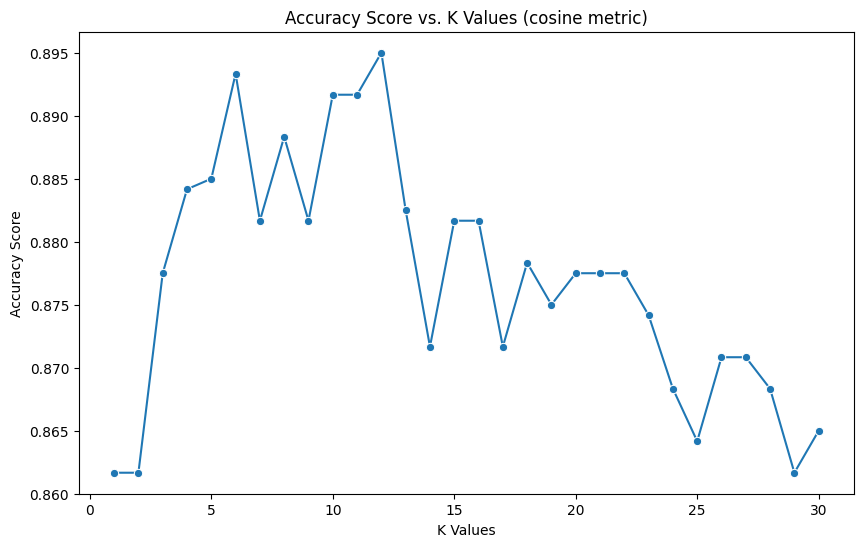

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9595959595959596


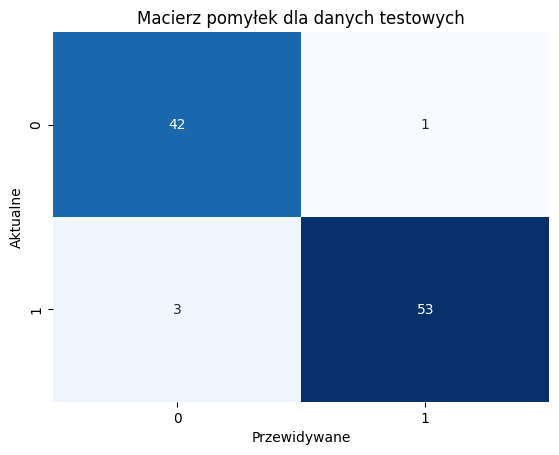

Dla k = 2 dokładność wynosi: 0.9595959595959596


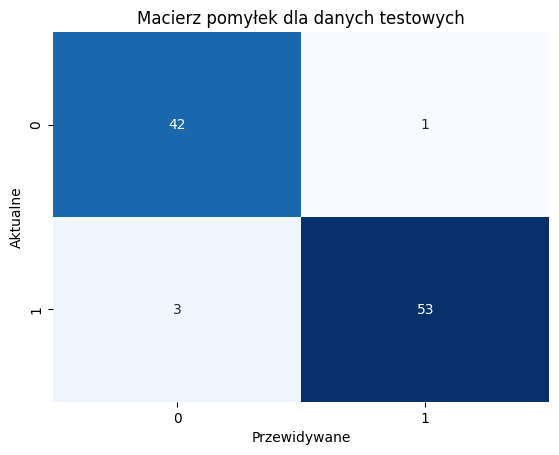

Dla k = 3 dokładność wynosi: 0.9494949494949495


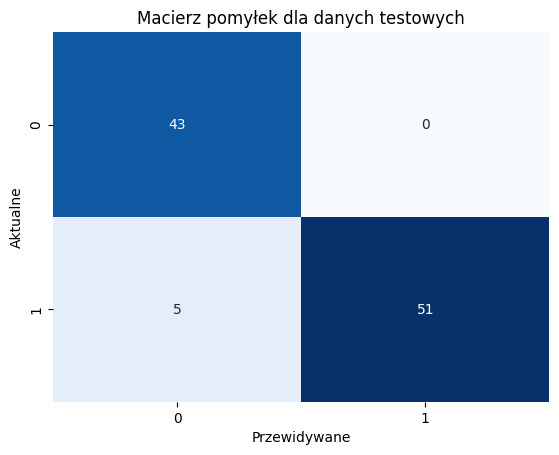

Dla k = 4 dokładność wynosi: 0.9494949494949495


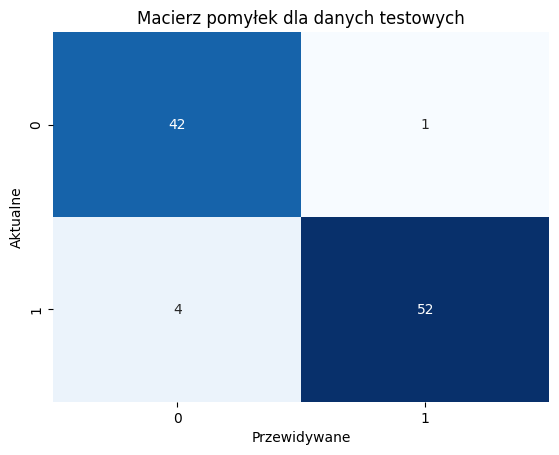

Dla k = 5 dokładność wynosi: 0.9494949494949495


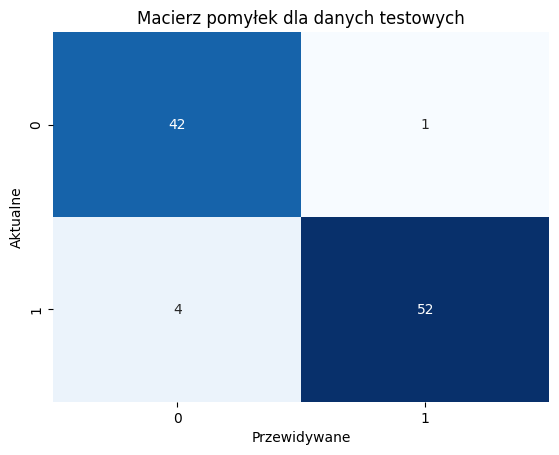

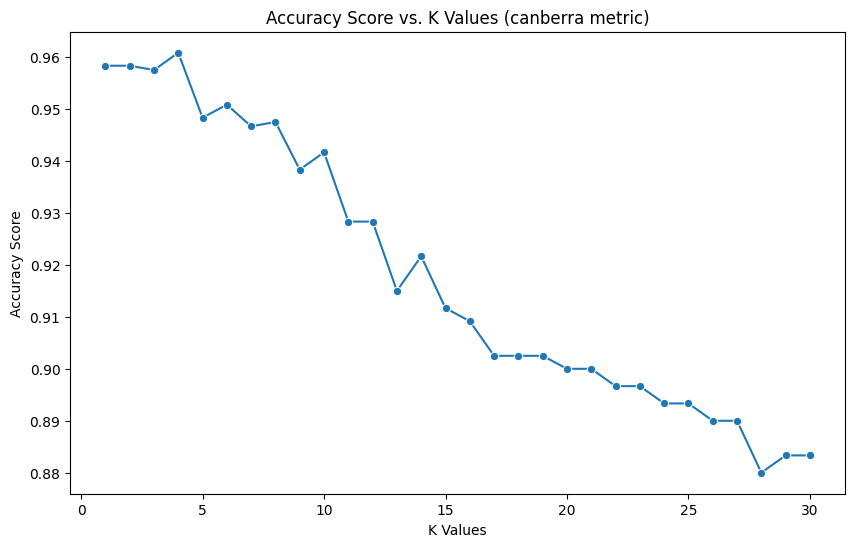

In [36]:
#Tutaj z uwzglednieniem wag: ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of 
#a query point will have a greater influence than neighbors which are further away.
#Dane nieznormalizowane testy dla roznych metryk k jest w zakresie od 1 do 5 
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df, metric="euclidean", cv=True, weight=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df, metric="manhattan", cv=True, weight=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df, metric="chebyshev", cv=True, weight=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df, metric="cosine", cv=True, weight=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df, metric="canberra", cv=True, weight=True)

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.9696969696969697


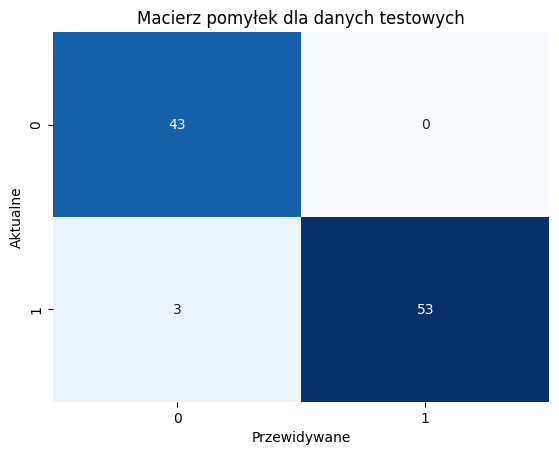

Dla k = 2 dokładność wynosi: 0.9696969696969697


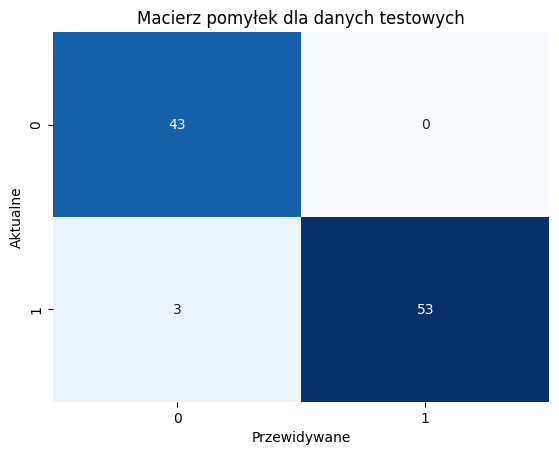

Dla k = 3 dokładność wynosi: 0.9797979797979798


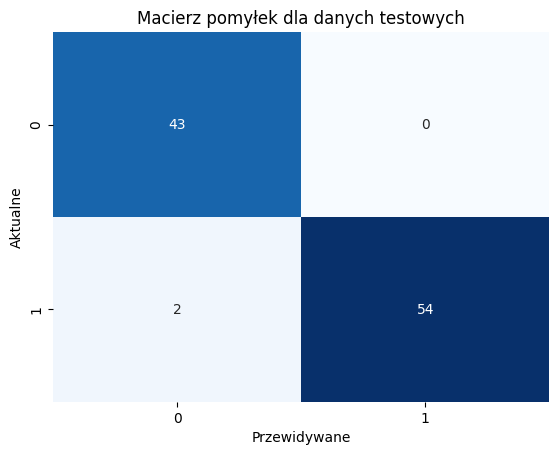

Dla k = 4 dokładność wynosi: 0.9797979797979798


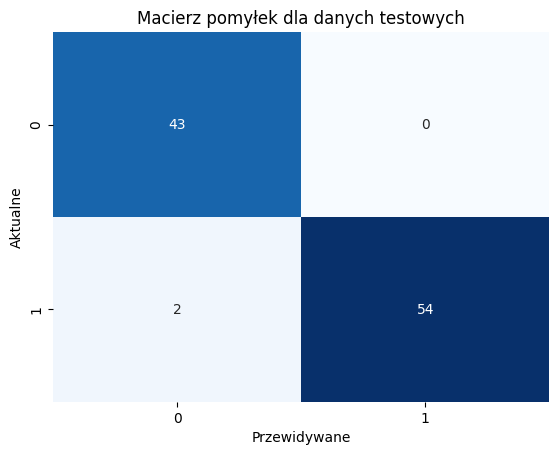

Dla k = 5 dokładność wynosi: 0.9797979797979798


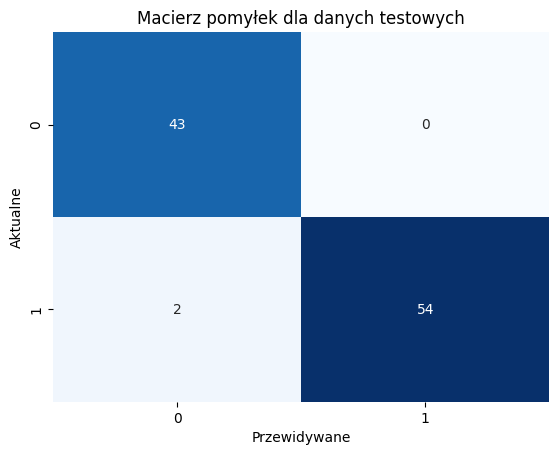

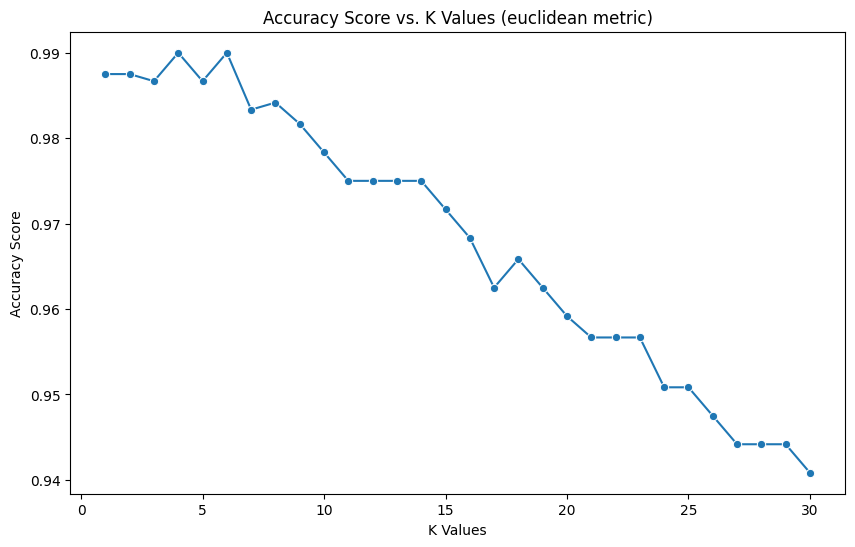

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.9696969696969697


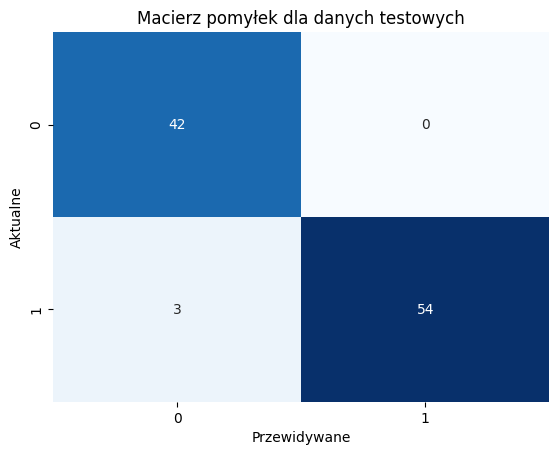

Dla k = 2 dokładność wynosi: 0.9696969696969697


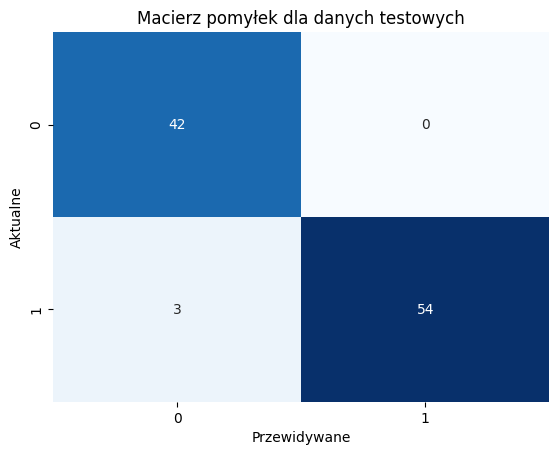

Dla k = 3 dokładność wynosi: 0.9595959595959596


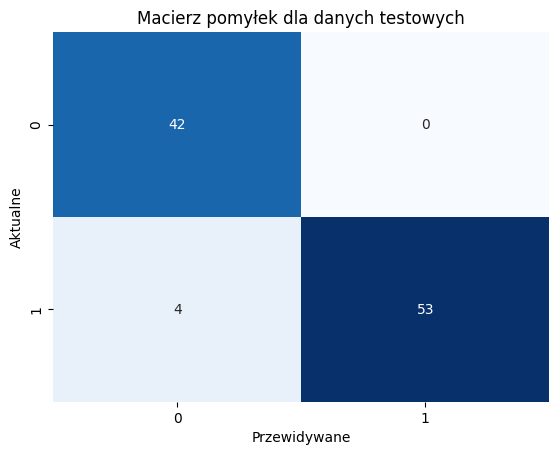

Dla k = 4 dokładność wynosi: 0.9494949494949495


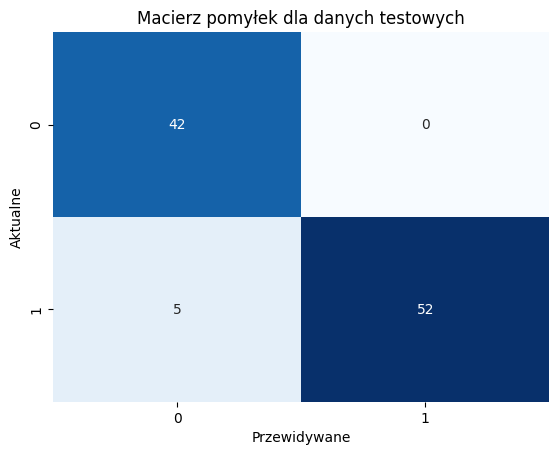

Dla k = 5 dokładność wynosi: 0.9595959595959596


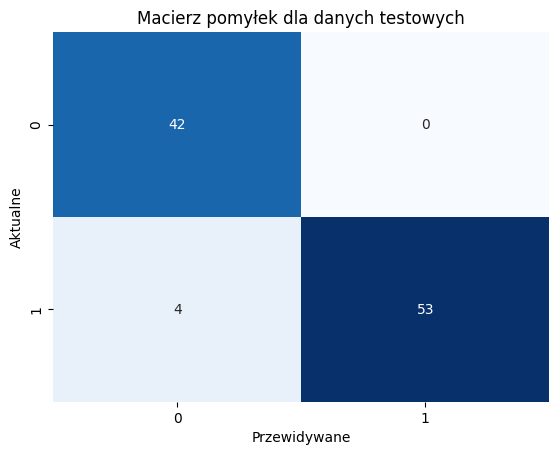

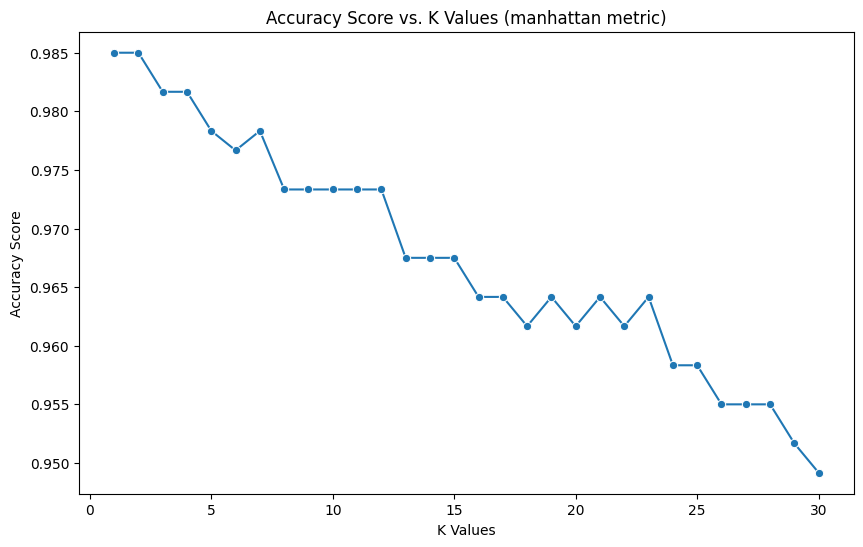

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.7777777777777778


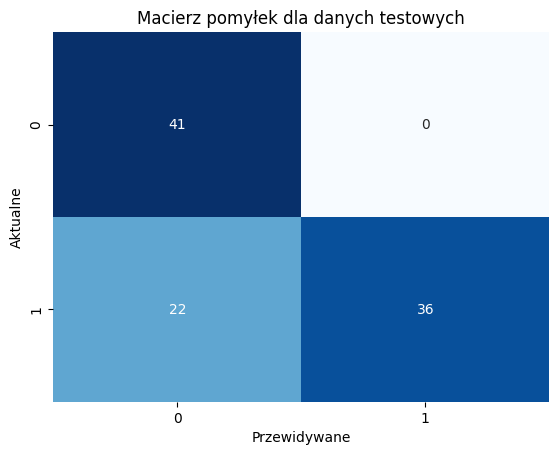

Dla k = 2 dokładność wynosi: 0.7777777777777778


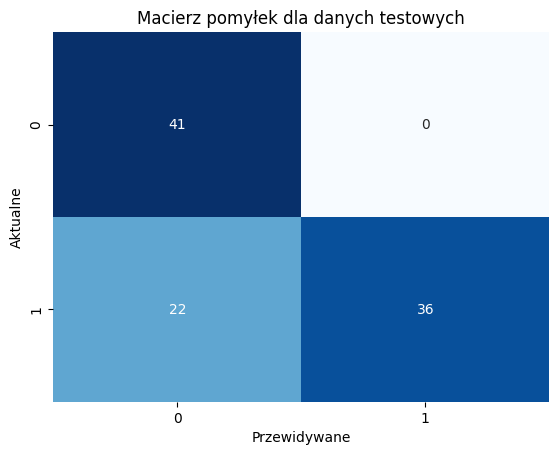

Dla k = 3 dokładność wynosi: 0.696969696969697


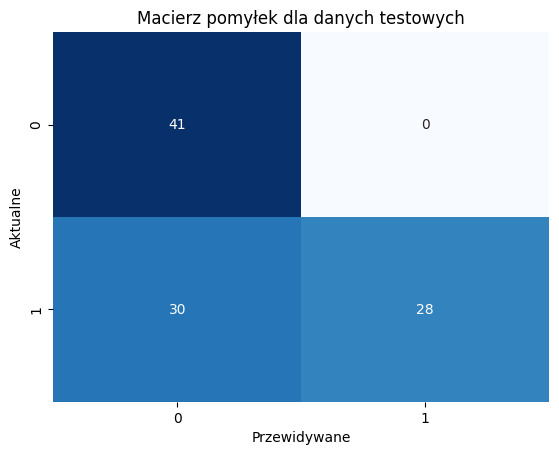

Dla k = 4 dokładność wynosi: 0.7676767676767676


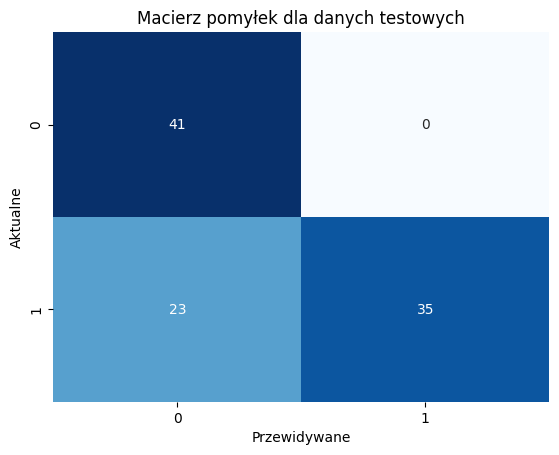

Dla k = 5 dokładność wynosi: 0.9696969696969697


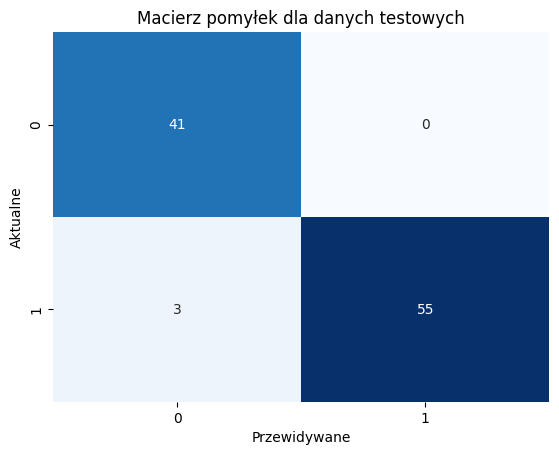

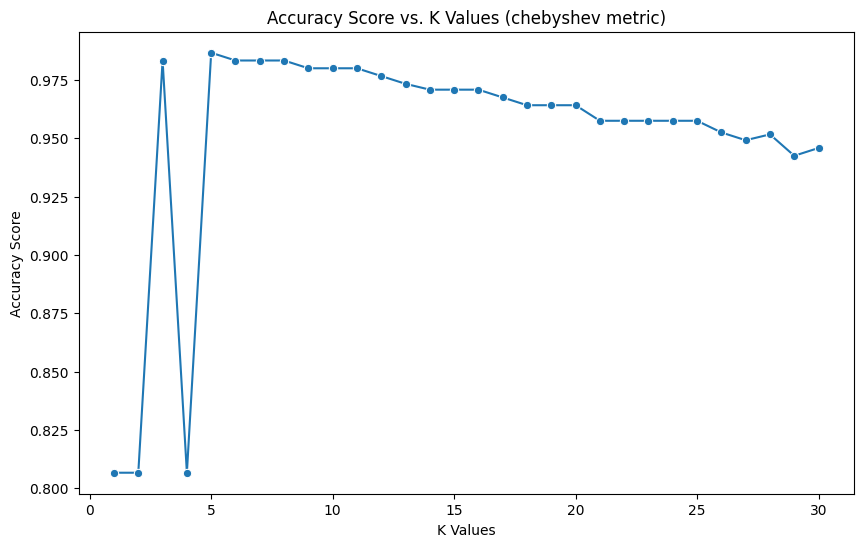

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 0.98989898989899


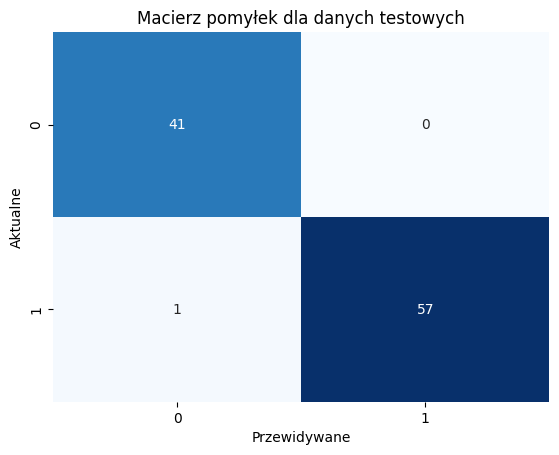

Dla k = 2 dokładność wynosi: 0.98989898989899


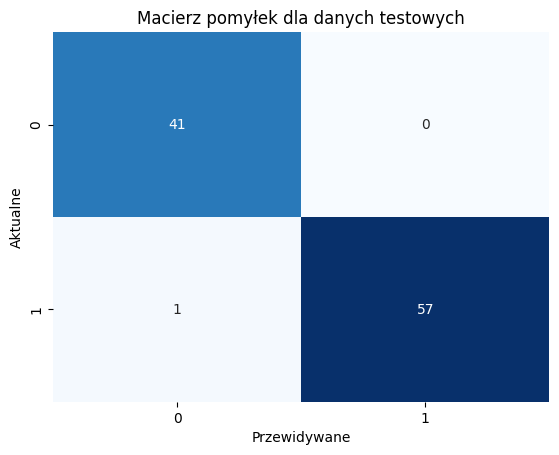

Dla k = 3 dokładność wynosi: 0.98989898989899


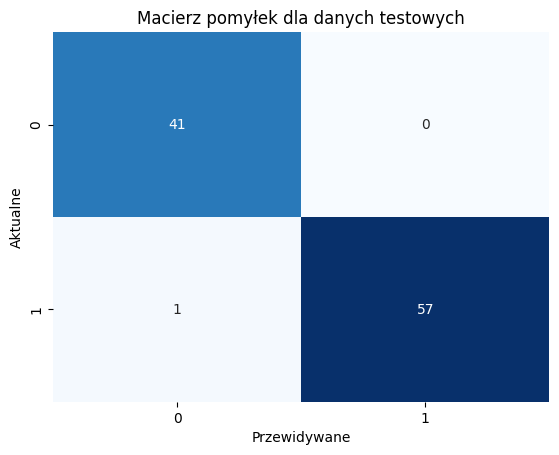

Dla k = 4 dokładność wynosi: 0.9797979797979798


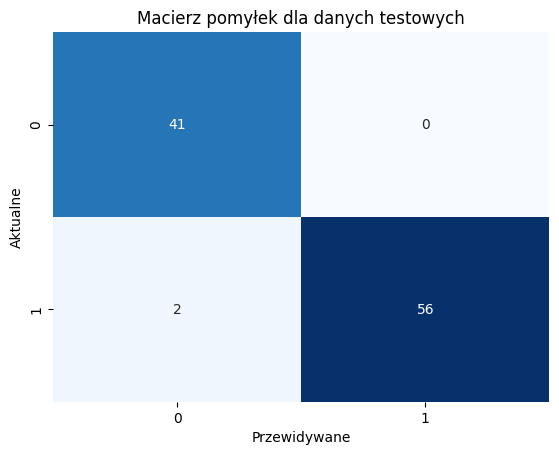

Dla k = 5 dokładność wynosi: 0.9696969696969697


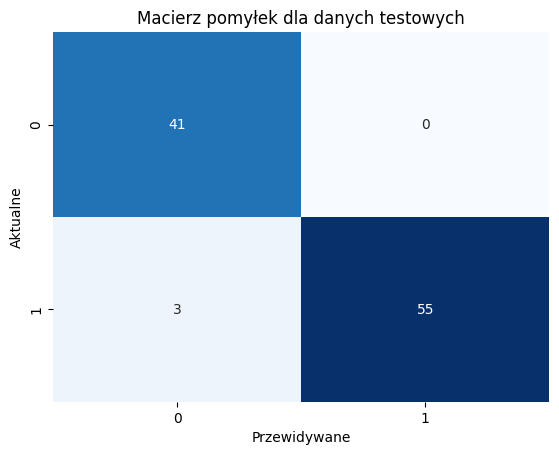

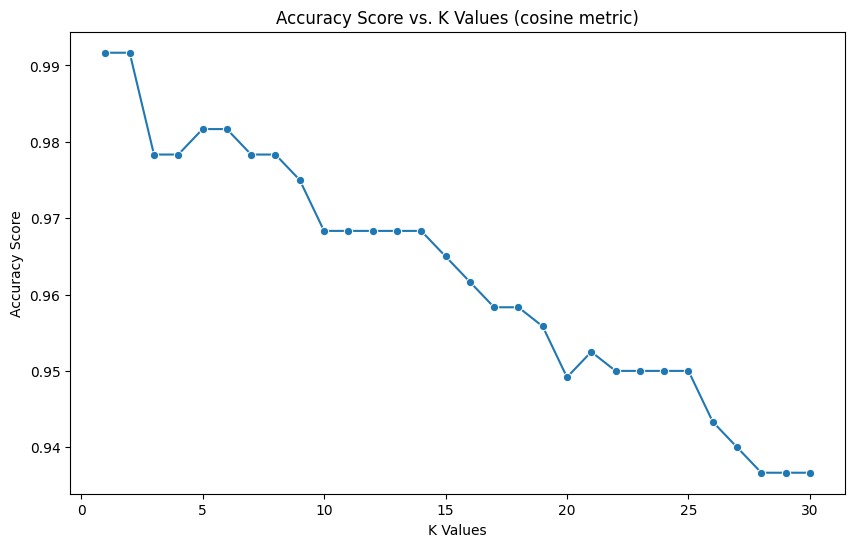

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9696969696969697


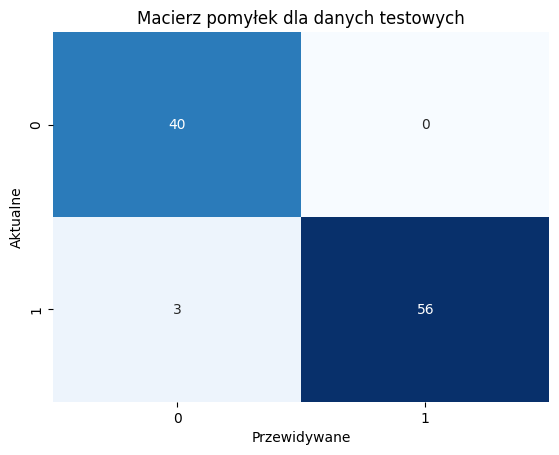

Dla k = 2 dokładność wynosi: 0.9696969696969697


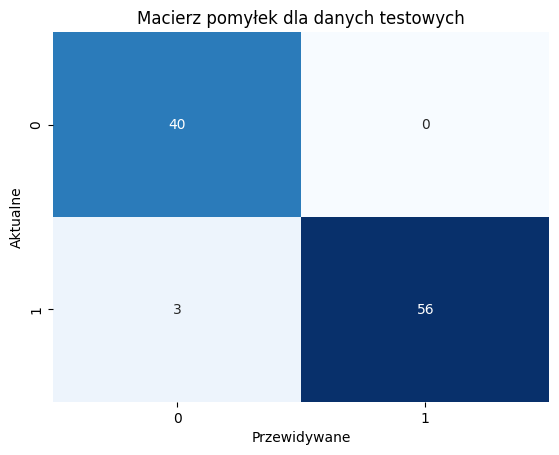

Dla k = 3 dokładność wynosi: 0.9595959595959596


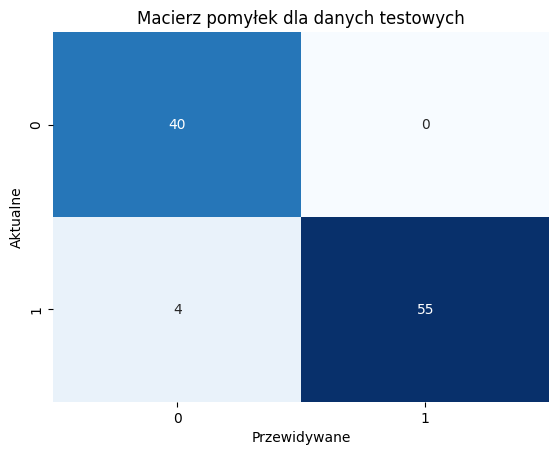

Dla k = 4 dokładność wynosi: 0.9595959595959596


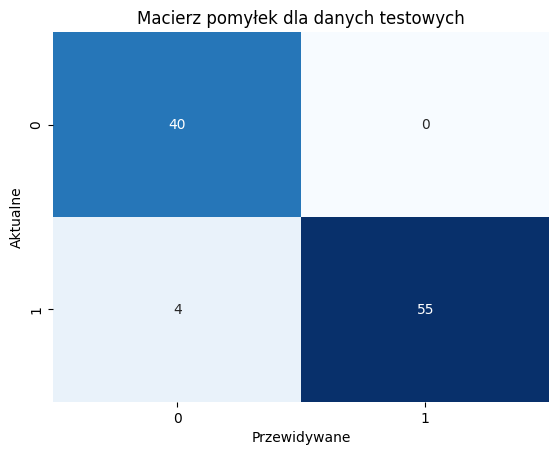

Dla k = 5 dokładność wynosi: 0.9595959595959596


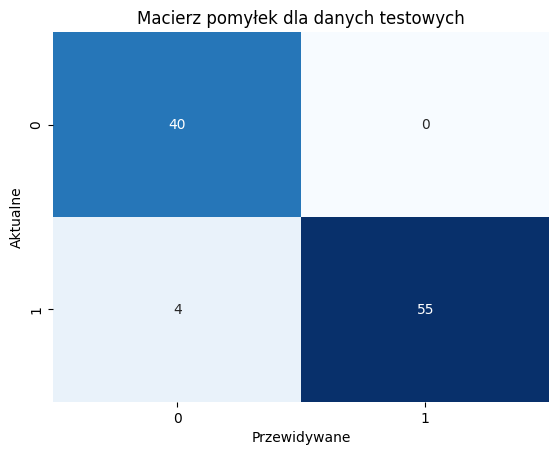

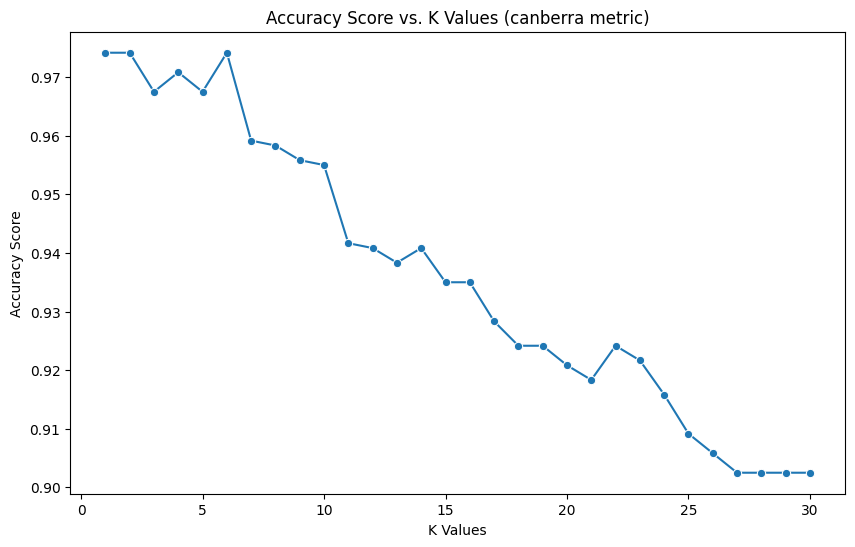

In [38]:
#Wagi cd ale tym razem 
##Dane znormalizowane dla roznych metryk k jest w zakresie od 1 do 5 
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df_norm, metric="euclidean", cv=True, weight=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df_norm, metric="manhattan", cv=True, weight=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df_norm, metric="chebyshev", cv=True, weight=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df_norm, metric="cosine", cv=True, weight=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df_norm, metric="canberra", cv=True, weight=True)

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.9696969696969697


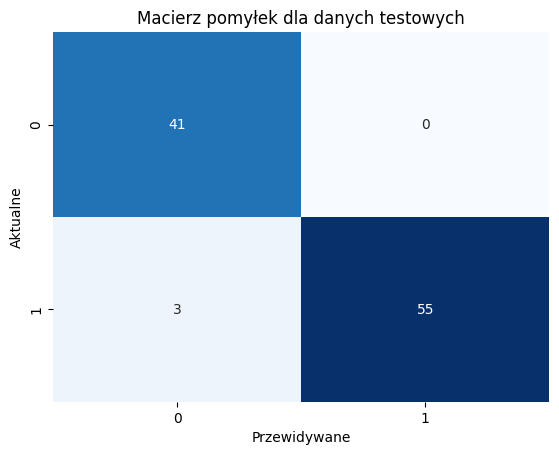

Dla k = 2 dokładność wynosi: 0.9696969696969697


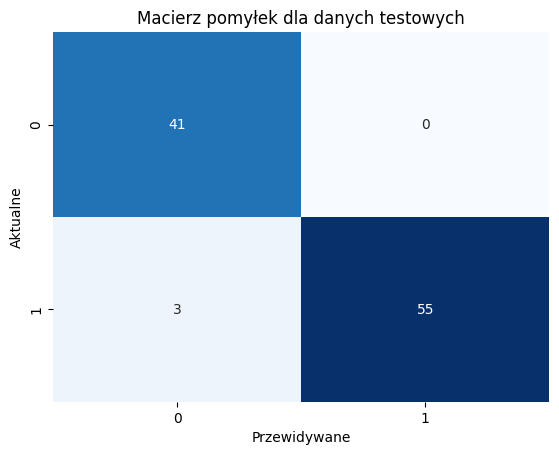

Dla k = 3 dokładność wynosi: 0.9797979797979798


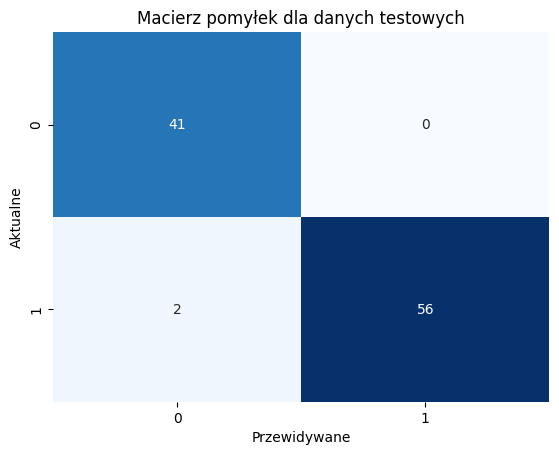

Dla k = 4 dokładność wynosi: 0.9797979797979798


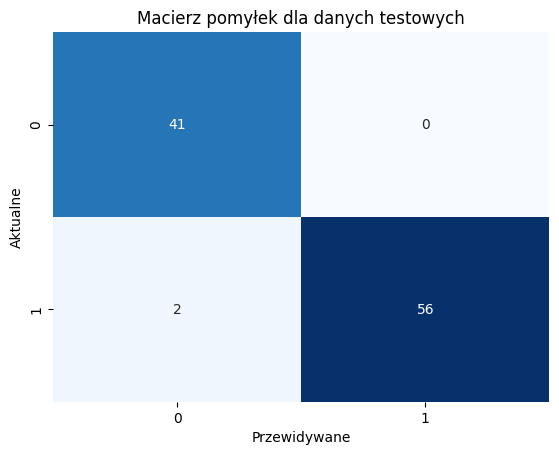

Dla k = 5 dokładność wynosi: 0.9797979797979798


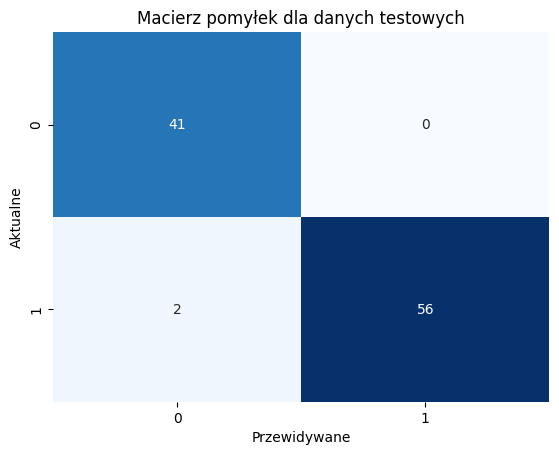

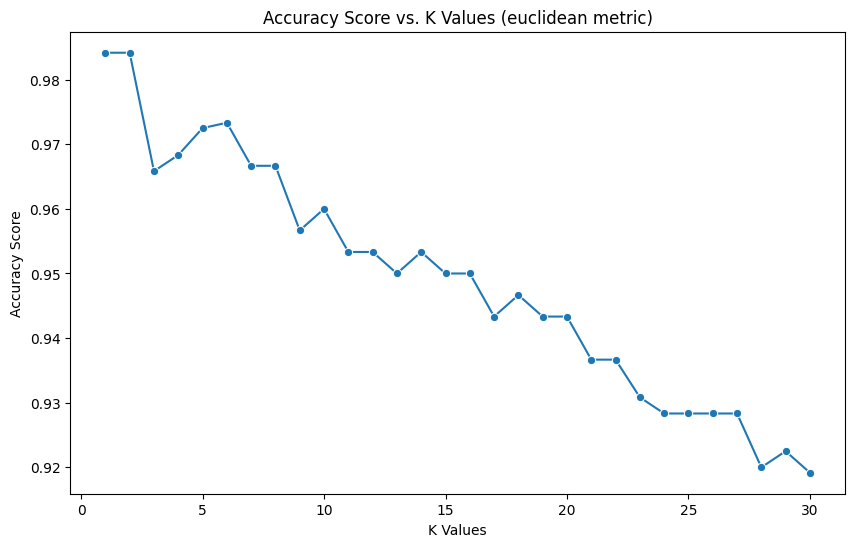

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.9595959595959596


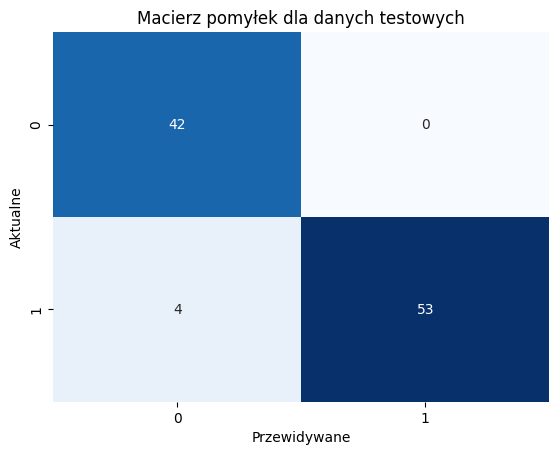

Dla k = 2 dokładność wynosi: 0.9595959595959596


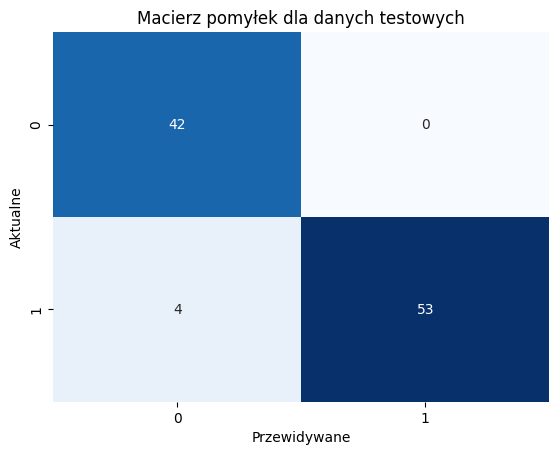

Dla k = 3 dokładność wynosi: 0.9393939393939394


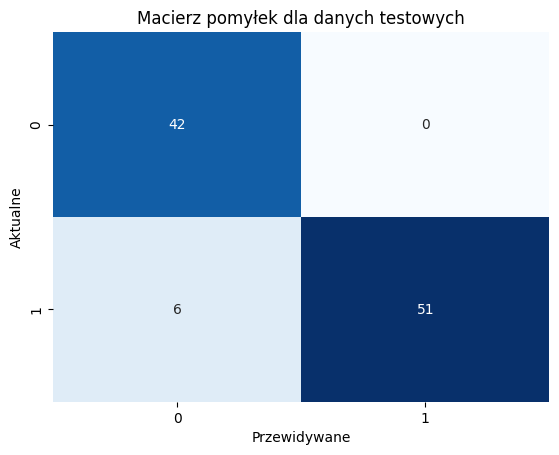

Dla k = 4 dokładność wynosi: 0.9696969696969697


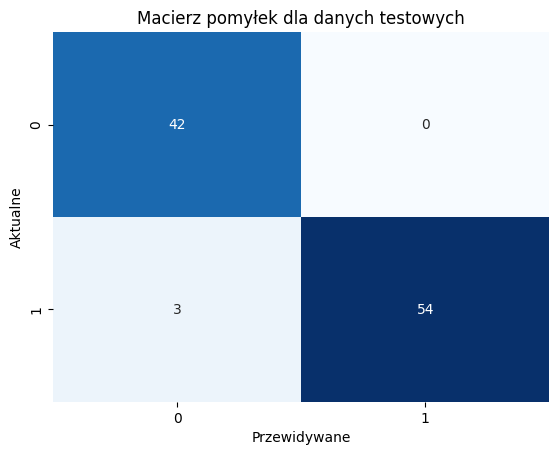

Dla k = 5 dokładność wynosi: 0.9494949494949495


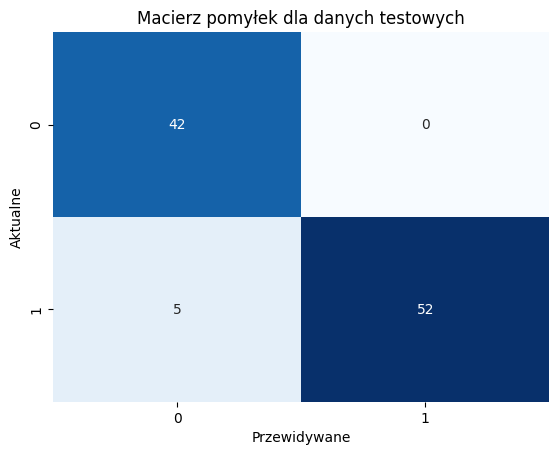

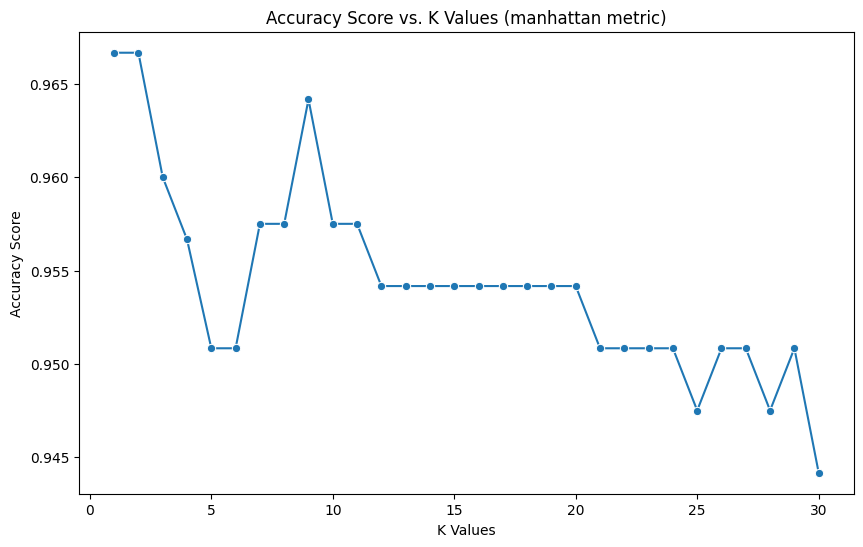

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.9797979797979798


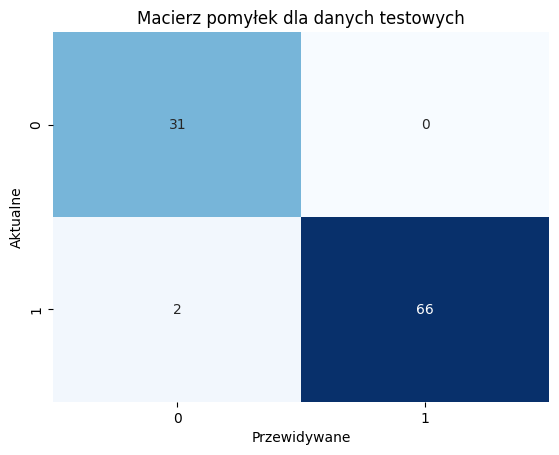

Dla k = 2 dokładność wynosi: 0.9797979797979798


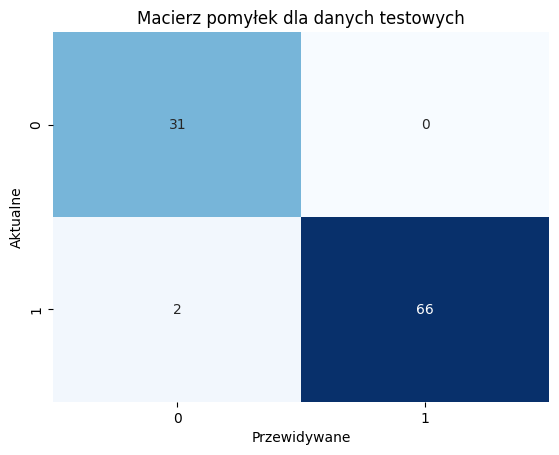

Dla k = 3 dokładność wynosi: 0.9595959595959596


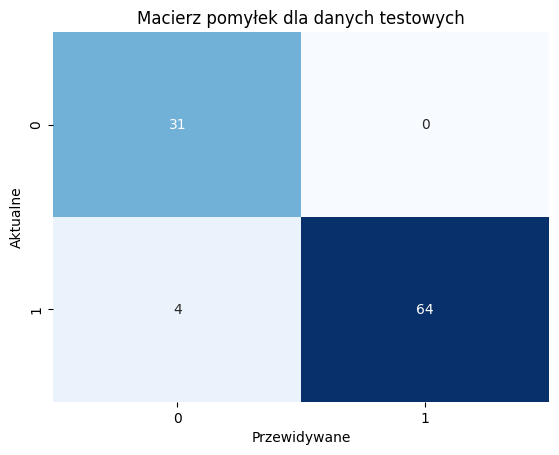

Dla k = 4 dokładność wynosi: 0.9595959595959596


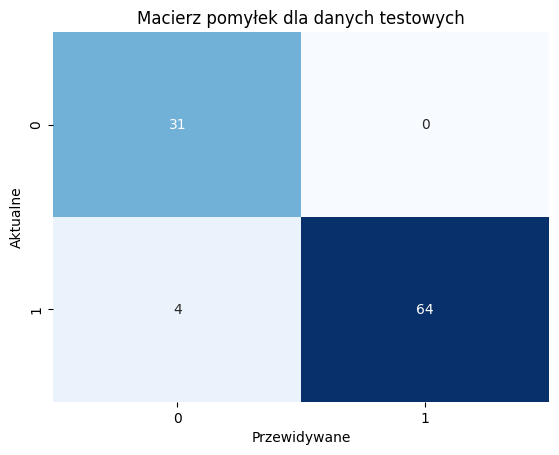

Dla k = 5 dokładność wynosi: 0.9595959595959596


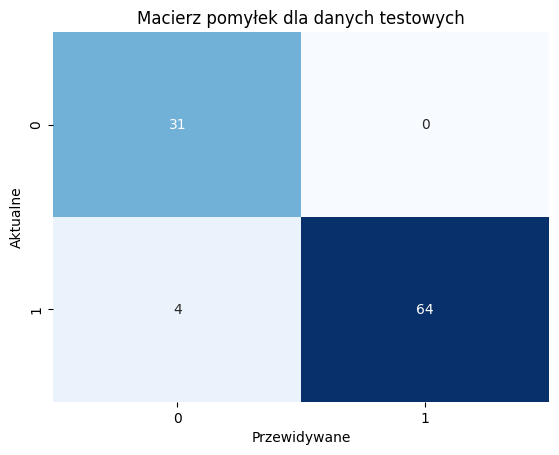

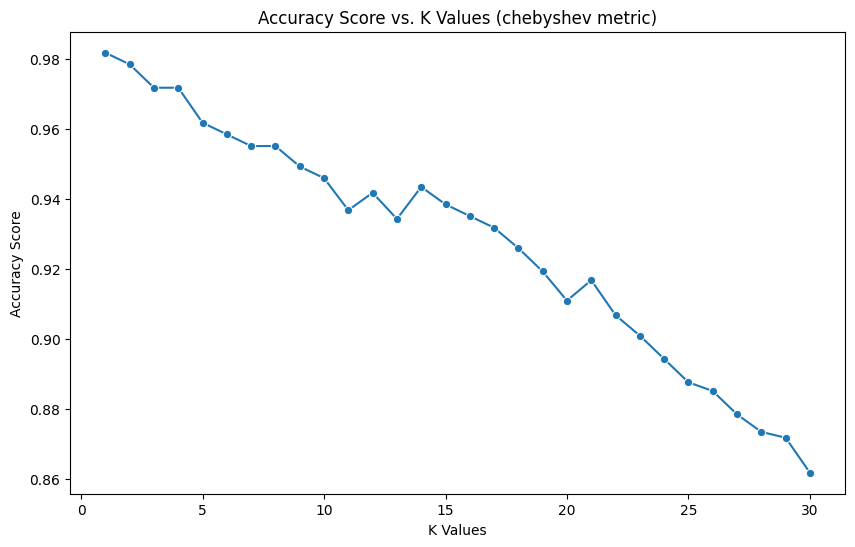

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 1.0


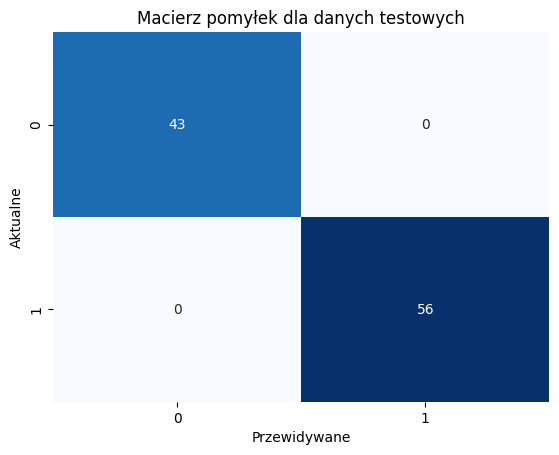

Dla k = 2 dokładność wynosi: 1.0


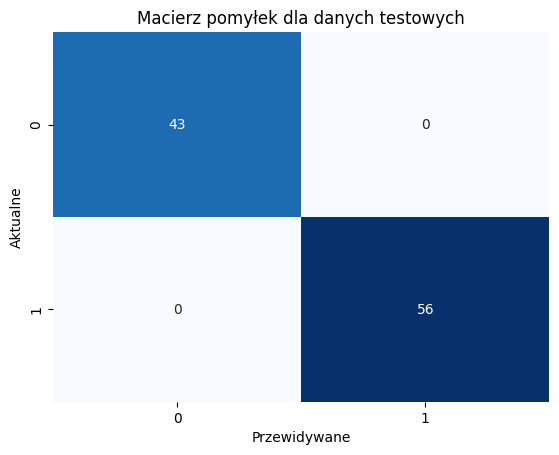

Dla k = 3 dokładność wynosi: 1.0


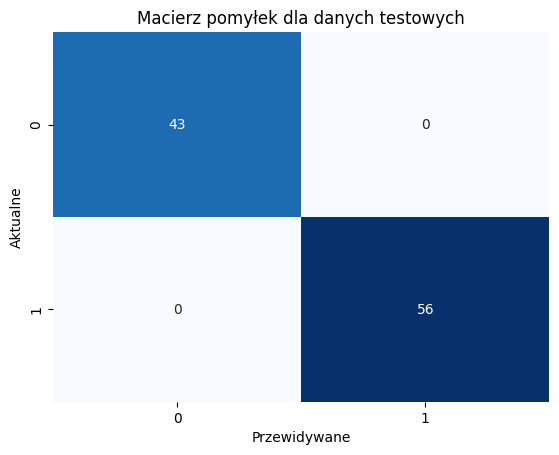

Dla k = 4 dokładność wynosi: 1.0


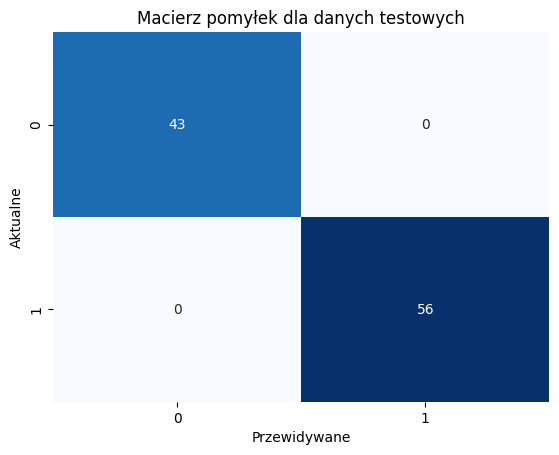

Dla k = 5 dokładność wynosi: 1.0


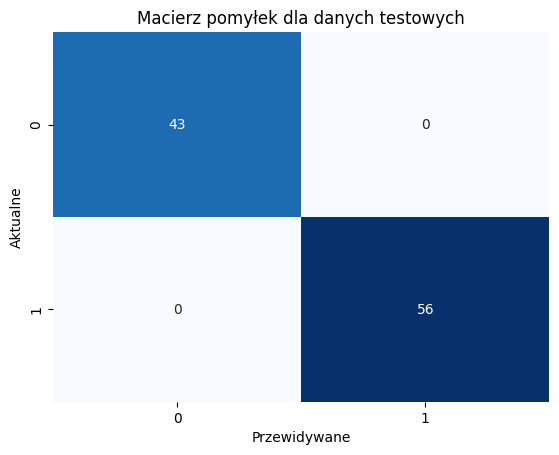

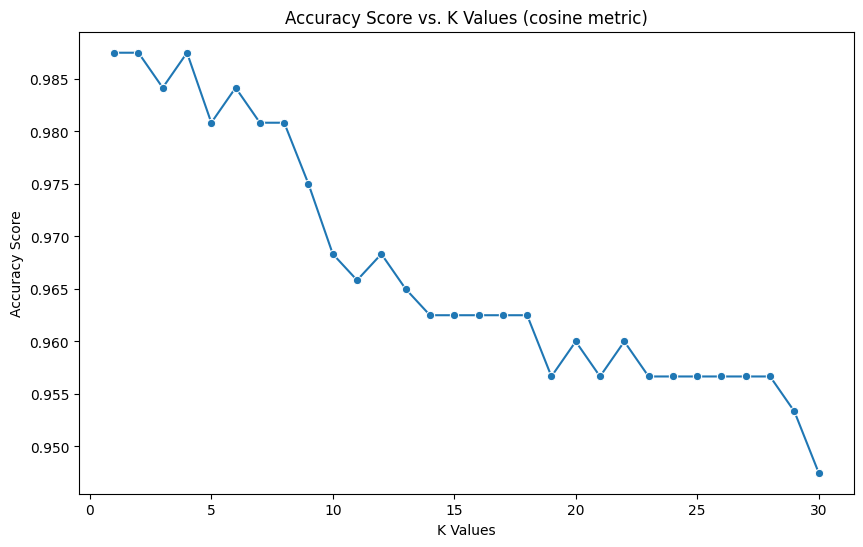

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.9494949494949495


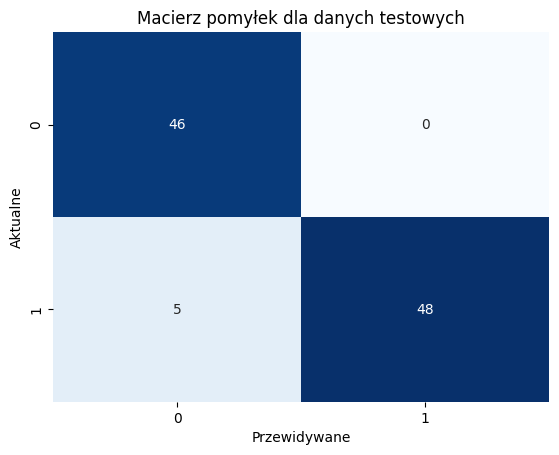

Dla k = 2 dokładność wynosi: 0.9494949494949495


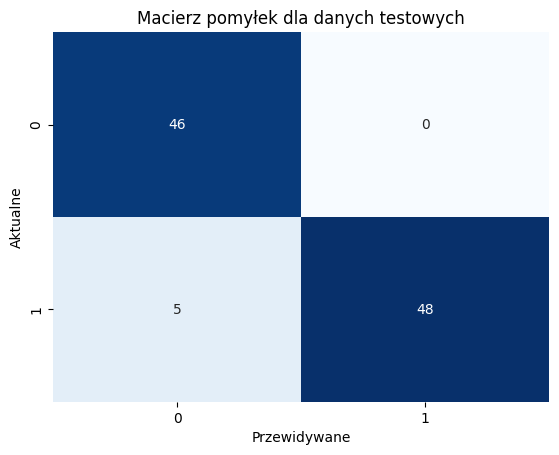

Dla k = 3 dokładność wynosi: 0.9494949494949495


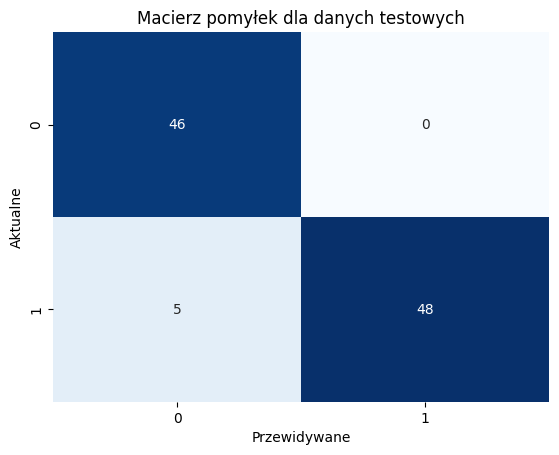

Dla k = 4 dokładność wynosi: 0.9494949494949495


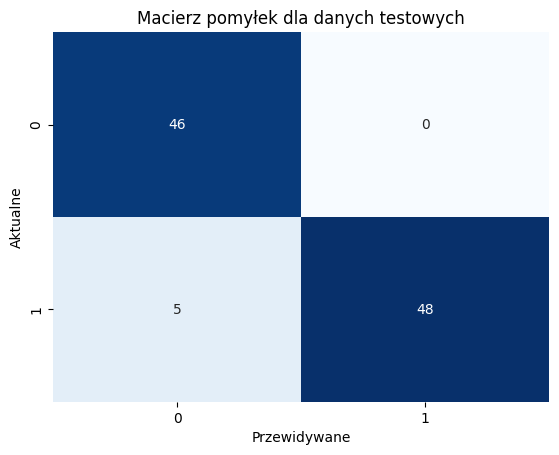

Dla k = 5 dokładność wynosi: 0.9494949494949495


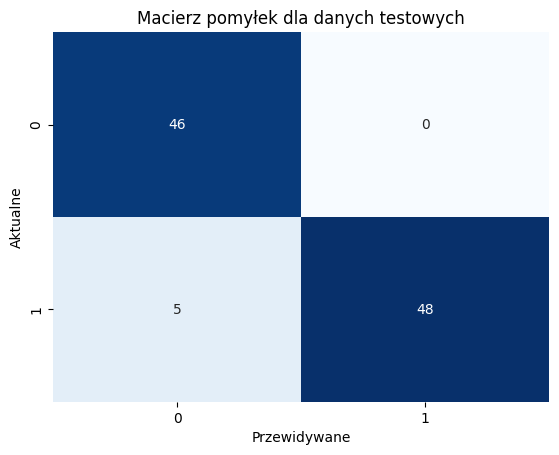

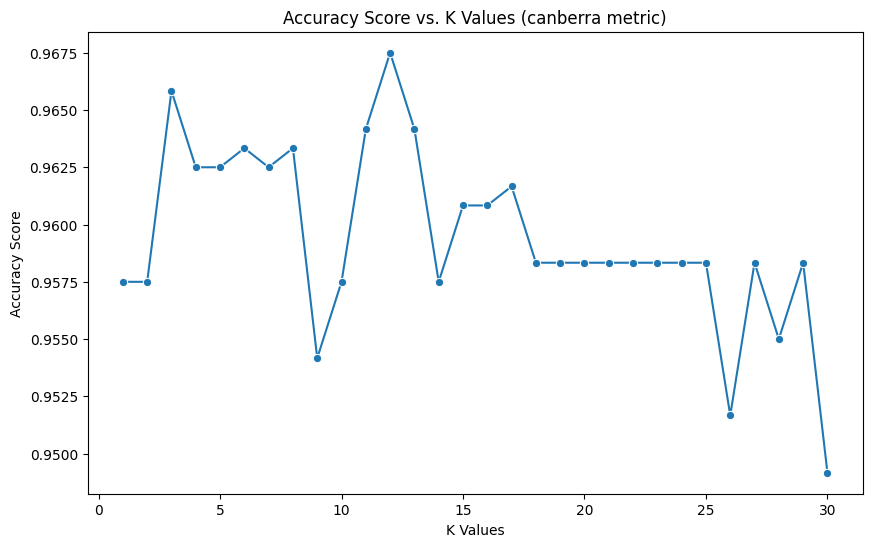

In [39]:
#I wagi dla danych ustandaryzowanych
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df_stand, metric="euclidean", cv=True, weight=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df_stand, metric="manhattan", cv=True, weight=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df_stand, metric="chebyshev", cv=True, weight=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df_stand, metric="cosine", cv=True, weight=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df_stand, metric="canberra", cv=True, weight=True)

In [47]:
#Dokumentacja KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Tutaj wzory są opisane te które uzywam w KNN https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [48]:
#Jakies testy PCA source: https://ichi.pro/pl/analiza-glownych-komponentow-pca-ze-scikit-learn-33554981925296
from sklearn.decomposition import PCA
df_copy = df.copy()
DataProc.Shuffle(df_copy)
y = df_copy.pop('classification')
X = df_copy
pca_23 = PCA(n_components=23, random_state=2020)
pca_23.fit(X)
X_pca_23 = pca_23.transform(X)
np.cumsum(pca_23.explained_variance_ratio_ * 100)

array([ 99.88150732,  99.96050074,  99.99244059,  99.99628509,
        99.99862416,  99.99941106,  99.99977438,  99.9998806 ,
        99.99994066,  99.99996381,  99.9999774 ,  99.99998455,
        99.999989  ,  99.99999127,  99.99999319,  99.99999472,
        99.99999597,  99.99999714,  99.99999798,  99.99999872,
        99.99999941, 100.        , 100.        ])

Text(0, 0.5, 'Explained variance')

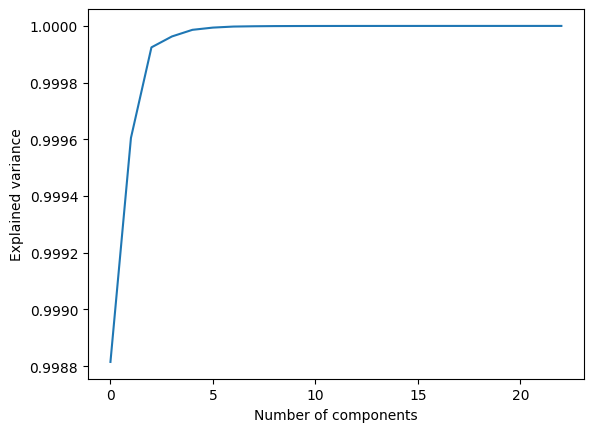

In [49]:
plt.plot(np.cumsum(pca_23.explained_variance_ratio_ ))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [69]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(X)
#X_pca_3 = pca_3.transform(X)
df_new_PCA3 = pd.DataFrame(pca_3.transform(X), columns=['PCA1','PCA2','PCA3'], index=X.index) #To ostatnei do zachowania indexów
df_new_PCA3

PCA1       PCA2       PCA3
0    8297.758769 -82.303366  18.285720
1       4.458002  86.809688 -12.856138
2   -2402.033155  -1.287071 -38.772927
3       4.138395  -0.835207   3.479262
4   -3702.026328  -5.925122 -16.463682
..           ...        ...        ...
395  2297.818663 -64.598817  -4.770433
396  -602.109873 -39.864828 -10.574719
397 -1102.137068 -42.073587 -19.088580
398  -702.181757 -52.118306  -0.137910
399 -1102.047052 -16.636583 -13.745265

[329 rows x 3 columns]

In [70]:
df_new_PCA3['classification'] = y

In [71]:
df_new_PCA3

PCA1       PCA2       PCA3  classification
0    8297.758769 -82.303366  18.285720               1
1       4.458002  86.809688 -12.856138               1
2   -2402.033155  -1.287071 -38.772927               1
3       4.138395  -0.835207   3.479262               1
4   -3702.026328  -5.925122 -16.463682               0
..           ...        ...        ...             ...
395  2297.818663 -64.598817  -4.770433               1
396  -602.109873 -39.864828 -10.574719               1
397 -1102.137068 -42.073587 -19.088580               1
398  -702.181757 -52.118306  -0.137910               0
399 -1102.047052 -16.636583 -13.745265               0

[329 rows x 4 columns]

Dla metryki: euclidean
Dla k = 1 dokładność wynosi: 0.696969696969697


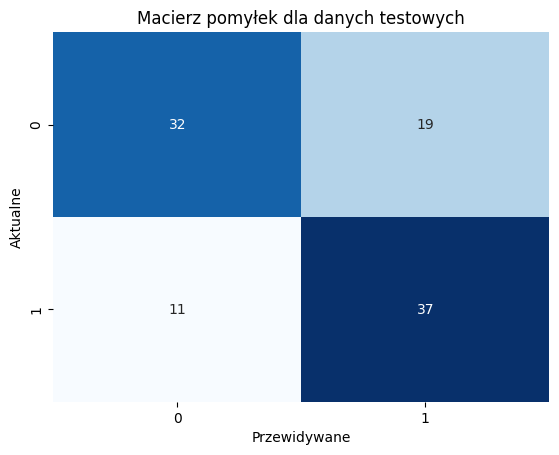

Dla k = 2 dokładność wynosi: 0.7474747474747475


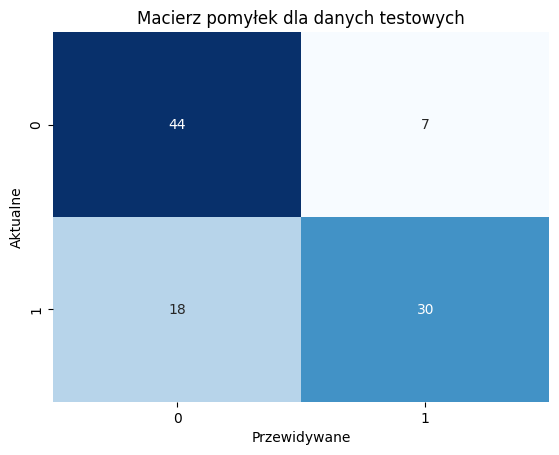

Dla k = 3 dokładność wynosi: 0.7676767676767676


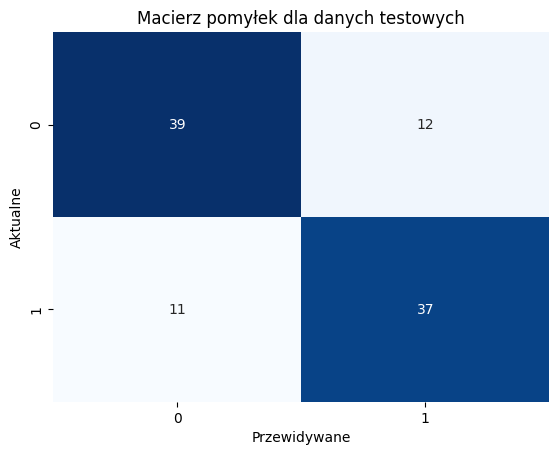

Dla k = 4 dokładność wynosi: 0.7171717171717171


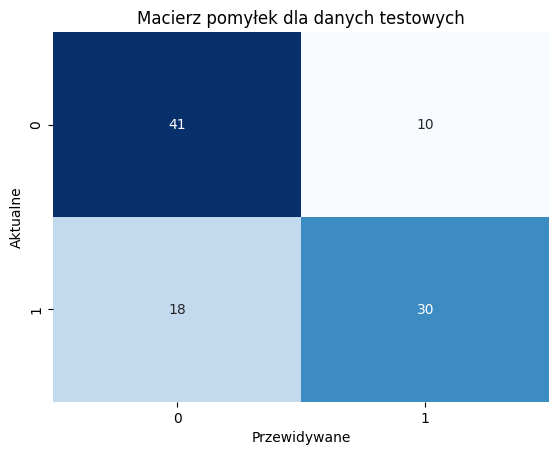

Dla k = 5 dokładność wynosi: 0.6666666666666666


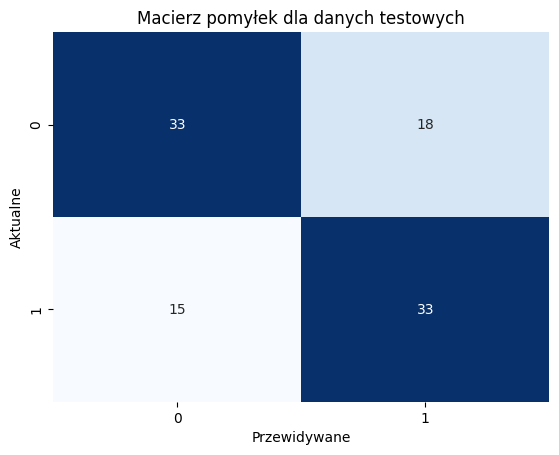

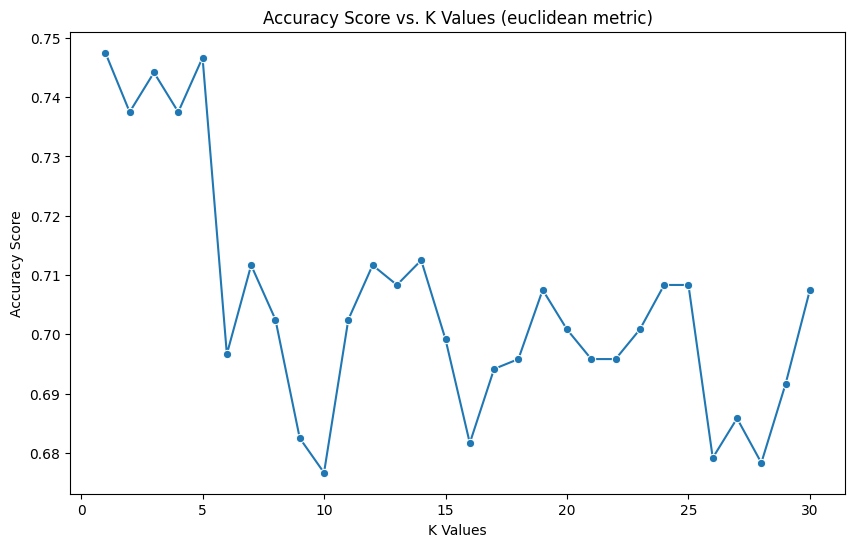

Dla metryki: manhattan
Dla k = 1 dokładność wynosi: 0.7575757575757576


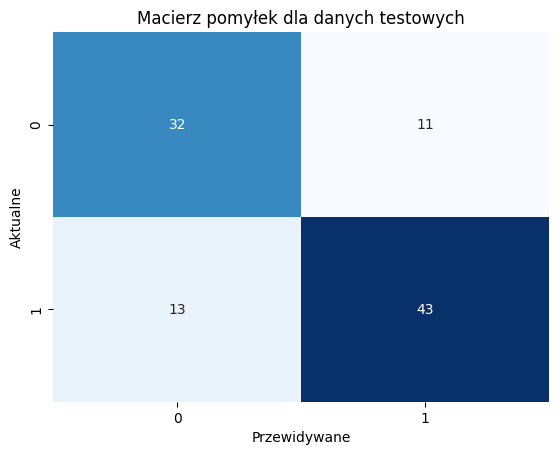

Dla k = 2 dokładność wynosi: 0.7676767676767676


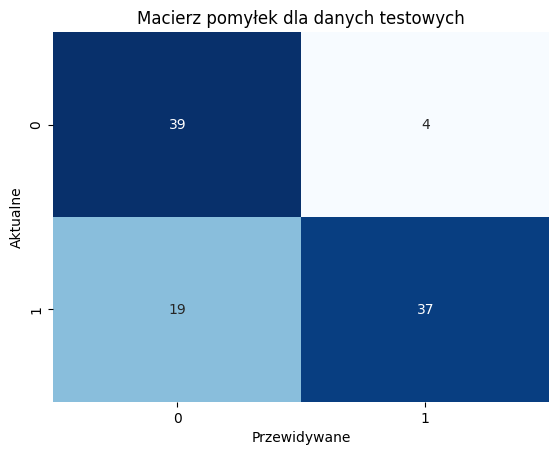

Dla k = 3 dokładność wynosi: 0.7474747474747475


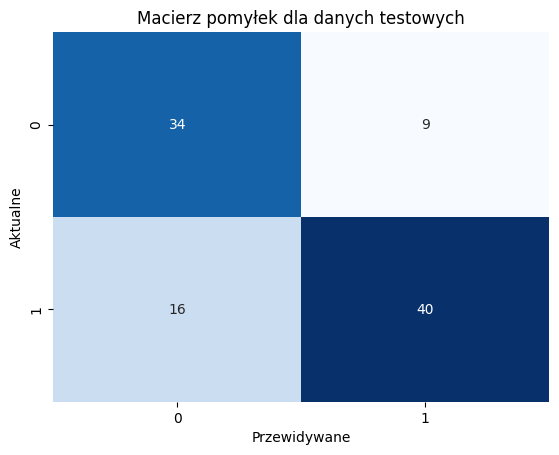

Dla k = 4 dokładność wynosi: 0.7575757575757576


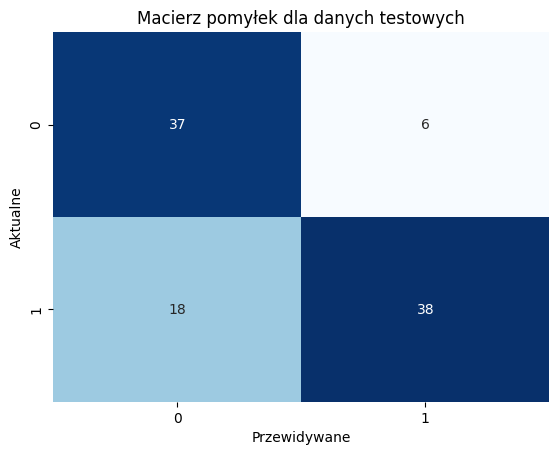

Dla k = 5 dokładność wynosi: 0.7070707070707071


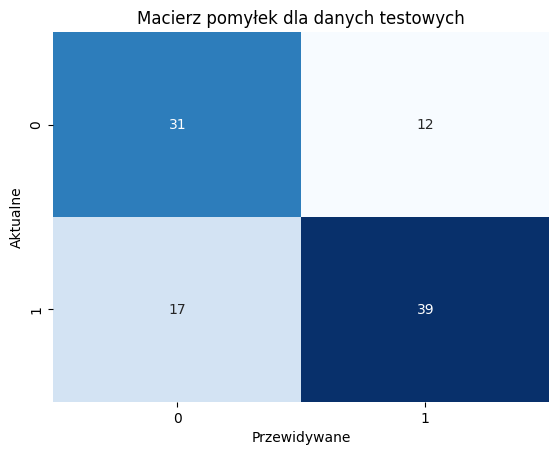

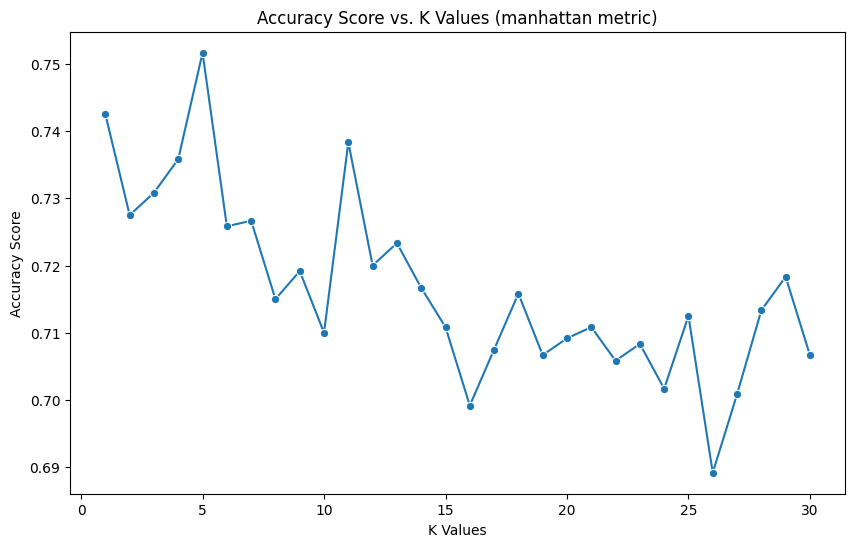

Dla metryki: chebyshev
Dla k = 1 dokładność wynosi: 0.6666666666666666


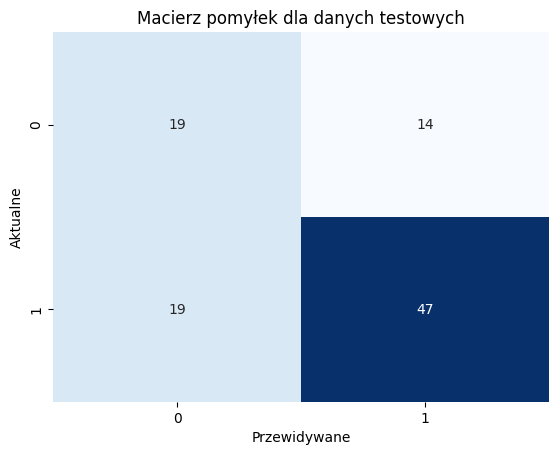

Dla k = 2 dokładność wynosi: 0.6464646464646465


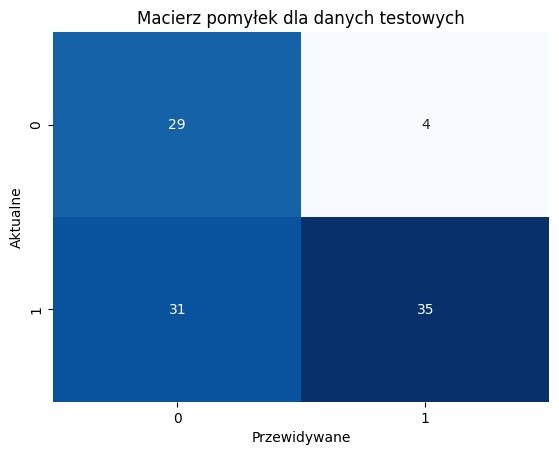

Dla k = 3 dokładność wynosi: 0.6161616161616161


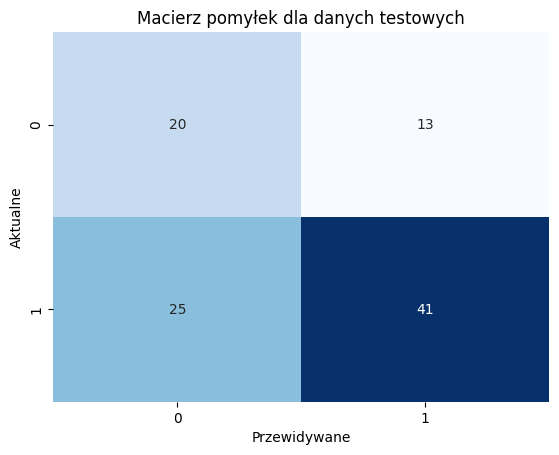

Dla k = 4 dokładność wynosi: 0.5959595959595959


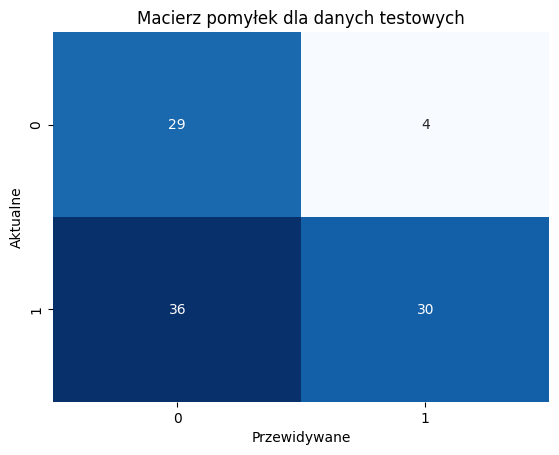

Dla k = 5 dokładność wynosi: 0.6464646464646465


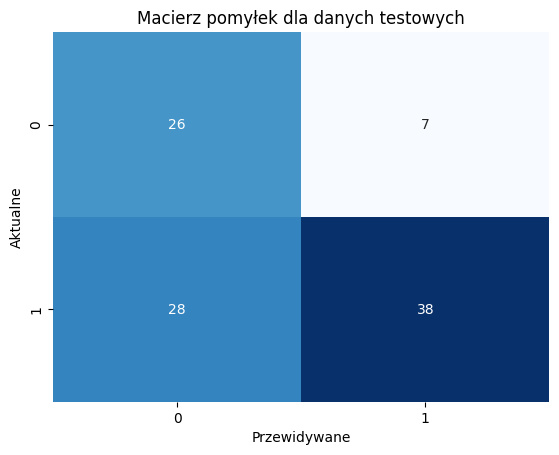

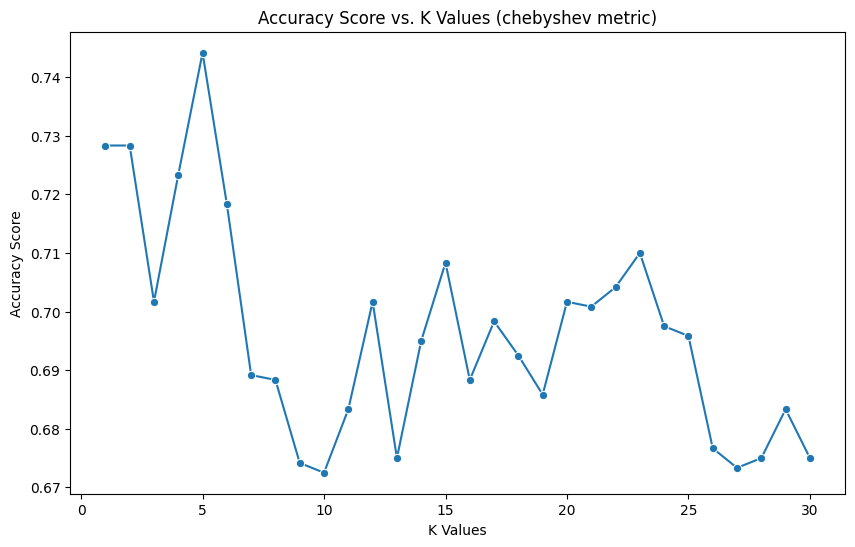

Dla metryki: cosine
Dla k = 1 dokładność wynosi: 0.8383838383838383


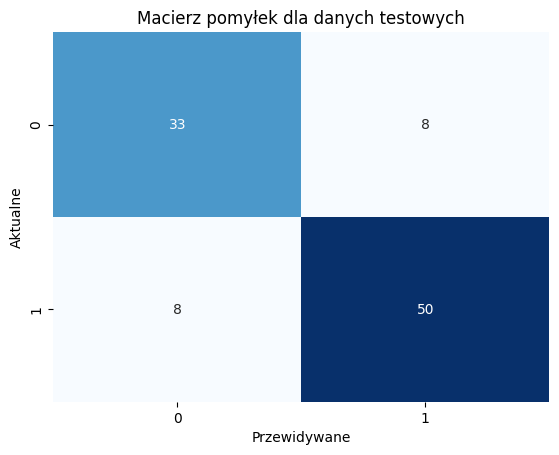

Dla k = 2 dokładność wynosi: 0.8383838383838383


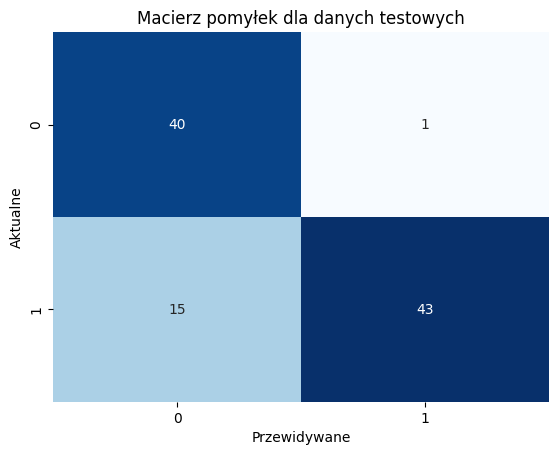

Dla k = 3 dokładność wynosi: 0.8484848484848485


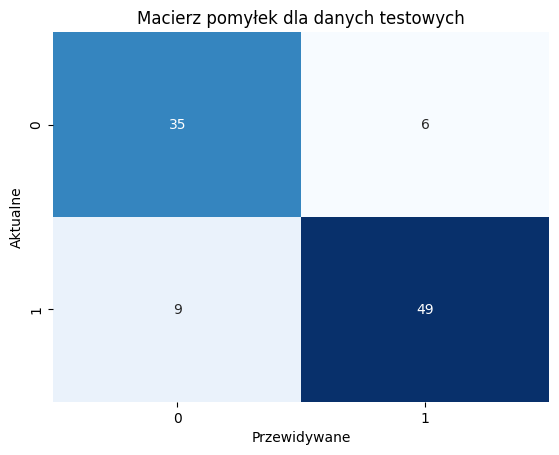

Dla k = 4 dokładność wynosi: 0.8484848484848485


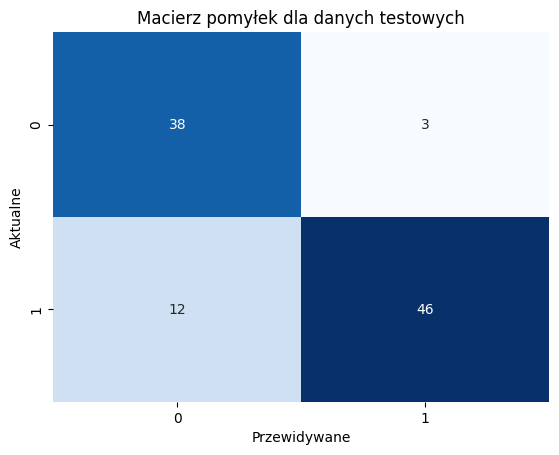

Dla k = 5 dokładność wynosi: 0.8585858585858586


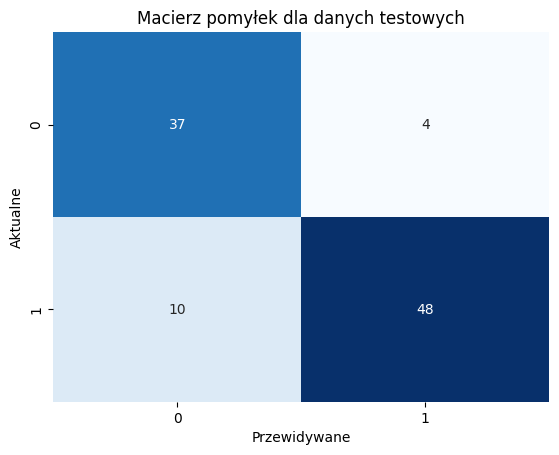

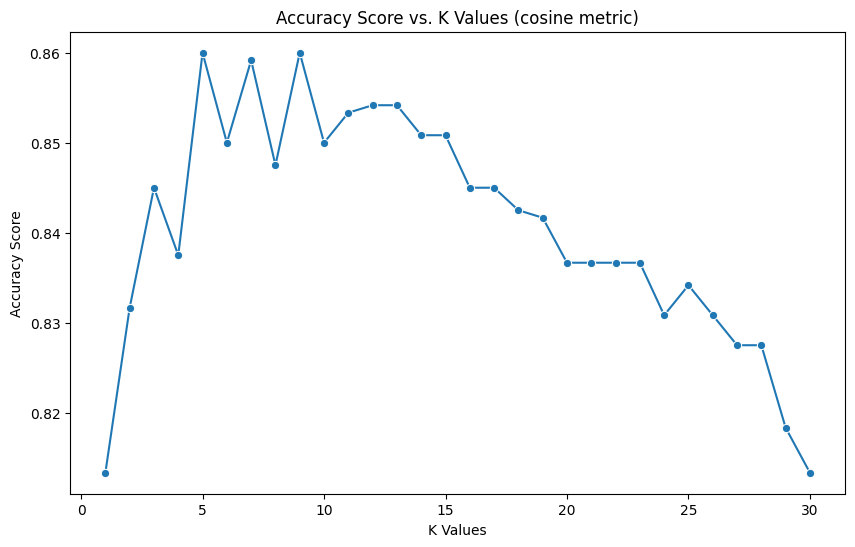

Dla metryki: canberra
Dla k = 1 dokładność wynosi: 0.7777777777777778


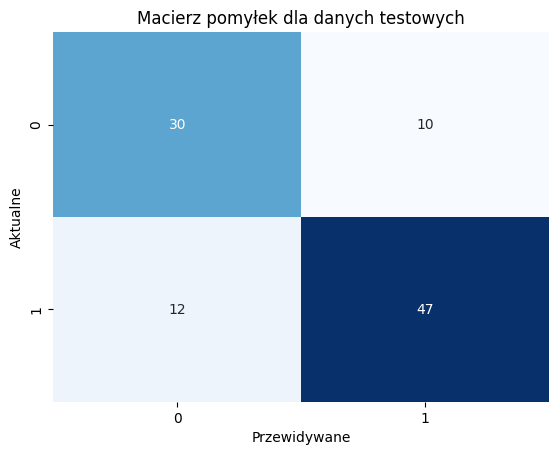

Dla k = 2 dokładność wynosi: 0.8080808080808081


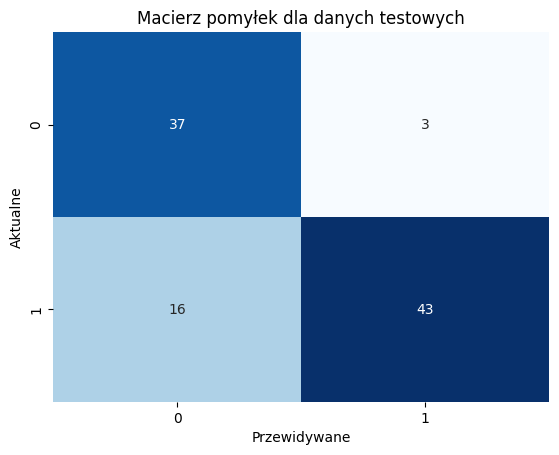

Dla k = 3 dokładność wynosi: 0.8282828282828283


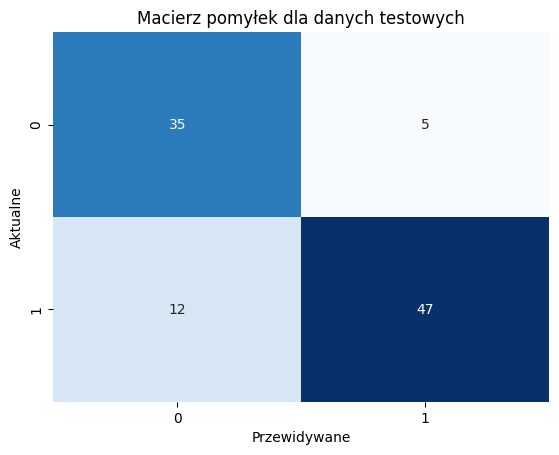

Dla k = 4 dokładność wynosi: 0.8080808080808081


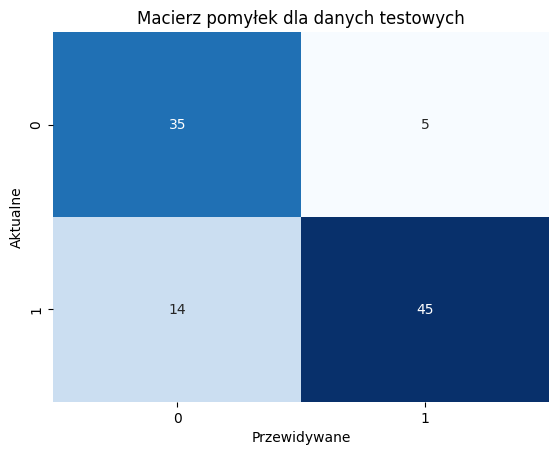

Dla k = 5 dokładność wynosi: 0.8484848484848485


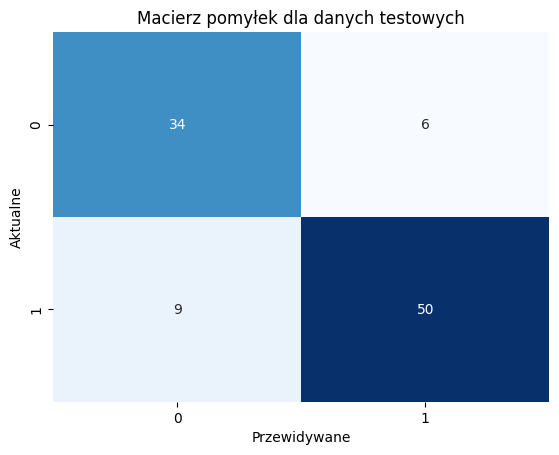

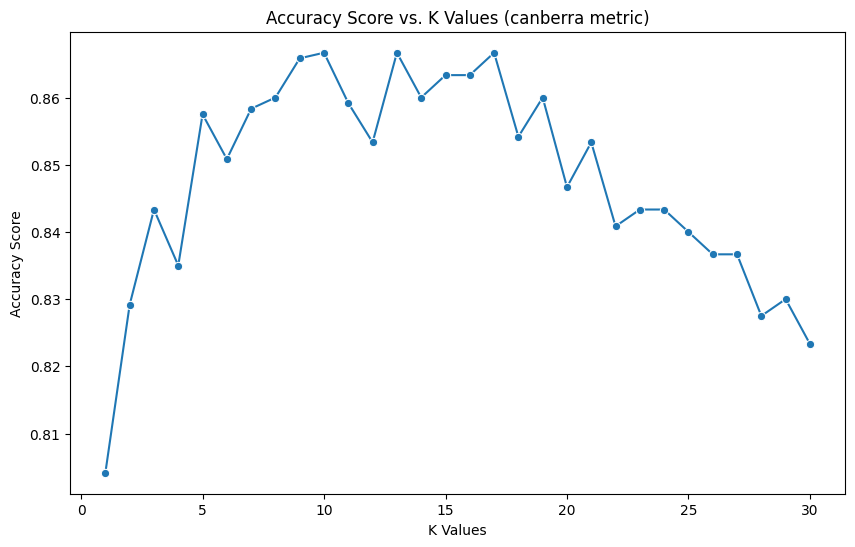

Czas wykonania testu: 57.16880536079407 sekundy


In [73]:
import time
start_time = time.time()
#Testy dla PCA3
# Użycie funkcji z domyślną metryką euklidesową
evaluate_knn_with_metric(df_new_PCA3, metric="euclidean", cv=True)
# Użycie funkcji z metryką Manhattan
evaluate_knn_with_metric(df_new_PCA3, metric="manhattan", cv=True)
# Użycie funkcji z metryką Czebyszewa
evaluate_knn_with_metric(df_new_PCA3, metric="chebyshev", cv=True)
# Użycie funkcji z metryką Cosinusową
evaluate_knn_with_metric(df_new_PCA3, metric="cosine", cv=True)
# Użycie funkcji z metryką Canberra
evaluate_knn_with_metric(df_new_PCA3, metric="canberra", cv=True)
end_time = time.time()
elapsed_time = end_time - start_time
print("Czas wykonania testu:", elapsed_time, "sekundy")